In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.arima.model import ARIMA


Bitcoin Data:
        time     high      low     open  volumefrom      volumeto    close  \
0 2019-11-29  7872.17  7425.49  7442.33    37243.54  2.852806e+08  7769.38   
1 2019-11-30  7821.01  7487.10  7769.38    24778.50  1.895332e+08  7571.77   
2 2019-12-01  7575.50  7261.95  7571.77    30676.77  2.262455e+08  7420.53   
3 2019-12-02  7442.62  7193.09  7420.53    25163.31  1.840093e+08  7320.94   
4 2019-12-03  7420.34  7260.93  7320.94    18521.73  1.359973e+08  7313.64   

  conversionType conversionSymbol  
0         direct                   
1         direct                   
2         direct                   
3         direct                   
4         direct                   
Ethereum Data:
        time    high     low    open  volumefrom      volumeto   close  \
0 2019-11-29  160.13  153.68  151.23  2323684.94  3.603497e+08  155.08   
1 2019-11-30  153.18  150.00  155.08  1903183.25  2.893622e+08  152.04   
2 2019-12-01  152.94  148.04  152.04  2329309.65  3.522624e+08  

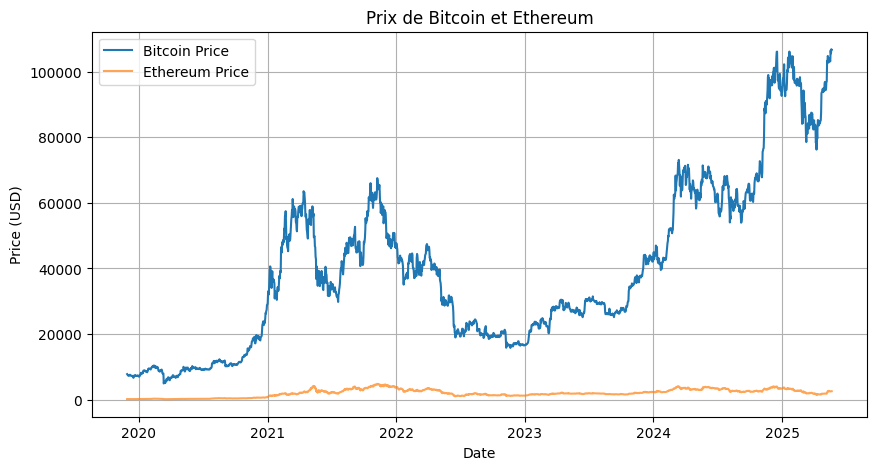

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

# Fonction pour récupérer les données historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours à récupérer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Paramètre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la récupération des données: {response.status_code}")
        return None

# Obtenir la date d'aujourd'hui sous forme de timestamp
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))

# Exemple de timestamp pour début (en secondes)
start_timestamp = 1614556800  # (par exemple, début de l'année 2021)

# Collecter les données de Bitcoin et Ethereum
bitcoin_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
ethereum_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Vérification que les données ont été récupérées correctement
if bitcoin_data is not None:
    print("Bitcoin Data:")
    print(bitcoin_data.head())

if ethereum_data is not None:
    print("Ethereum Data:")
    print(ethereum_data.head())

# Tracer les prix de Bitcoin et Ethereum
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_data['time'], bitcoin_data['close'], label='Bitcoin Price')
plt.plot(ethereum_data['time'], ethereum_data['close'], label='Ethereum Price', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Prix de Bitcoin et Ethereum')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
pip install requests

###Analyse de la corrélation :


Vérification de la volatilité moyenne sur 30 jours:
Volatilité BTC: 3.12
Volatilité ETH: 4.06

Statistiques Comparatives:
|                               |   Bitcoin |   Ethereum |
|:------------------------------|----------:|-----------:|
| Moyenne (USD)                 |  39840.50 |    1981.58 |
| Médiane (USD)                 |  35086.09 |    1878.59 |
| Écart-type (USD)              |  25317.06 |    1139.54 |
| Volatilité (rendement %)      |      3.34 |       4.40 |
| Rendement moyen quotidien (%) |      0.19 |       0.24 |
| Skewness des rendements       |     -0.51 |      -0.20 |
| Kurtosis des rendements       |     11.23 |       8.76 |
| Corrélation BTC/ETH           |      0.82 |       0.82 |
| Max Drawdown (%)              |    -76.67 |     -79.33 |
| Rendement annualisé (%)       |     98.40 |     138.63 |


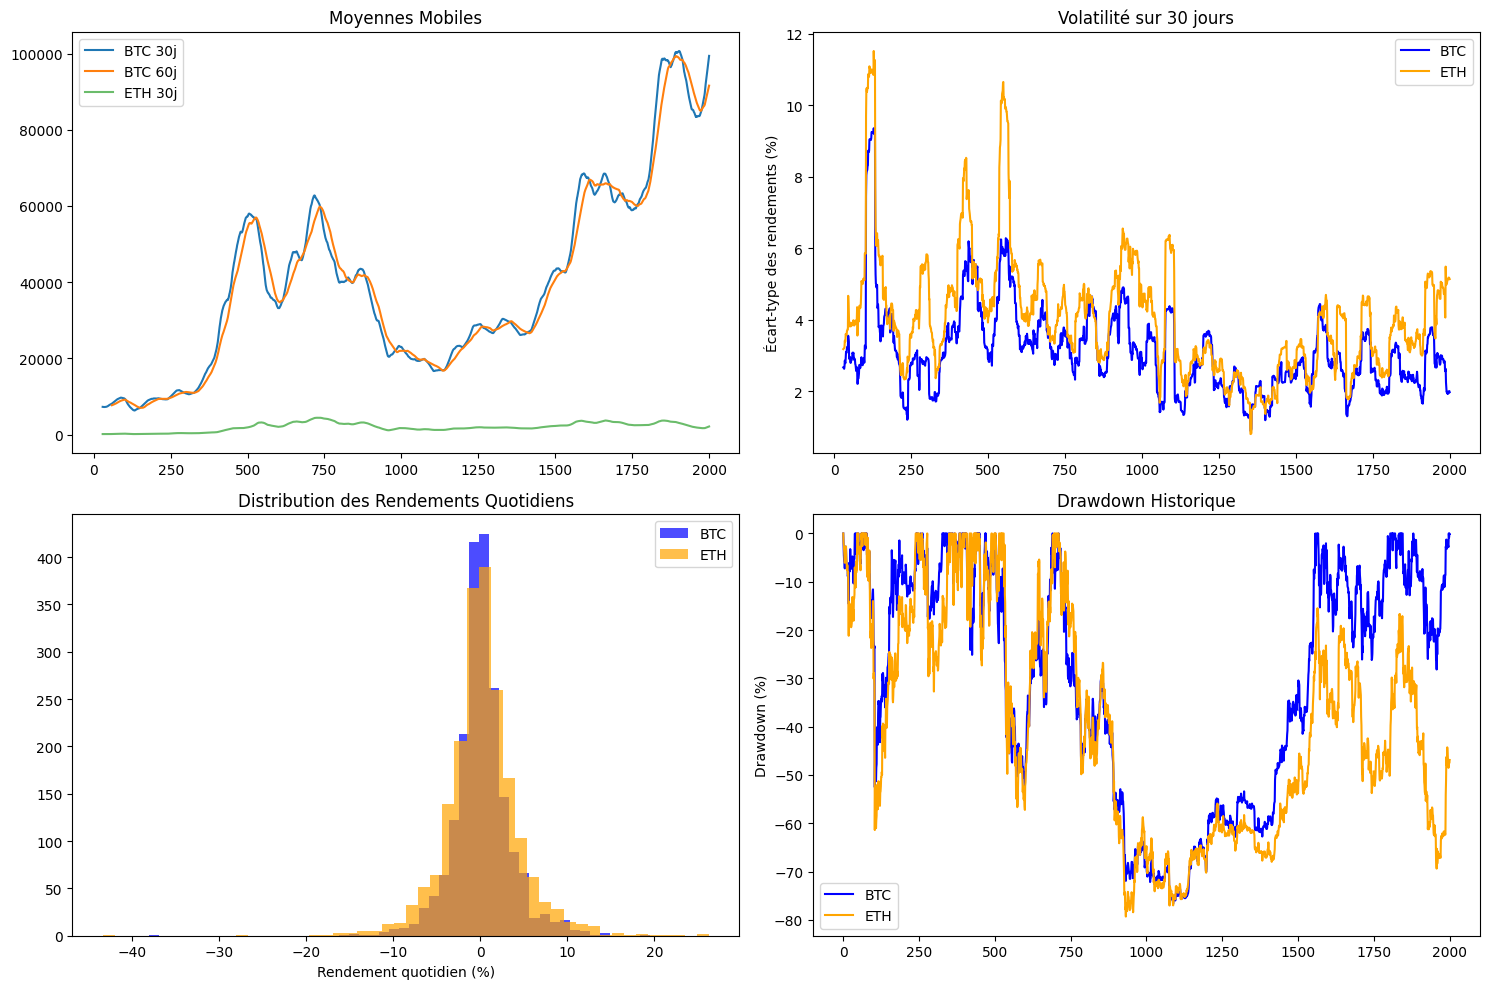

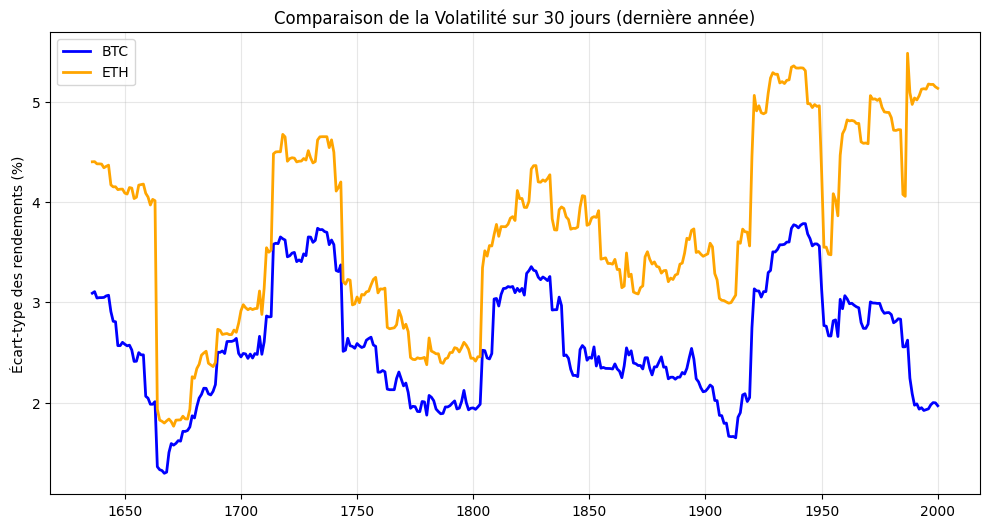

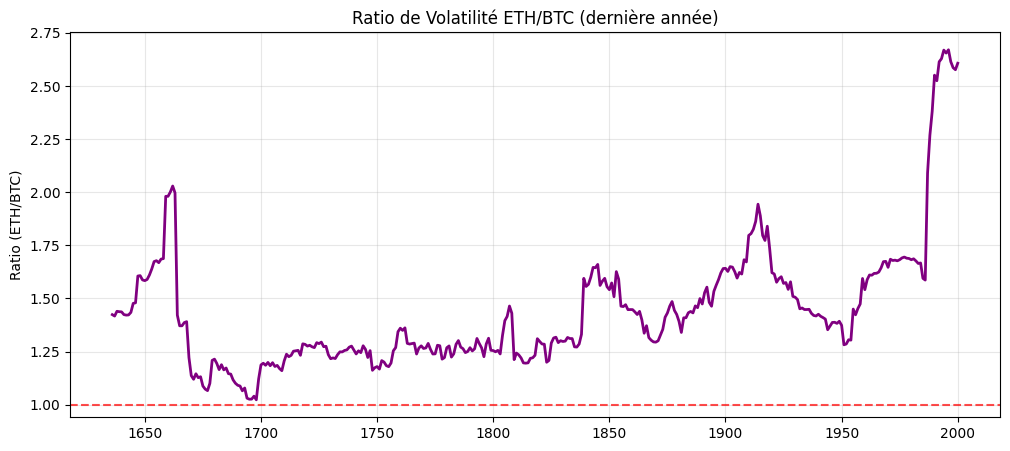


Ratio de volatilité moyen ETH/BTC: 1.31
Un ratio > 1 indique que ETH est plus volatil que BTC


In [4]:
# =================================================================
# ANALYSE STATISTIQUE AVANCÉE
# =================================================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supposons que bitcoin_data et ethereum_data sont déjà chargés
# Si ce n'est pas le cas, ajoutez le code pour charger vos données ici

def calculate_statistics(df, crypto_name):
    """Calcule les statistiques avancées pour une cryptomonnaie"""
    # Création d'une copie pour éviter les avertissements de modification
    df = df.copy()

    # Calcul des rendements quotidiens
    df['daily_return'] = df['close'].pct_change() * 100

    # Statistiques descriptives
    stats = {
        'Moyenne (USD)': df['close'].mean(),
        'Médiane (USD)': df['close'].median(),
        'Écart-type (USD)': df['close'].std(),
        'Volatilité (rendement %)': df['daily_return'].std(),
        'Rendement moyen quotidien (%)': df['daily_return'].mean(),
        'Skewness des rendements': df['daily_return'].skew(),
        'Kurtosis des rendements': df['daily_return'].kurtosis(),
        'Corrélation BTC/ETH': None  # Rempli plus tard
    }

    # Calculs supplémentaires
    df['rolling_30'] = df['close'].rolling(window=30).mean()
    df['rolling_60'] = df['close'].rolling(window=60).mean()
    df['volatility_30'] = df['daily_return'].rolling(window=30).std()

    # Maximum Drawdown
    df['cumulative_max'] = df['close'].cummax()
    df['drawdown'] = (df['close'] - df['cumulative_max']) / df['cumulative_max'] * 100
    stats['Max Drawdown (%)'] = df['drawdown'].min()

    # Rendement annualisé
    annualized_return = (1 + df['daily_return'].mean()/100)**365 - 1
    stats['Rendement annualisé (%)'] = annualized_return * 100

    return stats, df

# Calcul pour les deux cryptomonnaies
btc_stats, bitcoin_data_processed = calculate_statistics(bitcoin_data, 'Bitcoin')
eth_stats, ethereum_data_processed = calculate_statistics(ethereum_data, 'Ethereum')

# Calcul de la corrélation
correlation = bitcoin_data_processed['daily_return'].corr(ethereum_data_processed['daily_return'])
btc_stats['Corrélation BTC/ETH'] = correlation
eth_stats['Corrélation BTC/ETH'] = correlation

# Vérification de la volatilité
print("\nVérification de la volatilité moyenne sur 30 jours:")
print(f"Volatilité BTC: {bitcoin_data_processed['volatility_30'].mean():.2f}")
print(f"Volatilité ETH: {ethereum_data_processed['volatility_30'].mean():.2f}")

# Création du DataFrame pour l'affichage
stats_df = pd.DataFrame([btc_stats, eth_stats], index=['Bitcoin', 'Ethereum'])
print("\nStatistiques Comparatives:")
print(stats_df.transpose().to_markdown(floatfmt=".2f"))

# =================================================================
# VISUALISATIONS COMPLÉMENTAIRES
# =================================================================

plt.figure(figsize=(15, 10))

# Moyennes mobiles
plt.subplot(2, 2, 1)
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['rolling_30'], label='BTC 30j')
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['rolling_60'], label='BTC 60j')
plt.plot(ethereum_data_processed.index, ethereum_data_processed['rolling_30'], label='ETH 30j', alpha=0.7)
plt.title('Moyennes Mobiles')
plt.legend()

# Volatilité - CORRECTION ICI
plt.subplot(2, 2, 2)
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['volatility_30'], label='BTC', color='blue')
plt.plot(ethereum_data_processed.index, ethereum_data_processed['volatility_30'], label='ETH', color='orange')
plt.title('Volatilité sur 30 jours')
plt.legend()
plt.ylabel('Écart-type des rendements (%)')

# Distribution des rendements
plt.subplot(2, 2, 3)
plt.hist(bitcoin_data_processed['daily_return'].dropna(), bins=50, alpha=0.7, label='BTC', color='blue')
plt.hist(ethereum_data_processed['daily_return'].dropna(), bins=50, alpha=0.7, label='ETH', color='orange')
plt.title('Distribution des Rendements Quotidiens')
plt.legend()
plt.xlabel('Rendement quotidien (%)')

# Drawdown
plt.subplot(2, 2, 4)
plt.plot(bitcoin_data_processed.index, bitcoin_data_processed['drawdown'], label='BTC', color='blue')
plt.plot(ethereum_data_processed.index, ethereum_data_processed['drawdown'], label='ETH', color='orange')
plt.title('Drawdown Historique')
plt.legend()
plt.ylabel('Drawdown (%)')

plt.tight_layout()
plt.savefig('crypto_analysis.png', dpi=300)
plt.show()

# Ajout d'une visualisation spécifique comparative de la volatilité
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data_processed.index[-365:], bitcoin_data_processed['volatility_30'].tail(365), label='BTC', color='blue', linewidth=2)
plt.plot(ethereum_data_processed.index[-365:], ethereum_data_processed['volatility_30'].tail(365), label='ETH', color='orange', linewidth=2)
plt.title('Comparaison de la Volatilité sur 30 jours (dernière année)')
plt.legend()
plt.ylabel('Écart-type des rendements (%)')
plt.grid(True, alpha=0.3)
plt.savefig('volatility_comparison.png', dpi=300)
plt.show()

# Ratio de volatilité ETH/BTC (pour montrer combien ETH est plus volatil que BTC)
common_dates = bitcoin_data_processed.index.intersection(ethereum_data_processed.index)
btc_vol = bitcoin_data_processed.loc[common_dates, 'volatility_30']
eth_vol = ethereum_data_processed.loc[common_dates, 'volatility_30']
volatility_ratio = eth_vol / btc_vol

plt.figure(figsize=(12, 5))
plt.plot(common_dates[-365:], volatility_ratio.tail(365), color='purple', linewidth=2)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.7)
plt.title('Ratio de Volatilité ETH/BTC (dernière année)')
plt.ylabel('Ratio (ETH/BTC)')
plt.grid(True, alpha=0.3)
plt.savefig('volatility_ratio.png', dpi=300)
plt.show()

print(f"\nRatio de volatilité moyen ETH/BTC: {volatility_ratio.mean():.2f}")
print(f"Un ratio > 1 indique que ETH est plus volatil que BTC")

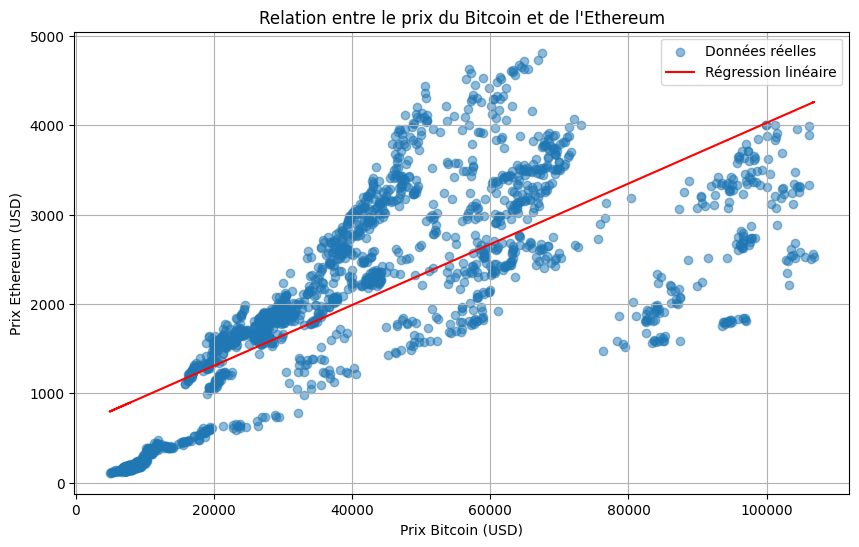

Coefficient de corrélation (pente): 0.0340
Intercept: 627.26


In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Copier les données récupérées et mettre 'time' comme index
btc = bitcoin_data.copy()
eth = ethereum_data.copy()
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Aligner les données sur les dates communes
common_index = btc.index.intersection(eth.index)
btc_prices = btc.loc[common_index]['close']
eth_prices = eth.loc[common_index]['close']

# Préparation des données pour le modèle
X = btc_prices.values.reshape(-1, 1)
y = eth_prices.values

# Régression linéaire
model = LinearRegression()
model.fit(X, y)
eth_pred = model.predict(X)

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.scatter(btc_prices, eth_prices, alpha=0.5, label='Données réelles')
plt.plot(btc_prices, eth_pred, color='red', label='Régression linéaire')
plt.xlabel('Prix Bitcoin (USD)')
plt.ylabel('Prix Ethereum (USD)')
plt.title('Relation entre le prix du Bitcoin et de l\'Ethereum')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des coefficients
print(f"Coefficient de corrélation (pente): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.2f}")


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

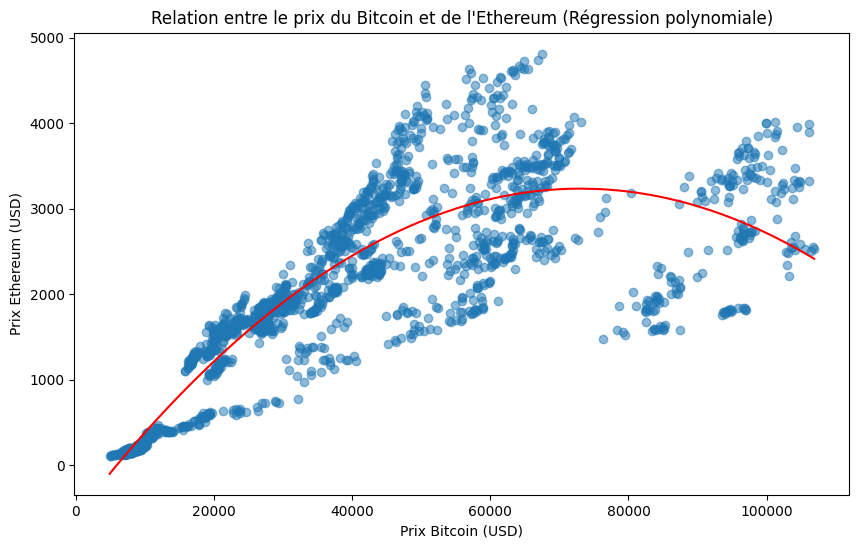

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# S'assurer que les données ont le bon index
btc = bitcoin_data.copy()
eth = ethereum_data.copy()
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Aligner les dates communes
common_index = btc.index.intersection(eth.index)
btc_prices = btc.loc[common_index]['close']
eth_prices = eth.loc[common_index]['close']

# Régression polynomiale (degré 2)
X = btc_prices.values.reshape(-1, 1)
y = eth_prices.values

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
eth_pred_poly = poly_model.predict(X)

# Tri des données pour une courbe lisse
sorted_indices = np.argsort(X.flatten())
X_sorted = X[sorted_indices]
y_sorted = eth_pred_poly[sorted_indices]

# Affichage
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Données réelles')
plt.plot(X_sorted, y_sorted, color='red', label='Régression polynomiale')
plt.xlabel('Prix Bitcoin (USD)')
plt.ylabel('Prix Ethereum (USD)')
plt.title('Relation entre le prix du Bitcoin et de l\'Ethereum (Régression polynomiale)')
plt.legend


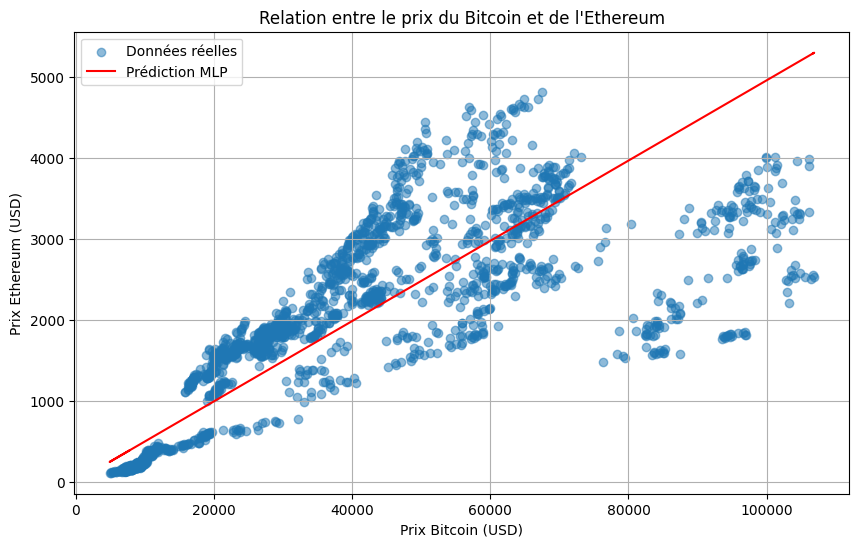

Coefficients du modèle (weights): [array([[-4.92751392e-03,  1.80291201e-01, -2.57178914e-01,
        -6.09203068e-02, -1.59740750e-01, -1.95659756e-01,
        -1.33943862e-01, -3.61292986e-02, -1.16349097e-02,
         5.39295658e-02, -4.36267135e-03,  1.00163233e-01,
        -1.22172336e-01,  2.86929313e-01, -2.38922174e-01,
         1.44393333e-01, -4.85210303e-03,  6.75915309e-02,
        -1.63924576e-01, -1.26272674e-01,  1.79350392e-01,
         2.94268175e-01, -5.43512530e-02,  1.05146843e-01,
         2.85568520e-01,  2.99426135e-01, -2.00500252e-01,
        -2.31126697e-01, -1.44637738e-01,  2.32672595e-01,
        -1.91676766e-01, -3.89329898e-03,  3.42376794e-01,
        -5.86945524e-03,  1.59035715e-01, -5.31261219e-02,
         1.55342216e-01,  2.03269260e-01, -2.45008190e-01,
         1.99062270e-01,  3.63699327e-01,  1.43342755e-01,
        -7.41824854e-02,  1.71536136e-01, -1.88445058e-01,
        -2.25381863e-04,  2.53479061e-01, -6.61597787e-02,
        -6.97016059e-

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Copier les données récupérées et mettre 'time' comme index
btc = bitcoin_data.copy()
eth = ethereum_data.copy()
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Aligner les données sur les dates communes
common_index = btc.index.intersection(eth.index)
btc_prices = btc.loc[common_index]['close']
eth_prices = eth.loc[common_index]['close']

# Préparation des données pour le modèle
X = btc_prices.values.reshape(-1, 1)
y = eth_prices.values

# Régression avec MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=1)
model.fit(X, y)

# Prédictions
eth_pred = model.predict(X)

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.scatter(btc_prices, eth_prices, alpha=0.5, label='Données réelles')
plt.plot(btc_prices, eth_pred, color='red', label='Prédiction MLP')
plt.xlabel('Prix Bitcoin (USD)')
plt.ylabel('Prix Ethereum (USD)')
plt.title('Relation entre le prix du Bitcoin et de l\'Ethereum')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des coefficients
print(f"Coefficients du modèle (weights): {model.coefs_}")
print(f"Intercept: {model.intercepts_}")


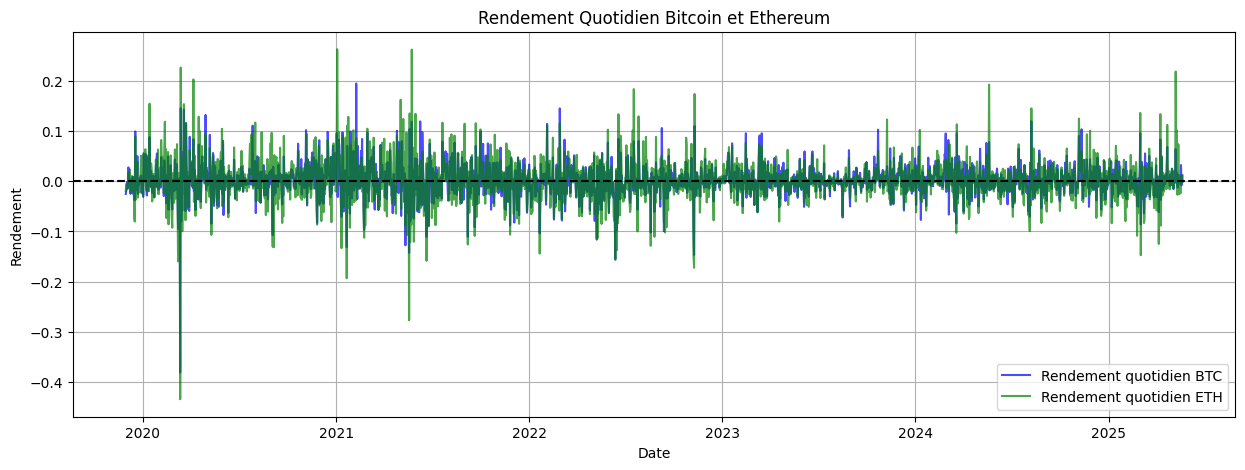

In [8]:
# Paramètres : collecte des données
btc = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Mise en forme
btc.set_index('time', inplace=True)
eth.set_index('time', inplace=True)

# Calcul du rendement quotidien basé sur la colonne 'close'
btc_returns = btc['close'].pct_change().dropna()
eth_returns = eth['close'].pct_change().dropna()

# Aligner les dates communes
common_index = btc_returns.index.intersection(eth_returns.index)
btc_returns = btc_returns.loc[common_index]
eth_returns = eth_returns.loc[common_index]

# Tracé du rendement quotidien
plt.figure(figsize=(15, 5))
plt.plot(btc_returns, label='Rendement quotidien BTC', color='blue', alpha=0.7)
plt.plot(eth_returns, label='Rendement quotidien ETH', color='green', alpha=0.7)
plt.title('Rendement Quotidien Bitcoin et Ethereum')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Rendement')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Comparaison des statistiques descriptives
descriptive_stats = pd.DataFrame({
    'BTC': [btc_returns.mean(), btc_returns.std()],
    'ETH': [eth_returns.mean(), eth_returns.std()]
}, index=['Moyenne', 'Écart-type'])
print("\n=== Statistiques descriptives des rendements ===")
print(descriptive_stats)


=== Statistiques descriptives des rendements ===
                 BTC       ETH
Moyenne     0.001879  0.002386
Écart-type  0.033394  0.044006


In [10]:
# Calcul de la corrélation entre les prix de clôture de Bitcoin et Ethereum : Corrélation de Pearson :
correlation = bitcoin_data['close'].corr(ethereum_data['close'])
print(f"Corrélation entre Bitcoin et Ethereum : {correlation}")


Corrélation entre Bitcoin et Ethereum : 0.7552377137047113


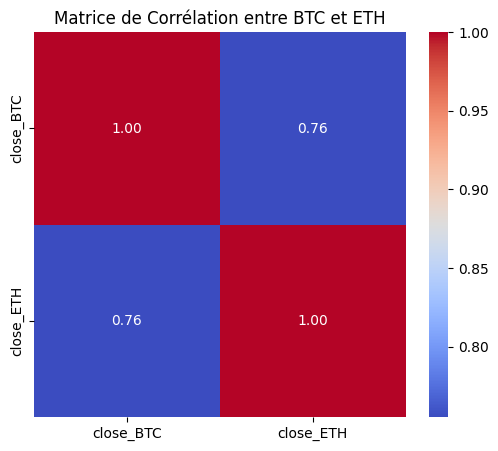

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

# Fonction pour récupérer les données historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,
        'tsym': 'USD',
        'limit': 2000,
        'toTs': end_timestamp,
        'extraParams': 'crypto_prediction'
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)
        df['time'] = pd.to_datetime(df['time'], unit='s')
        return df
    else:
        print(f"Erreur lors de la récupération des données: {response.status_code}")
        return None

# Obtenir la date d'aujourd'hui
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Début 2021

# Récupération des données
bitcoin_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
ethereum_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Fusionner sur la colonne 'time'
merged_df = pd.merge(bitcoin_data[['time', 'close']], ethereum_data[['time', 'close']], on='time', suffixes=('_BTC', '_ETH'))

# Matrice de corrélation
correlation_matrix = merged_df[['close_BTC', 'close_ETH']].corr()

# Affichage de la heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de Corrélation entre BTC et ETH")
plt.show()


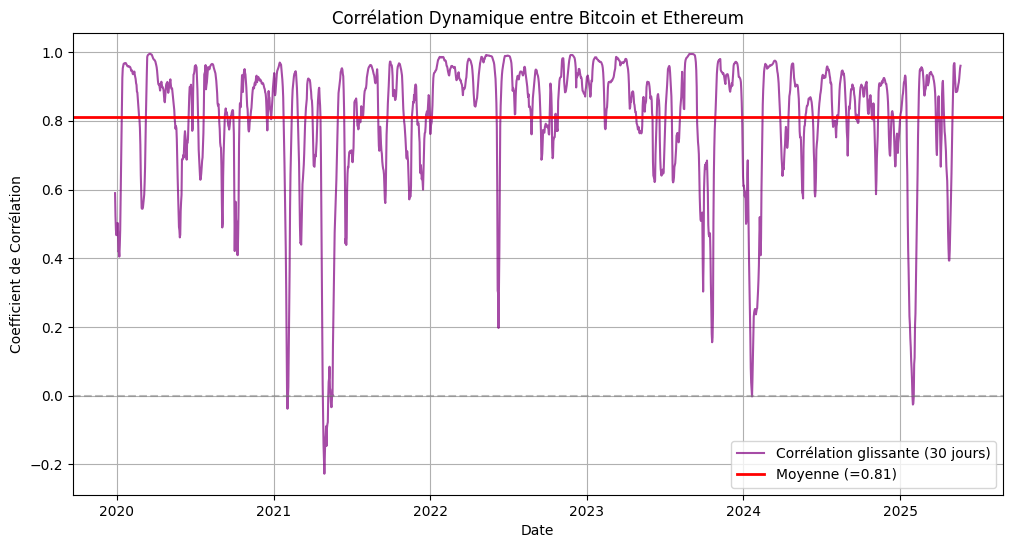

In [12]:
# Collecte des données
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Fusion des données sur la colonne 'time'
merged_data = pd.merge(btc_data[['time', 'close']], eth_data[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

# Calcul de la corrélation glissante (fenêtre de 30 jours)
# Calcul de la corrélation glissante (fenêtre de 30 jours)
window = 30
merged_data['rolling_corr'] = merged_data['close_btc'].rolling(window).corr(merged_data['close_eth'])

# Calcul de la moyenne de la corrélation
mean_correlation = merged_data['rolling_corr'].mean()

# Tracé de la corrélation dynamique + moyenne
plt.figure(figsize=(12, 6))
plt.plot(merged_data['time'], merged_data['rolling_corr'], label=f'Corrélation glissante ({window} jours)', color='purple', alpha=0.7)
plt.axhline(y=mean_correlation, color='red', linestyle='-', label=f'Moyenne (={mean_correlation:.2f})', linewidth=2)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Coefficient de Corrélation')
plt.title('Corrélation Dynamique entre Bitcoin et Ethereum')
plt.legend()
plt.grid(True)
plt.show()

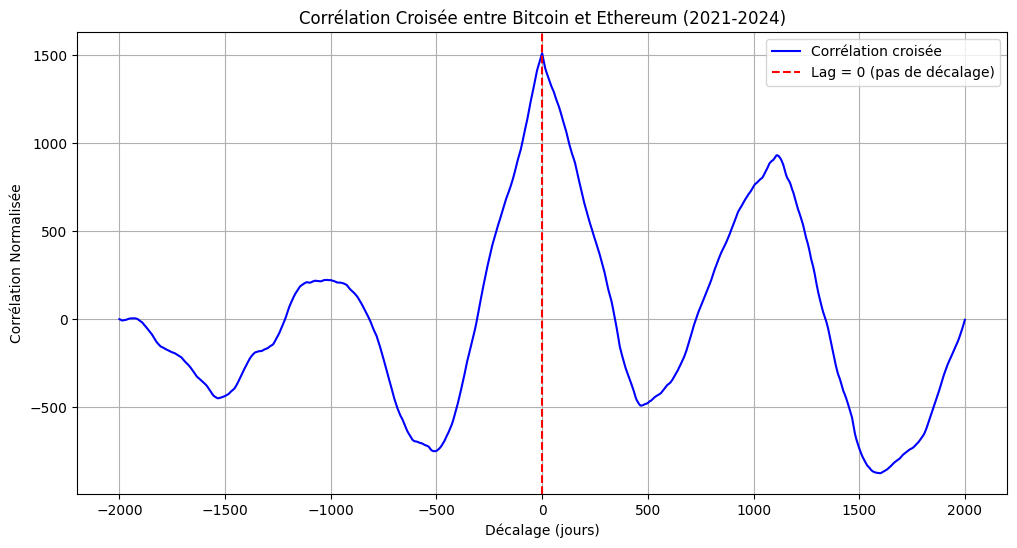

Corrélation maximale: 1511.23 à un décalage de 0 jours.


In [13]:

# Téléchargement des données
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# 2. Nettoyage et alignement des séries temporelles
btc_prices = btc_data['close'].values
eth_prices = eth_data['close'].values

# Normalisation (pour une corrélation comparable)
btc_normalized = (btc_prices - np.mean(btc_prices)) / np.std(btc_prices)
eth_normalized = (eth_prices - np.mean(eth_prices)) / np.std(eth_prices)

# 3. Calcul de la corrélation croisée
cross_corr = np.correlate(btc_normalized, eth_normalized, mode='full')
lags = np.arange(-len(btc_prices) + 1, len(btc_prices))  # Décalages en jours

# 4. Visualisation
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr, label='Corrélation croisée', color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='Lag = 0 (pas de décalage)')
plt.xlabel('Décalage (jours)')
plt.ylabel('Corrélation Normalisée')
plt.title('Corrélation Croisée entre Bitcoin et Ethereum (2021-2024)')
plt.grid(True)
plt.legend()
plt.show()

# 5. Analyse des pics
max_corr = np.max(cross_corr)
best_lag = lags[np.argmax(cross_corr)]
print(f"Corrélation maximale: {max_corr:.2f} à un décalage de {best_lag} jours.")

# Analyse du Diagramme de Corrélation Croisée (BTC/ETH - 2021-2024)

## 1. Description du Graphique
Le graphique montre la **corrélation croisée normalisée** entre les prix de Bitcoin (BTC) et Ethereum (ETH) pour des décalages temporels (*lags*) allant de **-2000 à +2000 jours** (environ 5.5 ans).  

- **Axe X (*Lag*)** :  
  - `Lag = 0` : Corrélation instantanée (pas de décalage).  
  - `Lag > 0` : BTC précède ETH.  
  - `Lag < 0` : ETH précède BTC.  
- **Axe Y** : Coefficient de corrélation normalisé (de -1 à 1).  

---

## 2. Observations Clés
### **Pic central à Lag = 0**  
- La corrélation est **maximale** (proche de 1), indiquant que BTC et ETH évoluent de manière synchrone sans délai.  
- *Interprétation* : Les deux cryptos réagissent simultanément aux mêmes événements de marché (ex: tendances macroéconomiques).  

### **Symétrie globale**  
- Le graphique est approximativement symétrique autour de `Lag = 0`, suggérant qu'**aucune crypto ne domine systématiquement l'autre** sur le long terme.  

### **Absence de pics secondaires**  
- Aucun pic significatif n'apparaît pour `Lag ≠ 0`, ce qui signifie qu'il n'y a pas de **dépendance temporelle décalée** (ex: BTC n'influence pas ETH avec un délai fixe).  

---

## 3. Implications pour le Trading
- **Diversification limitée** : La forte corrélation instantanée réduit l'intérêt de détenir BTC et ETH pour diversifier un portefeuille.  
- **Stratégies court-termistes** : Privilégiez des indicateurs haute fréquence (ex: données on-chain) plutôt que des décalages temporels pour anticiper les mouvements.  

---

## 4. Limitations
- **Période analysée** : Les données couvrent 2021–2024, une période de marché haussier puis baissier. Des analyses par sous-périodes (ex: bull/bear markets) pourraient révéler des dynamiques différentes.  
- **Normalisation** : La corrélation est calculée sur des prix normalisés, masquant les amplitudes réelles des variations.  

---

### **Résumé**  
*"BTC et ETH sont fortement corrélés sans délai, ce qui suggère des réactions synchrones aux chocs de marché, mais aucun lead-lag significatif."*  


=== Test de causalité de Granger (BTC -> ETH) ===

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9107  , p=0.3400  , df_denom=1996, df_num=1
ssr based chi2 test:   chi2=0.9121  , p=0.3396  , df=1
likelihood ratio test: chi2=0.9119  , p=0.3396  , df=1
parameter F test:         F=0.9107  , p=0.3400  , df_denom=1996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6334  , p=0.5309  , df_denom=1993, df_num=2
ssr based chi2 test:   chi2=1.2700  , p=0.5299  , df=2
likelihood ratio test: chi2=1.2696  , p=0.5300  , df=2
parameter F test:         F=0.6334  , p=0.5309  , df_denom=1993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4534  , p=0.2254  , df_denom=1990, df_num=3
ssr based chi2 test:   chi2=4.3757  , p=0.2237  , df=3
likelihood ratio test: chi2=4.3709  , p=0.2241  , df=3
parameter F test:         F=1.4534  , p=0.2254  , df_denom=1990, df_num=3

Granger Causality
number of lags (no 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=3.3843  , p=0.0048  , df_denom=1984, df_num=5
ssr based chi2 test:   chi2=17.0151 , p=0.0045  , df=5
likelihood ratio test: chi2=16.9430 , p=0.0046  , df=5
parameter F test:         F=3.3843  , p=0.0048  , df_denom=1984, df_num=5


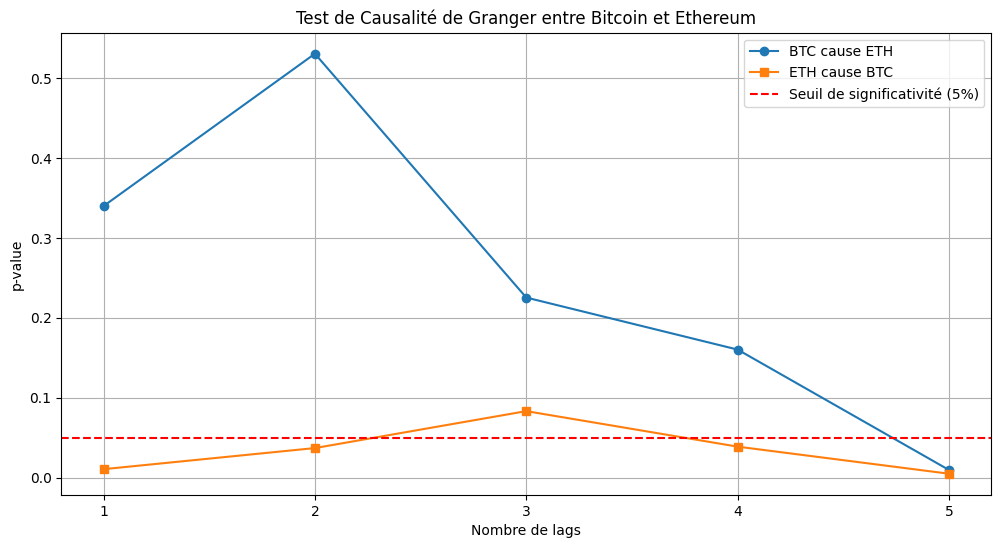

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from datetime import datetime
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.api import VAR


start_timestamp = 1614556800
end_timestamp = int(time.time())

#  Téléchargement des données
btc_df = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_df = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Nettoyage et préparation
btc = btc_df['close']
eth = eth_df['close']
data = pd.concat([btc, eth], axis=1)
data.columns = ['Bitcoin', 'Ethereum']
data = data.dropna()

# Différenciation pour stationnarité
data_diff = data.diff().dropna()

#Test de Granger
print("=== Test de causalité de Granger (BTC -> ETH) ===")
granger_btc_eth = grangercausalitytests(data_diff[['Ethereum', 'Bitcoin']], maxlag=5, verbose=True)

print("\n=== Test de causalité de Granger (ETH -> BTC) ===")
granger_eth_btc = grangercausalitytests(data_diff[['Bitcoin', 'Ethereum']], maxlag=5, verbose=True)

# Extraction des p-values
def extract_pvalues(results, maxlag):
    return [results[i+1][0]['ssr_ftest'][1] for i in range(maxlag)]

pvals_btc_eth = extract_pvalues(granger_btc_eth, 5)
pvals_eth_btc = extract_pvalues(granger_eth_btc, 5)

# Visualisation des p-values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), pvals_btc_eth, marker='o', label='BTC cause ETH')
plt.plot(range(1, 6), pvals_eth_btc, marker='s', label='ETH cause BTC')
plt.axhline(y=0.05, color='red', linestyle='--', label='Seuil de significativité (5%)')
plt.title('Test de Causalité de Granger entre Bitcoin et Ethereum')
plt.xlabel('Nombre de lags')
plt.ylabel('p-value')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

#  Modèle VAR
model = VAR


Corrélations avec différents lags :
Lag 1 : Corrélation = 0.6002
Lag 2 : Corrélation = 0.6002
Lag 3 : Corrélation = 0.6000
Lag 4 : Corrélation = 0.5994
Lag 5 : Corrélation = 0.5987
Lag 6 : Corrélation = 0.5980
Lag 7 : Corrélation = 0.5973
Lag 8 : Corrélation = 0.5965
Lag 9 : Corrélation = 0.5959
Lag 10 : Corrélation = 0.5949


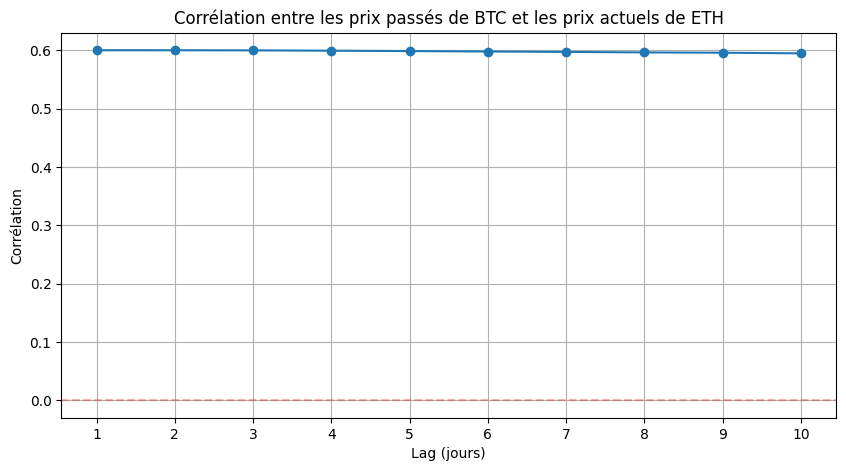

In [15]:
# Récupérer les données
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Vérification des colonnes et de la non-nullité
if (
    btc_data is not None and not btc_data.empty and 'time' in btc_data.columns and
    eth_data is not None and not eth_data.empty and 'time' in eth_data.columns
):
    # Filtrer les données selon le timestamp de début
    btc_data = btc_data[btc_data['time'] >= pd.to_datetime(start_timestamp, unit='s')]
    eth_data = eth_data[eth_data['time'] >= pd.to_datetime(start_timestamp, unit='s')]

    # Fusionner sur la colonne 'time'
    merged = pd.merge(
        btc_data[['time', 'close']],
        eth_data[['time', 'close']],
        on='time',
        suffixes=('_btc', '_eth')
    )

    # Trier par date
    merged.sort_values('time', inplace=True)

    # Extraire les séries de prix
    btc_prices = merged['close_btc']
    eth_prices = merged['close_eth']

    # Calcul et affichage des corrélations avec lags
    print("Corrélations avec différents lags :")
    lags = range(1, 11)
    correlations = []
    for lag in lags:
        # Calcul correct : c'est BTC qui doit être décalé pour voir
        # si les prix passés du BTC prédisent les prix actuels de ETH
        shifted_btc = btc_prices.shift(lag)
        corr = eth_prices.corr(shifted_btc)
        correlations.append(corr)
        print(f"Lag {lag} : Corrélation = {corr:.4f}")

    # Tracer la courbe
    plt.figure(figsize=(10, 5))
    plt.plot(lags, correlations, marker='o', linestyle='-')
    plt.title("Corrélation entre les prix passés de BTC et les prix actuels de ETH")
    plt.xlabel("Lag (jours)")
    plt.ylabel("Corrélation")
    plt.grid(True)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)  # Ligne de référence à zéro
    plt.xticks(lags)
    plt.show()
else:
    print("Erreur : Données BTC ou ETH manquantes, vides, ou sans colonne 'time'.")

In [16]:
from statsmodels.tsa.api import VAR

# Préparer les données pour le modèle VAR
data = pd.concat([bitcoin_data['close'], ethereum_data['close']], axis=1)
data.columns = ['Bitcoin', 'Ethereum']

# Créer un modèle VAR
model = VAR(data)
model_fitted = model.fit(5)  # Ajuster le modèle avec un nombre de lags (ici 5)

# Résumé du modèle
print(model_fitted.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 21, May, 2025
Time:                     07:44:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    22.7776
Nobs:                     1996.00    HQIC:                   22.7386
Log likelihood:          -28312.9    FPE:                7.33497e+09
AIC:                      22.7159    Det(Omega_mle):     7.25479e+09
--------------------------------------------------------------------
Results for equation Bitcoin
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const             138.495254        64.784770            2.138           0.033
L1.Bitcoin          1.000796         0.034796           28.762           0.000
L1.Ethereum        -1.379710         0.523577           -2.635    

In [17]:
bitcoin_data.head()

time     high      low     open  volumefrom      volumeto    close  \
0 2019-11-29  7872.17  7425.49  7442.33    37243.54  2.852806e+08  7769.38   
1 2019-11-30  7821.01  7487.10  7769.38    24778.50  1.895332e+08  7571.77   
2 2019-12-01  7575.50  7261.95  7571.77    30676.77  2.262455e+08  7420.53   
3 2019-12-02  7442.62  7193.09  7420.53    25163.31  1.840093e+08  7320.94   
4 2019-12-03  7420.34  7260.93  7320.94    18521.73  1.359973e+08  7313.64   

  conversionType conversionSymbol  
0         direct                   
1         direct                   
2         direct                   
3         direct                   
4         direct

In [18]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              2001 non-null   datetime64[ns]
 1   high              2001 non-null   float64       
 2   low               2001 non-null   float64       
 3   open              2001 non-null   float64       
 4   volumefrom        2001 non-null   float64       
 5   volumeto          2001 non-null   float64       
 6   close             2001 non-null   float64       
 7   conversionType    2001 non-null   object        
 8   conversionSymbol  2001 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 140.8+ KB


In [19]:
bitcoin_data.describe()

time           high            low           open  \
count                 2001    2001.000000    2001.000000    2001.000000   
mean   2022-08-25 00:00:00   40685.151279   38854.656842   39790.883408   
min    2019-11-29 00:00:00    5364.930000    3948.920000    4916.780000   
25%    2021-04-12 00:00:00   20366.340000   19346.990000   19944.250000   
50%    2022-08-25 00:00:00   36109.430000   33854.830000   35075.920000   
75%    2024-01-07 00:00:00   58898.570000   56103.320000   57552.920000   
max    2025-05-21 00:00:00  109340.210000  106244.930000  106875.880000   
std                    NaN   25794.504123   24752.221339   25283.173772   

          volumefrom      volumeto          close  
count    2001.000000  2.001000e+03    2001.000000  
mean    40301.086187  1.503605e+09   39840.504103  
min      3495.960000  8.598619e+07    4916.780000  
25%     22310.940000  5.627422e+08   19956.160000  
50%     34224.450000  1.141135e+09   35086.090000  
75%     49661.480000  1.920977e+09   57566.600000  
max    319316.540000  1.204144e+10  106875.880000  
std     28198.472016  1.420131e+09   25317.063176

In [20]:
ethereum_data.head()

time    high     low    open  volumefrom      volumeto   close  \
0 2019-11-29  160.13  153.68  151.23  2323684.94  3.603497e+08  155.08   
1 2019-11-30  153.18  150.00  155.08  1903183.25  2.893622e+08  152.04   
2 2019-12-01  152.94  148.04  152.04  2329309.65  3.522624e+08  151.23   
3 2019-12-02  150.59  147.81  151.23  1856390.80  2.769749e+08  149.20   
4 2019-12-03  150.66  147.22  149.20  1597602.09  2.359057e+08  147.66   

  conversionType conversionSymbol  
0       multiply              BTC  
1       multiply              BTC  
2       multiply              BTC  
3       multiply              BTC  
4       multiply              BTC

In [21]:
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              2001 non-null   datetime64[ns]
 1   high              2001 non-null   float64       
 2   low               2001 non-null   float64       
 3   open              2001 non-null   float64       
 4   volumefrom        2001 non-null   float64       
 5   volumeto          2001 non-null   float64       
 6   close             2001 non-null   float64       
 7   conversionType    2001 non-null   object        
 8   conversionSymbol  2001 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 140.8+ KB


In [22]:
ethereum_data.describe()

time         high          low         open  \
count                 2001  2001.000000  2001.000000  2001.000000   
mean   2022-08-25 00:00:00  2036.145857  1918.919395  1980.383123   
min    2019-11-29 00:00:00   117.550000   105.220000   110.230000   
25%    2021-04-12 00:00:00  1297.840000  1222.420000  1263.860000   
50%    2022-08-25 00:00:00  1917.180000  1845.370000  1877.160000   
75%    2024-01-07 00:00:00  2949.740000  2748.460000  2856.120000   
max    2025-05-21 00:00:00  4865.940000  4710.000000  4810.970000   
std                    NaN  1171.577358  1103.342235  1140.198737   

         volumefrom      volumeto        close  
count  2.001000e+03  2.001000e+03  2001.000000  
mean   6.877258e+05  9.604932e+08  1981.583883  
min    2.981167e+04  3.759109e+07   110.230000  
25%    2.661698e+05  3.603497e+08  1266.340000  
50%    4.228510e+05  7.348380e+08  1878.590000  
75%    7.317913e+05  1.193547e+09  2856.120000  
max    1.098033e+07  9.657969e+09  4810.970000  
std    8.284147e+05  9.215824e+08  1139.536005

In [23]:
from statsmodels.tsa.stattools import adfuller

# Appliquer le test ADF sur la colonne 'close' de Bitcoin (prix de clôture)
adf_result = adfuller(bitcoin_data['close'])
print("\nRésultats du test de Dickey-Fuller Augmenté (ADF):")
print(f"Statistique du test ADF: {adf_result[0]}")
print(f"Valeur p: {adf_result[1]}")
print("Valeurs critiques:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

if adf_result[1] < 0.05:
    print("La série est stationnaire (on rejette H0).")
else:
    print("La série n'est pas stationnaire (on ne rejette pas H0).")



Résultats du test de Dickey-Fuller Augmenté (ADF):
Statistique du test ADF: -0.31540291521710645
Valeur p: 0.9232943112913328
Valeurs critiques:
   1%: -3.433645303487856
   5%: -2.8629956824317757
   10%: -2.5675449439803617
La série n'est pas stationnaire (on ne rejette pas H0).


In [24]:
from statsmodels.tsa.stattools import adfuller

# Appliquer le test ADF sur la colonne 'close' de Bitcoin (prix de clôture)
adf_result = adfuller(ethereum_data['close'])
print("\nRésultats du test de Dickey-Fuller Augmenté (ADF):")
print(f"Statistique du test ADF: {adf_result[0]}")
print(f"Valeur p: {adf_result[1]}")
print("Valeurs critiques:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

if adf_result[1] < 0.05:
    print("La série est stationnaire (on rejette H0).")
else:
    print("La série n'est pas stationnaire (on ne rejette pas H0).")



Résultats du test de Dickey-Fuller Augmenté (ADF):
Statistique du test ADF: -2.113362007934348
Valeur p: 0.23917572642210455
Valeurs critiques:
   1%: -3.4336519592295947
   5%: -2.862998620943585
   10%: -2.567546508593341
La série n'est pas stationnaire (on ne rejette pas H0).


In [25]:
from statsmodels.tsa.stattools import kpss

# Appliquer le test KPSS sur la colonne 'close' de Bitcoin (prix de clôture)
kpss_result = kpss(bitcoin_data['close'], regression='c', nlags="auto")

# Affichage des résultats
print("\nRésultats du test KPSS:")
print(f"Statistique du test KPSS: {kpss_result[0]}")
print(f"Valeur p: {kpss_result[1]}")
print("Valeurs critiques:")
for key, value in kpss_result[3].items():
    print(f"   {key}: {value}")

# Interprétation du résultat
if kpss_result[1] < 0.05:
    print("La série est non stationnaire (on rejette H0).")
else:
    print("La série est stationnaire (on ne rejette pas H0).")



Résultats du test KPSS:
Statistique du test KPSS: 3.584686605186316
Valeur p: 0.01
Valeurs critiques:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
La série est non stationnaire (on rejette H0).


<ipython-input-25-a95094855ad1>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(bitcoin_data['close'], regression='c', nlags="auto")


In [26]:
from statsmodels.tsa.stattools import kpss

# Appliquer le test KPSS sur la colonne 'close' de Bitcoin (prix de clôture)
kpss_result = kpss(ethereum_data['close'], regression='c', nlags="auto")

# Affichage des résultats
print("\nRésultats du test KPSS:")
print(f"Statistique du test KPSS: {kpss_result[0]}")
print(f"Valeur p: {kpss_result[1]}")
print("Valeurs critiques:")
for key, value in kpss_result[3].items():
    print(f"   {key}: {value}")

# Interprétation du résultat
if kpss_result[1] < 0.05:
    print("La série est non stationnaire (on rejette H0).")
else:
    print("La série est stationnaire (on ne rejette pas H0).")



Résultats du test KPSS:
Statistique du test KPSS: 2.360158327933869
Valeur p: 0.01
Valeurs critiques:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
La série est non stationnaire (on rejette H0).


<ipython-input-26-297297ff2db3>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(ethereum_data['close'], regression='c', nlags="auto")


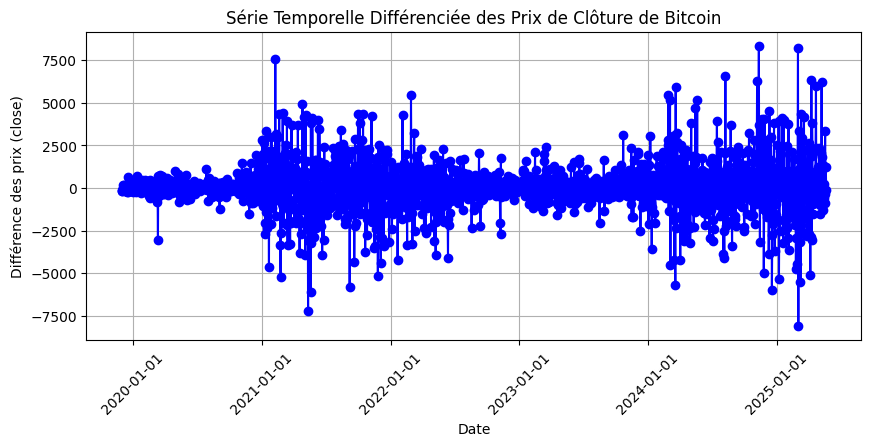

In [27]:
# Calcul de la différence première des prix de clôture de Bitcoin
diff_res = bitcoin_data['close'].diff().dropna()

# Utiliser l'index des dates correctement pour diff_res
diff_res.index = bitcoin_data['time'].iloc[1:]  # On prend les dates à partir du 2ème point

# Affichage des résultats
plt.figure(figsize=(10, 4))
plt.plot(diff_res, marker='o', linestyle='-', color='b')
plt.title('Série Temporelle Différenciée des Prix de Clôture de Bitcoin')
plt.xlabel('Date')
plt.ylabel('Différence des prix (close)')
plt.grid(True)

# Formater l'axe des X pour afficher les dates au format année-mois-jour
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

plt.show()


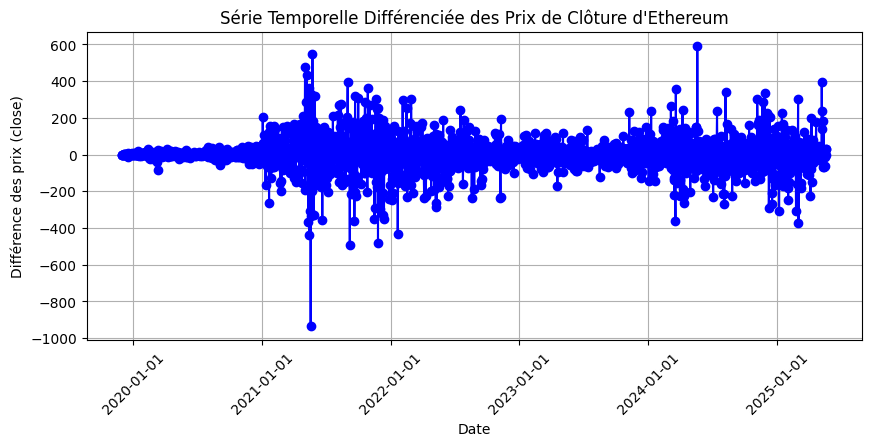

In [28]:
# Calcul de la différence première des prix de clôture d'Ethereum
diff_res = ethereum_data['close'].diff().dropna()

# Utiliser l'index des dates correctement pour diff_res
diff_res.index = ethereum_data['time'].iloc[1:]  # On prend les dates à partir du 2ème point

# Affichage des résultats
plt.figure(figsize=(10, 4))
plt.plot(diff_res, marker='o', linestyle='-', color='b')
plt.title('Série Temporelle Différenciée des Prix de Clôture d\'Ethereum')
plt.xlabel('Date')
plt.ylabel('Différence des prix (close)')
plt.grid(True)

# Formater l'axe des X pour afficher les dates au format année-mois-jour
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

plt.show()



Autocorrélation (ACF) des prix de clôture de Bitcoin:
[1.         0.99628998 0.99276913 0.98925116 0.98567767 0.98221549
 0.97872083 0.97530246 0.97192462 0.96863084 0.9651826  0.96154256
 0.95782981 0.95432242 0.95055902 0.94715079 0.94382166 0.94068094
 0.93743848 0.93417178 0.93098324 0.92781897 0.92474661 0.9216628
 0.91858942 0.91537217 0.91205428 0.90865548 0.90518053 0.90160926
 0.89815123 0.8949317  0.89162875 0.88841583 0.88513686 0.88185251
 0.87857503 0.87536496 0.87209997 0.86898619 0.86585989 0.86261791
 0.85965201 0.85671726 0.854042   0.85106653 0.84827073 0.84532134
 0.8424174  0.83941417 0.83650562 0.83342499 0.83062756 0.82785655
 0.82510425 0.82218183 0.81903227 0.81582143 0.81246222 0.80901507
 0.80563595 0.80253257 0.79927206 0.79614288 0.79295039 0.78999499
 0.78684669 0.78383555 0.78055587 0.77718822 0.77404509 0.77066174
 0.7673544  0.76437371 0.76148846 0.75840983 0.75528245 0.75212758
 0.74894104 0.74583452 0.74281455 0.73918138 0.73595929 0.73290649
 0.72996

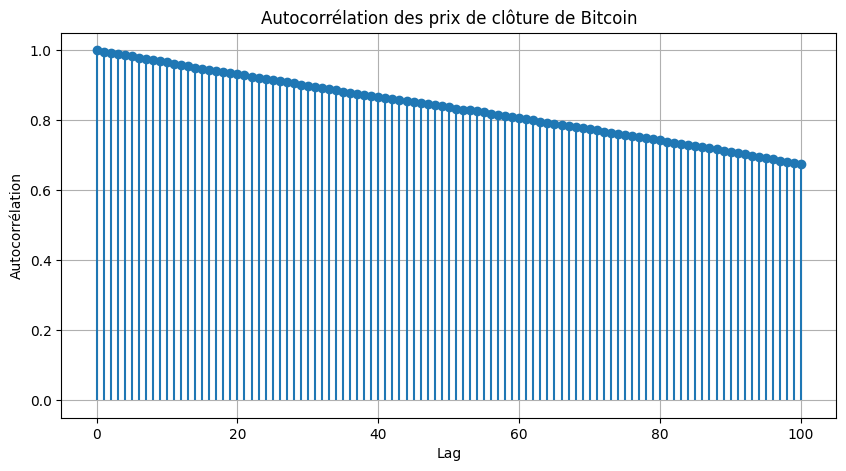

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculer l'autocorrélation de la série de prix de clôture de Bitcoin
pp_result = sm.tsa.acf(bitcoin_data['close'], nlags=100)  # Calculer l'autocorrélation pour 40 lags

# Affichage des résultats
print("\nAutocorrélation (ACF) des prix de clôture de Bitcoin:")
print(pp_result)

# Affichage graphique de l'autocorrélation
plt.figure(figsize=(10, 5))
plt.stem(range(len(pp_result)), pp_result, basefmt=" ")  # On retire l'argument use_line_collection
plt.xlabel('Lag')
plt.ylabel('Autocorrélation')
plt.title('Autocorrélation des prix de clôture de Bitcoin')
plt.grid(True)
plt.show()



Autocorrélation (ACF) des prix de clôture de Ethereum:
[1.         0.99589027 0.99227581 0.98849461 0.98450844 0.98040821
 0.97663078 0.9724159  0.96833262 0.96448027 0.9605704  0.95650712
 0.95236128 0.94859481 0.94456479 0.94080131 0.93714361 0.93383702
 0.93017342 0.9267211  0.92338594 0.9200899  0.9166463  0.91323284
 0.90976702 0.90622367 0.90251832 0.89879608 0.89478115 0.89036856
 0.88610159 0.88156472 0.87674468 0.87225661 0.86748085 0.86275486
 0.85788392 0.85312171 0.84845962 0.84418395 0.84015453 0.83597545
 0.83198246 0.82793496 0.82393542 0.82003953 0.81646382 0.81300153
 0.80959167 0.80607514 0.80276126 0.79940232 0.79635127 0.79332309
 0.79015326 0.78690074 0.78348821 0.77977348 0.7760515  0.77211512
 0.76813865 0.76438774 0.76061976 0.75673191 0.75313385 0.74967772
 0.74639866 0.74319739 0.73989783 0.73632006 0.73291894 0.72952559
 0.72649976 0.72370649 0.7212239  0.7188423  0.71642981 0.71416716
 0.71198779 0.71000113 0.70799701 0.70557138 0.70307726 0.70072686
 0.698

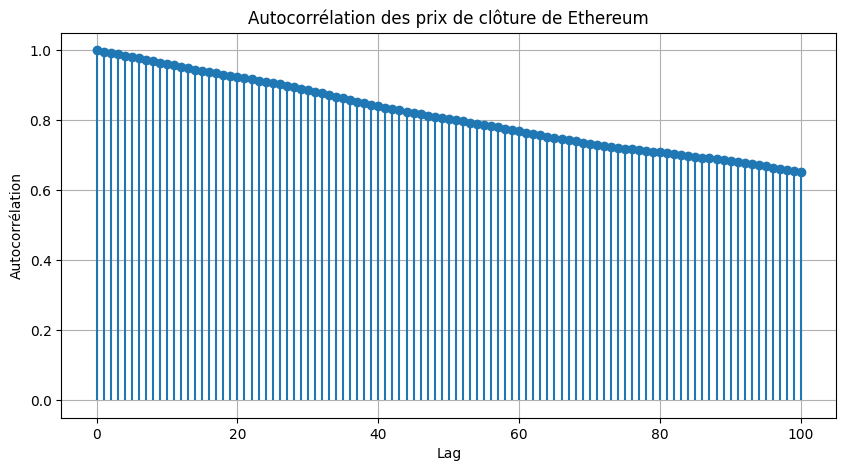

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculer l'autocorrélation de la série de prix de clôture de Bitcoin
pp_result = sm.tsa.acf(ethereum_data['close'], nlags=100)  # Calculer l'autocorrélation pour 40 lags

# Affichage des résultats
print("\nAutocorrélation (ACF) des prix de clôture de Ethereum:")
print(pp_result)

# Affichage graphique de l'autocorrélation
plt.figure(figsize=(10, 5))
plt.stem(range(len(pp_result)), pp_result, basefmt=" ")  # On retire l'argument use_line_collection
plt.xlabel('Lag')
plt.ylabel('Autocorrélation')
plt.title('Autocorrélation des prix de clôture de Ethereum')
plt.grid(True)
plt.show()



PACF des prix de clôture de Bitcoin:
[ 1.00000000e+00  9.96788123e-01  2.74159061e-02 -7.00208575e-04
 -1.06503612e-02  1.48500175e-02 -6.09448783e-03  9.75755414e-03
  4.76117660e-03  1.19764911e-02 -2.57215274e-02 -3.32081158e-02
 -1.55139825e-02  3.03405185e-02 -4.07645468e-02  5.13957963e-02
  1.24042659e-02  2.98044302e-02 -2.03766203e-02 -4.16668044e-03
  1.01087675e-02  7.05895744e-03  1.12600377e-02 -3.99432139e-04
 -6.06820337e-04 -2.64469592e-02 -2.54247712e-02 -1.24254186e-02
 -1.66255281e-02 -1.45148730e-02  1.24716380e-02  3.99134621e-02
 -1.48286720e-02  9.16311488e-03 -1.13679683e-02 -2.10445351e-04
  2.55878114e-03  1.13066943e-02 -6.68733580e-03  2.15874133e-02
 -8.76372063e-03 -2.51666699e-02  3.93314963e-02  6.26497515e-03
  3.76836388e-02 -4.31833761e-02  2.47439757e-02 -2.47142477e-02
  2.54868828e-03 -2.02299493e-02  1.77418868e-02 -2.64660590e-02
  4.28792765e-02  1.21908914e-03  7.80738199e-03 -3.87126604e-02
 -3.33651206e-02 -2.16884738e-02 -1.11006125e-02 -2.

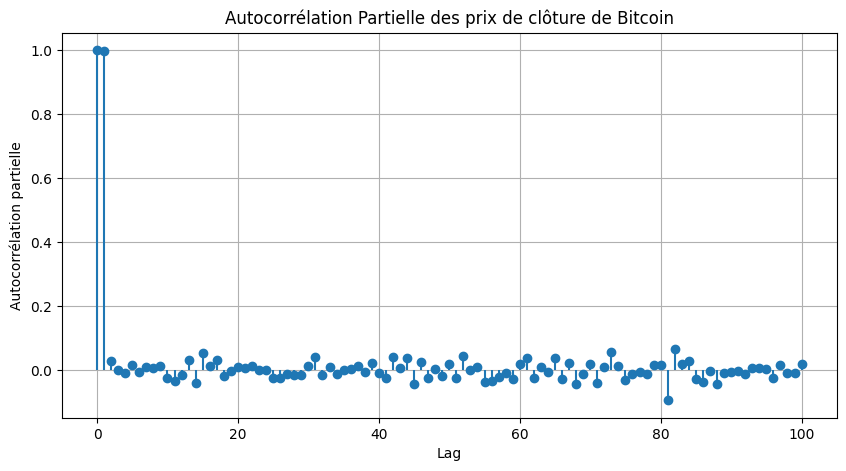

In [31]:
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt

# Calcul de la fonction d'autocorrélation partielle (PACF) pour 40 lags
pacf_result = pacf(bitcoin_data['close'], nlags=100)

# Affichage des résultats
print("\nPACF des prix de clôture de Bitcoin:")
print(pacf_result)

# Affichage graphique de la PACF
plt.figure(figsize=(10, 5))
plt.stem(range(len(pacf_result)), pacf_result, basefmt=" ")
plt.xlabel('Lag')
plt.ylabel('Autocorrélation partielle')
plt.title('Autocorrélation Partielle des prix de clôture de Bitcoin')
plt.grid(True)
plt.show()



PACF des prix de clôture de Euthereum:
[ 1.00000000e+00  9.96388220e-01  6.64440593e-02 -2.06062342e-02
 -3.36127824e-02 -2.18524466e-02  4.17514098e-02 -5.57559265e-02
  7.47325391e-03  3.22049159e-02 -4.45565383e-03 -2.33882254e-02
 -2.38776546e-02  5.39497666e-02 -2.90846063e-02  2.61490665e-02
  1.57082800e-02  5.09147967e-02 -4.32135729e-02  6.90746280e-03
  2.34805952e-02  7.42161172e-03 -2.24609650e-02 -1.10788915e-02
  1.06203779e-04 -9.72110437e-03 -3.61838971e-02 -5.40997621e-03
 -3.81261160e-02 -5.80875635e-02  3.33112073e-03 -2.77566715e-02
 -4.12495212e-02  3.90992929e-02 -4.13567818e-02  1.35853616e-02
 -3.10539070e-02  7.34071626e-03  2.11220421e-02  5.12564882e-02
  3.87385323e-02 -2.89216467e-02  2.08127415e-02 -1.76434143e-02
 -3.66225765e-03  1.37372335e-02  3.90155162e-02  2.69019774e-02
 -6.82878751e-03 -1.39076829e-02  1.47524336e-02  3.73724329e-03
  4.05151535e-02  1.38708023e-02 -1.19038000e-02 -1.28631405e-02
 -2.76302685e-02 -4.37396929e-02  1.08826157e-04 -

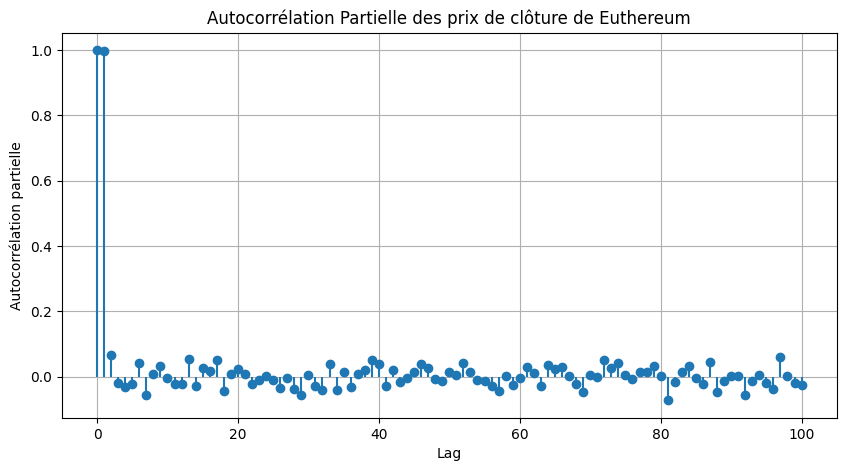

In [32]:
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt

# Calcul de la fonction d'autocorrélation partielle (PACF) pour 40 lags
pacf_result = pacf(ethereum_data['close'], nlags=100)

# Affichage des résultats
print("\nPACF des prix de clôture de Euthereum:")
print(pacf_result)

# Affichage graphique de la PACF
plt.figure(figsize=(10, 5))
plt.stem(range(len(pacf_result)), pacf_result, basefmt=" ")
plt.xlabel('Lag')
plt.ylabel('Autocorrélation partielle')
plt.title('Autocorrélation Partielle des prix de clôture de Euthereum')
plt.grid(True)
plt.show()


In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Définition du modèle ARIMA avec les paramètres (0,1,0)
model = ARIMA(bitcoin_data['close'], order=(0, 1, 0))

# Ajuster le modèle sur les données
model_fit = model.fit()

# Afficher le résumé du modèle ajusté
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2001
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -17348.791
Date:                Wed, 21 May 2025   AIC                          34699.582
Time:                        07:44:31   BIC                          34705.183
Sample:                             0   HQIC                         34701.639
                               - 2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.004e+06   3.28e+04     61.127      0.000    1.94e+06    2.07e+06
Ljung-Box (L1) (Q):                   8.67   Jarque-Bera (JB):              2489.44
Prob(Q):                              0.00   Pr

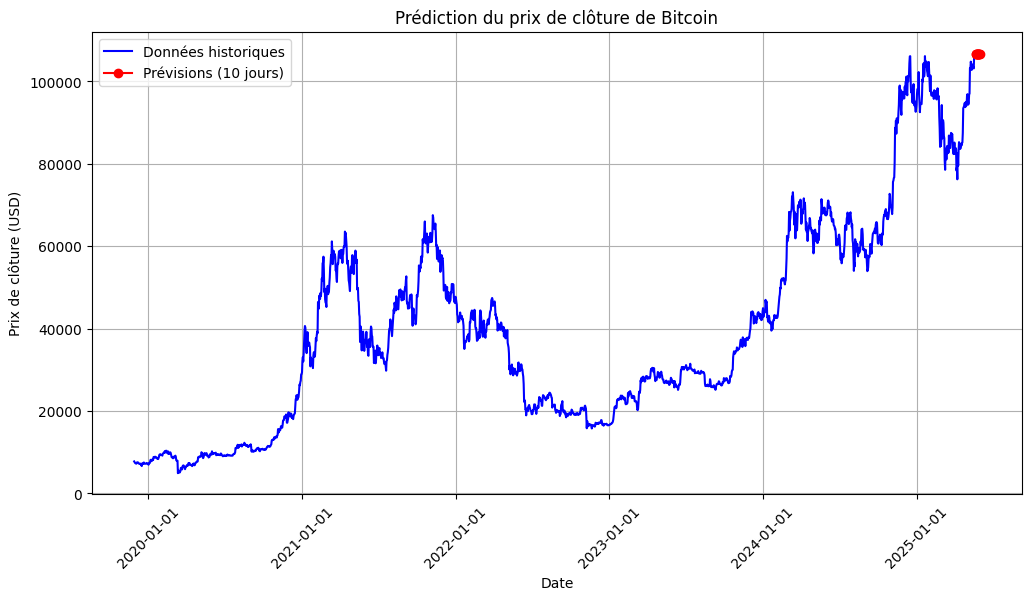

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Faire une prédiction pour les 10 prochaines étapes (en utilisant model_fit)
forecast = model_fit.forecast(steps=10)

# Générer une plage de dates pour les prévisions (en supposant que tes données sont journalières)
forecast_index = pd.date_range(start=bitcoin_data['time'].iloc[-1], periods=11, freq='D')[1:]

# Tracer la série historique des prix de clôture de Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['time'], bitcoin_data['close'], label='Données historiques', color='blue')

# Tracer les prévisions en les ajoutant à la fin des données historiques
plt.plot(forecast_index, forecast, label='Prévisions (10 jours)', color='red', marker='o')

# Ajouter des labels et une légende
plt.title('Prédiction du prix de clôture de Bitcoin')  # Modifier le titre pour Bitcoin
plt.xlabel('Date')
plt.ylabel('Prix de clôture (USD)')
plt.legend()

# Formater l'axe des X pour afficher les dates au format année-mois-jour
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Ajouter une grille et afficher le graphique
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.show()


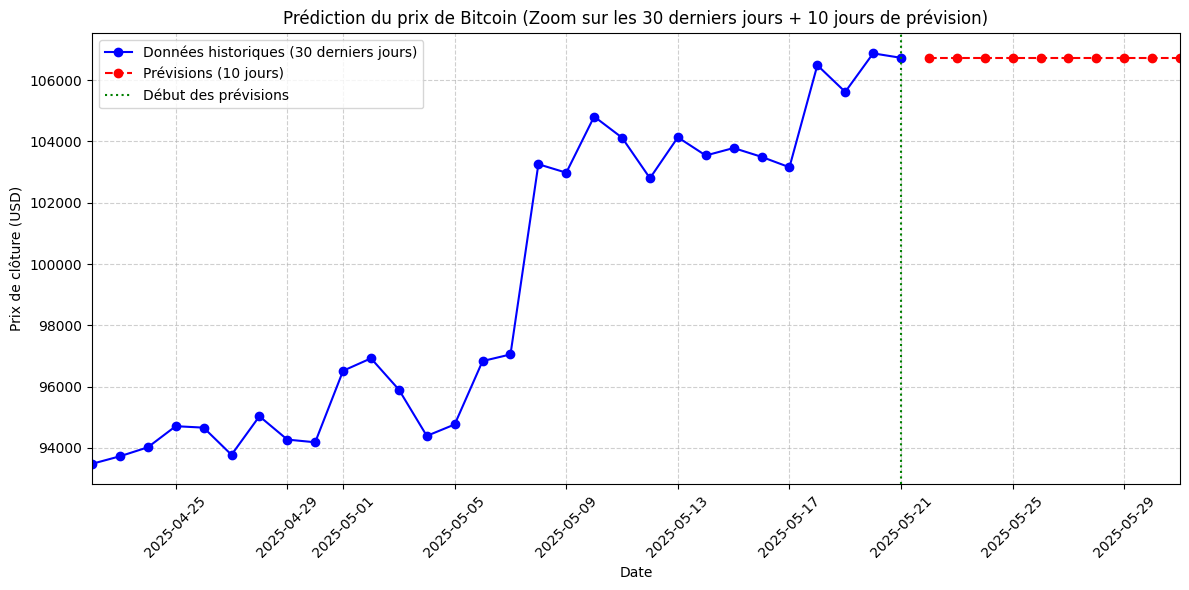

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Faire une prédiction pour les 10 prochaines étapes (en utilisant model_fit)
forecast = model_fit.forecast(steps=10)

# Générer une plage de dates pour les prévisions (fréquence journalière)
forecast_index = pd.date_range(
    start=bitcoin_data['time'].iloc[-1],  # Dernière date historique
    periods=11,  # 10 jours de prévision + 1 jour de départ
    freq='D'  # Fréquence journalière
)[1:]  # On exclut le premier jour (dupliqué)

# --- ZOOM : Sélectionner les 30 derniers jours historiques + prévisions ---
last_n_days = 30  # Nombre de jours historiques à afficher avant la prévision

# Sélection des dernières données
historical_dates = bitcoin_data['time'].iloc[-last_n_days:]
historical_prices = bitcoin_data['close'].iloc[-last_n_days:]

# Création du graphique
plt.figure(figsize=(12, 6))

# Tracer les données historiques (30 derniers jours)
plt.plot(
    historical_dates,
    historical_prices,
    label='Données historiques (30 derniers jours)',
    color='blue',
    marker='o'
)

# Tracer les prévisions (10 jours)
plt.plot(
    forecast_index,
    forecast,
    label='Prévisions (10 jours)',
    color='red',
    linestyle='--',
    marker='o'
)

# Ajout d'une ligne verticale pour séparer historique et prévision
last_historical_date = bitcoin_data['time'].iloc[-1]
plt.axvline(
    x=last_historical_date,
    color='green',
    linestyle=':',
    label='Début des prévisions'
)

# Labels, titre et légende
plt.title('Prédiction du prix de Bitcoin (Zoom sur les 30 derniers jours + 10 jours de prévision)')
plt.xlabel('Date')
plt.ylabel('Prix de clôture (USD)')
plt.legend()

# Format des dates sur l'axe X
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Ajustement automatique des limites de l'axe X pour le zoom
plt.xlim(
    left=historical_dates.iloc[0],  # Première date des données affichées
    right=forecast_index[-1]  # Dernière date de prévision
)

# Grille et affichage
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()  # Éviter les coupures de labels
plt.show()

In [36]:
import numpy as np

# Calcul des résidus (erreurs) du modèle ajusté
residuals = model_fit.resid

# Erreur Absolue Moyenne (MAE)
mae = np.mean(np.abs(residuals))
print("Mean Absolute Error (MAE): ", mae)

# Erreur Quadratique Moyenne Racine (RMSE)
rmse = np.sqrt(np.mean(residuals**2))
print("Root Mean Squared Error (RMSE): ", rmse)

# Erreur Absolue en Pourcentage Moyenne (MAPE)
# On utilise les données réelles pour calculer le MAPE (il faut que tu aies les valeurs réelles de tes prévisions).
# Supposons que 'bitcoin_data['close']' contient les valeurs réelles de la série.
# Attention : Le calcul du MAPE ne doit pas inclure des zéros pour éviter la division par zéro.

mape = np.mean(np.abs(residuals) / bitcoin_data['close'][1:]) * 100  # Assure-toi d'utiliser les bonnes valeurs réelles
print("Mean Absolute Percentage Error (MAPE): ", mape)


Mean Absolute Error (MAE):  880.1501949025487
Root Mean Squared Error (RMSE):  1426.0722655203895
Mean Absolute Percentage Error (MAPE):  2.2505042299920133


In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Définition du modèle ARIMA avec les paramètres (0,1,0)
model = ARIMA(ethereum_data['close'], order=(0, 1, 0))

# Ajuster le modèle sur les données
model_fit = model.fit()

# Afficher le résumé du modèle ajusté
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2001
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11925.082
Date:                Wed, 21 May 2025   AIC                          23852.163
Time:                        07:44:32   BIC                          23857.764
Sample:                             0   HQIC                         23854.220
                               - 2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8837.0153    115.256     76.673      0.000    8611.117    9062.913
Ljung-Box (L1) (Q):                  10.47   Jarque-Bera (JB):              8014.48
Prob(Q):                              0.00   Pr

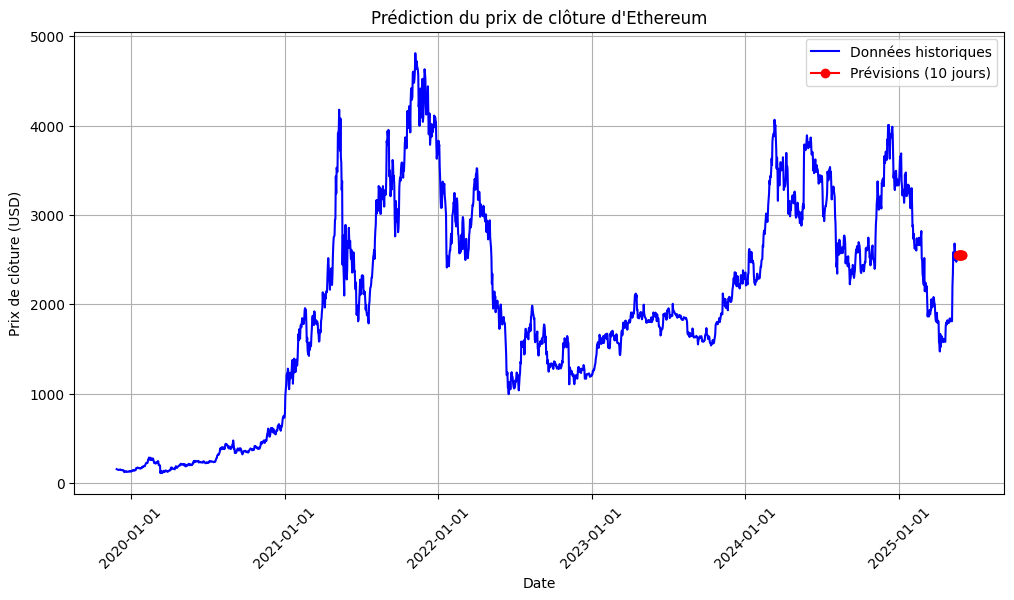

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Faire une prédiction pour les 10 prochaines étapes (en utilisant model_fit)
forecast = model_fit.forecast(steps=10)

# Générer une plage de dates pour les prévisions (en supposant que tes données sont journalières)
forecast_index = pd.date_range(start=ethereum_data['time'].iloc[-1], periods=11, freq='D')[1:]

# Tracer la série historique des prix de clôture d'Ethereum
plt.figure(figsize=(12, 6))
plt.plot(ethereum_data['time'], ethereum_data['close'], label='Données historiques', color='blue')

# Tracer les prévisions en les ajoutant à la fin des données historiques
plt.plot(forecast_index, forecast, label='Prévisions (10 jours)', color='red', marker='o')

# Ajouter des labels et une légende
plt.title('Prédiction du prix de clôture d\'Ethereum')
plt.xlabel('Date')
plt.ylabel('Prix de clôture (USD)')
plt.legend()

# Formater l'axe des X pour afficher les années (ou mois si tu préfères)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Ajouter une grille et afficher le graphique
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.show()


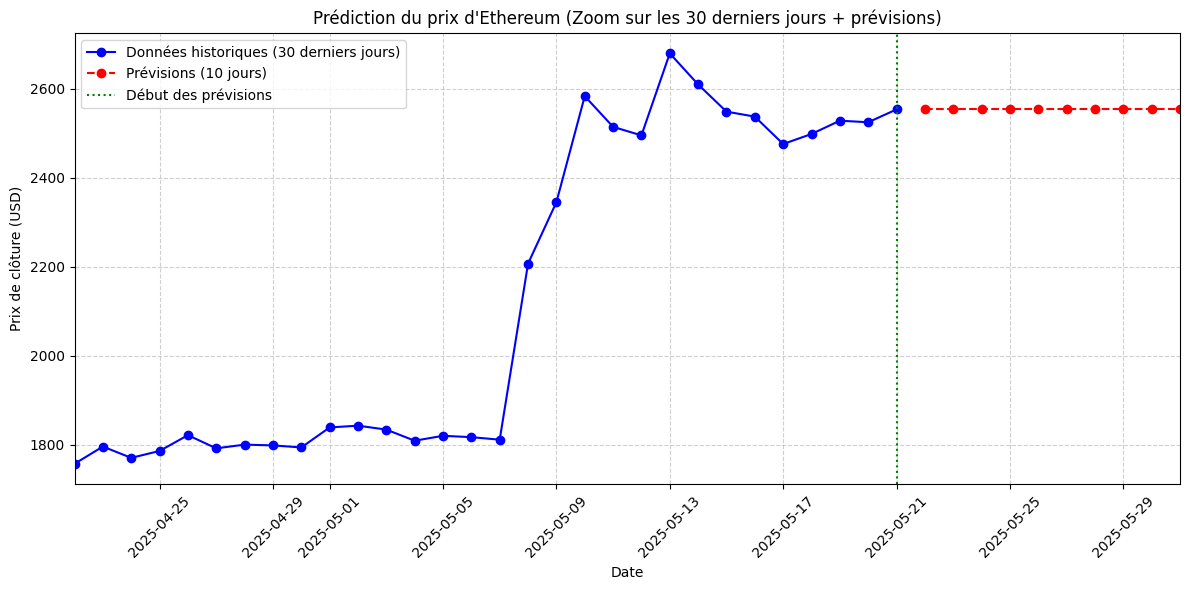

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# 1. Faire une prédiction pour les 10 prochaines étapes
forecast = model_fit.forecast(steps=10)

# 2. Générer les dates des prévisions (fréquence journalière)
forecast_index = pd.date_range(
    start=ethereum_data['time'].iloc[-1],  # Dernière date historique
    periods=11,  # 10 jours de prévision + 1 jour de départ
    freq='D'  # Fréquence journalière
)[1:]  # On exclut le premier jour (dupliqué)

# 3. Paramètres du zoom
last_n_days = 30  # Nombre de jours historiques à afficher avant la prévision

# 4. Sélection des dernières données historiques
historical_dates = ethereum_data['time'].iloc[-last_n_days:]
historical_prices = ethereum_data['close'].iloc[-last_n_days:]

# 5. Création du graphique
plt.figure(figsize=(12, 6))

# Tracer les données historiques (30 derniers jours)
plt.plot(
    historical_dates,
    historical_prices,
    label=f'Données historiques ({last_n_days} derniers jours)',
    color='blue',
    marker='o'
)

# Tracer les prévisions (10 jours)
plt.plot(
    forecast_index,
    forecast,
    label='Prévisions (10 jours)',
    color='red',
    linestyle='--',
    marker='o'
)

# Ligne verticale pour séparer historique et prévision
plt.axvline(
    x=ethereum_data['time'].iloc[-1],
    color='green',
    linestyle=':',
    label='Début des prévisions'
)

# 6. Mise en forme
plt.title('Prédiction du prix d\'Ethereum (Zoom sur les 30 derniers jours + prévisions)')
plt.xlabel('Date')
plt.ylabel('Prix de clôture (USD)')
plt.legend()

# Format des dates et rotation
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Ajustement des limites pour le zoom
plt.xlim(
    left=historical_dates.iloc[0],  # Première date affichée
    right=forecast_index[-1]  # Dernière date de prévision
)

# Grille et affichage
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [40]:
import numpy as np

# Calcul des résidus (erreurs) du modèle ajusté
residuals = model_fit.resid

# Erreur Absolue Moyenne (MAE)
mae = np.mean(np.abs(residuals))
print("Mean Absolute Error (MAE): ", mae)

# Erreur Quadratique Moyenne Racine (RMSE)
rmse = np.sqrt(np.mean(residuals**2))
print("Root Mean Squared Error (RMSE): ", rmse)

# Erreur Absolue en Pourcentage Moyenne (MAPE)
# On utilise les données réelles pour calculer le MAPE (il faut que tu aies les valeurs réelles de tes prévisions).
# Supposons que 'bitcoin_data['close']' contient les valeurs réelles de la série.
# Attention : Le calcul du MAPE ne doit pas inclure des zéros pour éviter la division par zéro.

mape = np.mean(np.abs(residuals) / bitcoin_data['close'][1:]) * 100  # Assure-toi d'utiliser les bonnes valeurs réelles
print("Mean Absolute Percentage Error (MAPE): ", mape)


Mean Absolute Error (MAE):  57.91203898050975
Root Mean Squared Error (RMSE):  94.06930531182357
Mean Absolute Percentage Error (MAPE):  0.1493690323289158


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0249 - mae: 0.1082 - val_loss: 0.0027 - val_mae: 0.0396
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0016 - mae: 0.0275 - val_loss: 0.0020 - val_mae: 0.0340
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - mae: 0.0247 - val_loss: 0.0023 - val_mae: 0.0371
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - mae: 0.0266 - val_loss: 0.0061 - val_mae: 0.0674
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - mae: 0.0244 - val_loss: 0.0024 - val_mae: 0.0386
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.8545e-04 - mae: 0.0215 - val_loss: 0.0018 - val_mae: 0.0340
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - mae: 0.0241 - val_loss: 0.0019 - val_mae: 0.0339
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.0066e-04 - mae: 0.0203 - val_loss: 0.0027 - val_mae: 0.0420
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - l

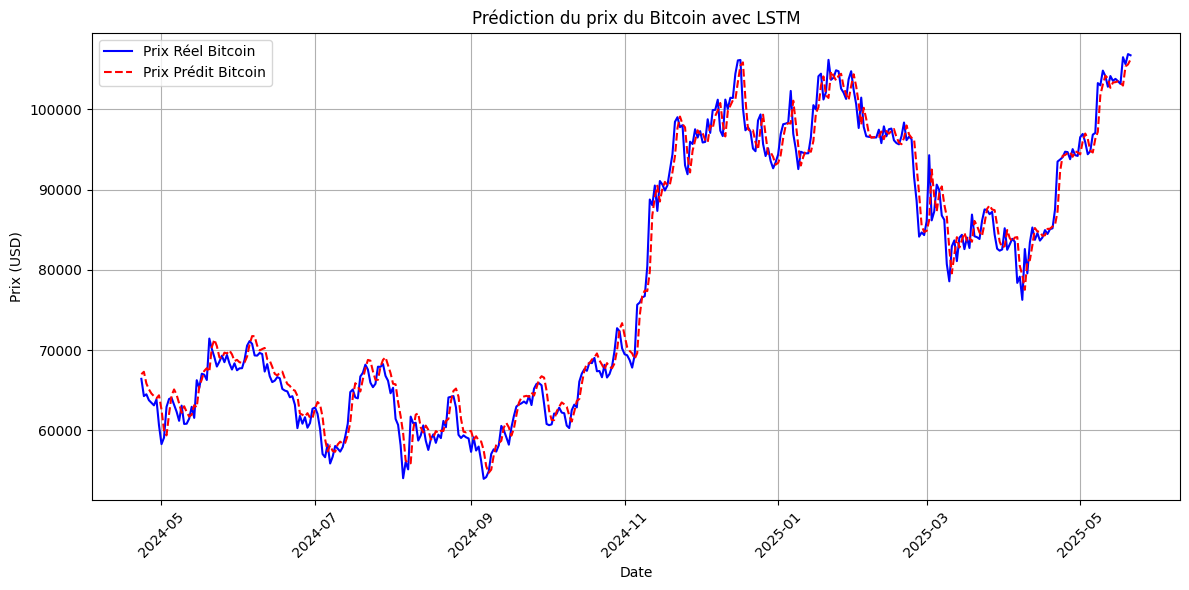

In [41]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score


# Fonction pour récupérer les données historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours à récupérer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Paramètre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la récupération des données: {response.status_code}")
        return None


# Fonction pour prétraiter les données
def preprocess_data(df):
    # Calculer les rendements quotidiens
    df['return'] = df['close'].pct_change()

    # Supprimer les NaN
    df = df.dropna()

    # Normalisation des données avec MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(df[['close', 'return']])

    return df, df_scaled, scaler


# Fonction pour créer des séquences pour l'entraînement du LSTM
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])  # Utiliser uniquement la colonne 'close' pour X
        y.append(data[i + seq_length, 0])  # La cible est la colonne 'close' après seq_length
    return np.array(X), np.array(y)


# Fonction pour construire le modèle LSTM
def build_model(seq_length, input_shape):
    model = Sequential()

    # Première couche LSTM
    model.add(LSTM(units=64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))

    # Deuxième couche LSTM
    model.add(LSTM(units=64, return_sequences=False))
    model.add(Dropout(0.2))

    # Couche Dense
    model.add(Dense(units=32, activation='relu'))

    # Couche de sortie
    model.add(Dense(units=1))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
    return model


# Fonction principale pour entraîner le modèle
def main():
    # Dates
    today = datetime.today()
    end_timestamp = int(time.mktime(today.timetuple()))
    start_timestamp = 1614556800  # Exemple pour le début de l'année 2021

    # Collecter les données de Bitcoin
    bitcoin_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)

    # Vérification des données
    if bitcoin_data is None:
        return

    # Prétraitement des données
    df, df_scaled, scaler = preprocess_data(bitcoin_data)

    # Création des séquences pour l'entraînement
    seq_length = 30
    X, y = create_sequences(df_scaled, seq_length)

    # Reshape pour LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construire le modèle LSTM
    model = build_model(seq_length, input_shape=(X_train.shape[1], 1))

    # EarlyStopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Entraîner le modèle
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions
    y_pred = model.predict(X_test)

    # Inverser la normalisation pour obtenir les prix réels
    y_test_rescaled = scaler.inverse_transform(np.column_stack((y_test, np.zeros_like(y_test))))[:, 0]
    y_pred_rescaled = scaler.inverse_transform(np.column_stack((y_pred, np.zeros_like(y_pred))))[:, 0]

    # Évaluation
    mse = np.mean((y_test_rescaled - y_pred_rescaled) ** 2)
    rmse = np.sqrt(mse)
    r2=r2_score(y_test_rescaled, y_pred_rescaled)
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des résultats
    plt.figure(figsize=(12, 6))
    plt.plot(bitcoin_data['time'].iloc[-len(y_test_rescaled):], y_test_rescaled, label='Prix Réel Bitcoin', color='blue')
    plt.plot(bitcoin_data['time'].iloc[-len(y_pred_rescaled):], y_pred_rescaled, label='Prix Prédit Bitcoin', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix (USD)')
    plt.title('Prédiction du prix du Bitcoin avec LSTM')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Appel à la fonction principale
main()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0301 - val_loss: 0.0096
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0039 - val_loss: 0.0084
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 12/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0020 - val_loss: 0.0

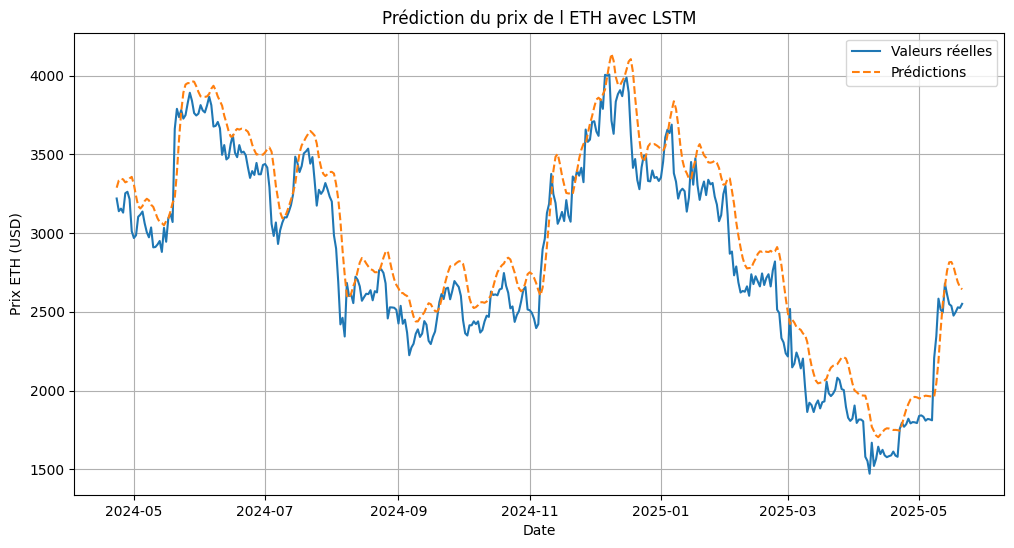

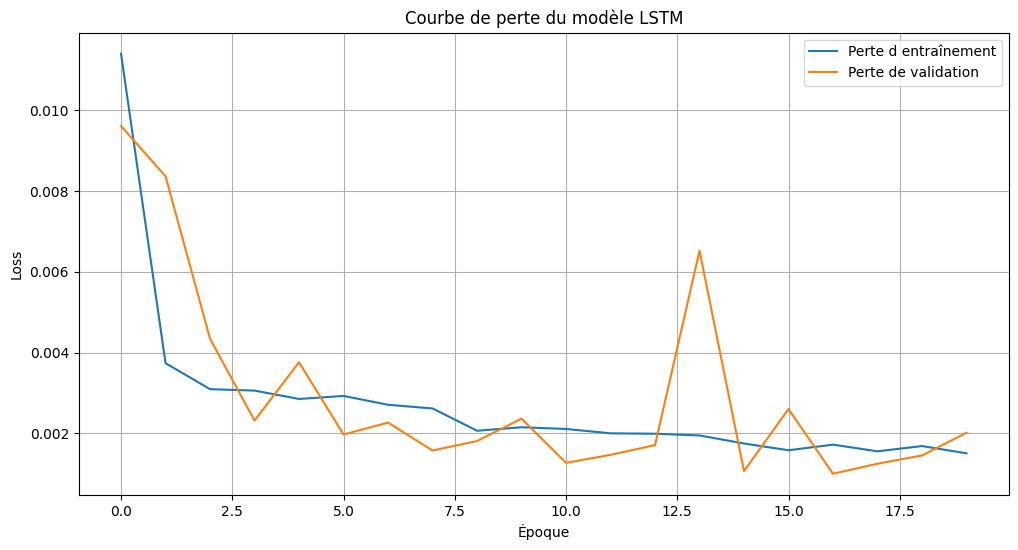

In [42]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from datetime import datetime
import time


# Définition des timestamps
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Début de l'année 2021

# Collecte des données
bitcoin_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
ethereum_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# 2. Prétraitement des données
def preprocess_data(btc_df, eth_df):
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()
    df.dropna(inplace=True)
    return df

data = preprocess_data(bitcoin_data, ethereum_data)

# 3. Préparation des données pour le RNN
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['close_btc', 'close_eth']])

def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 1])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(data_scaled, seq_length)
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# 4. Construction du modèle LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 2)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 5. Entraînement du modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# 6. Prédictions et évaluation
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_rescaled = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Squared Error: {mse}")

# 7. Visualisation des prédictions
plt.figure(figsize=(12, 6))
plt.plot(data['time'][-len(y_test):], y_test_rescaled, label='Valeurs réelles')
plt.plot(data['time'][-len(y_test):], y_pred_rescaled, label='Prédictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Prix ETH (USD)')
plt.title('Prédiction du prix de l ETH avec LSTM')
plt.legend()
plt.grid(True)
plt.show()

# 8. Visualisation de la perte
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perte d entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.title('Courbe de perte du modèle LSTM')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0273 - mae: 0.1134 - val_loss: 0.0108 - val_mae: 0.0749
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - mae: 0.0564 - val_loss: 0.0096 - val_mae: 0.0712
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077 - mae: 0.0605 - val_loss: 0.0077 - val_mae: 0.0660
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065 - mae: 0.0553 - val_loss: 0.0057 - val_mae: 0.0600
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - mae: 0.0575 - val_loss: 0.0087 - val_mae: 0.0681
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - mae: 0.0524 - val_loss: 0.0067 - val_mae: 0.0628
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059 - mae: 0.0535 - val_loss: 0.0099 - val_mae: 0.0711
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060 - mae: 0.0523 - val_loss: 0.0100 - val_mae: 0.0712
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0058 - mae

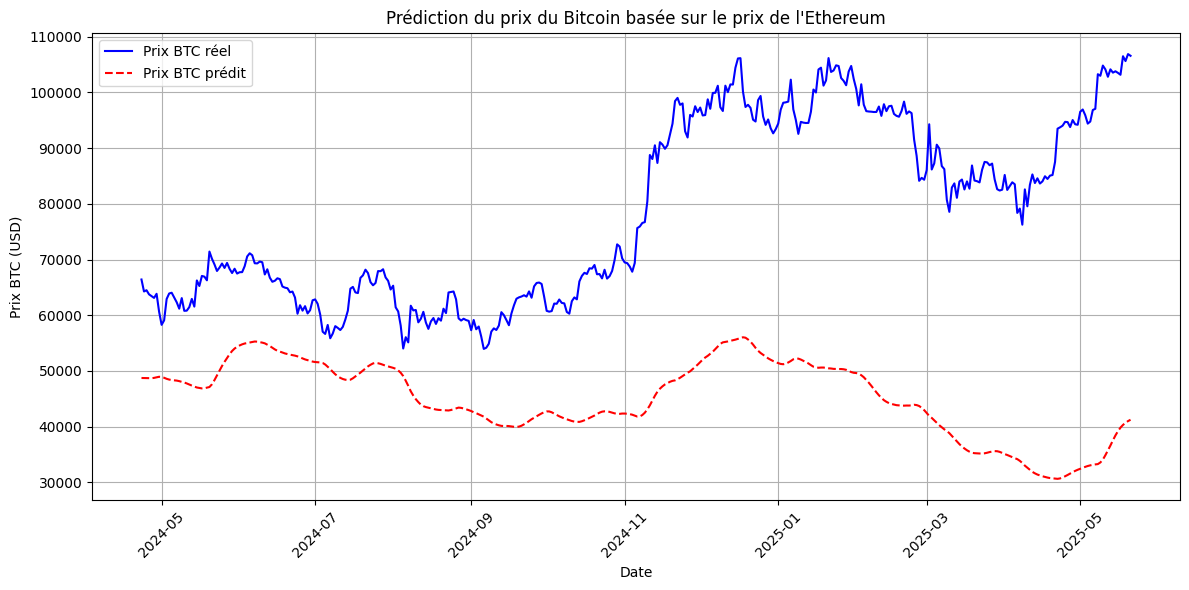

In [43]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Récupérer les données historiques de Bitcoin et Ethereum
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Fonction pour prétraiter les données
def preprocess_data(btc_df, eth_df):
    # Fusionner les données BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si nécessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les données par ordre chronologique
    df = df.sort_values('time')

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour créer des séquences pour l'entraînement LSTM
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les séquences de prix ETH comme features
        X.append(eth_prices[i:i+seq_length])
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le modèle LSTM
def build_model(seq_length, features=1):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle
    model = build_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin basée sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, eth_scaler, btc_scaler

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - loss: 0.0966 - mae: 0.2161 - val_loss: 0.0048 - val_mae: 0.0532
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0133 - mae: 0.0830 - val_loss: 0.0111 - val_mae: 0.0783
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0096 - mae: 0.0708 - val_loss: 0.0067 - val_mae: 0.0599
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mae: 0.0667 - val_loss: 0.0154 - val_mae: 0.0941
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mae: 0.0666 - val_loss: 0.0076 - val_mae: 0.0639
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mae: 0.0613 - val_loss: 0.0112 - val_mae: 0.0789
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0076 - mae: 0.0599 - val_loss: 0.0071 - val_mae: 0.0612
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0070 - mae: 0.0577 - val_loss: 0.0062 - val_mae: 0.0571
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 - mae: 0

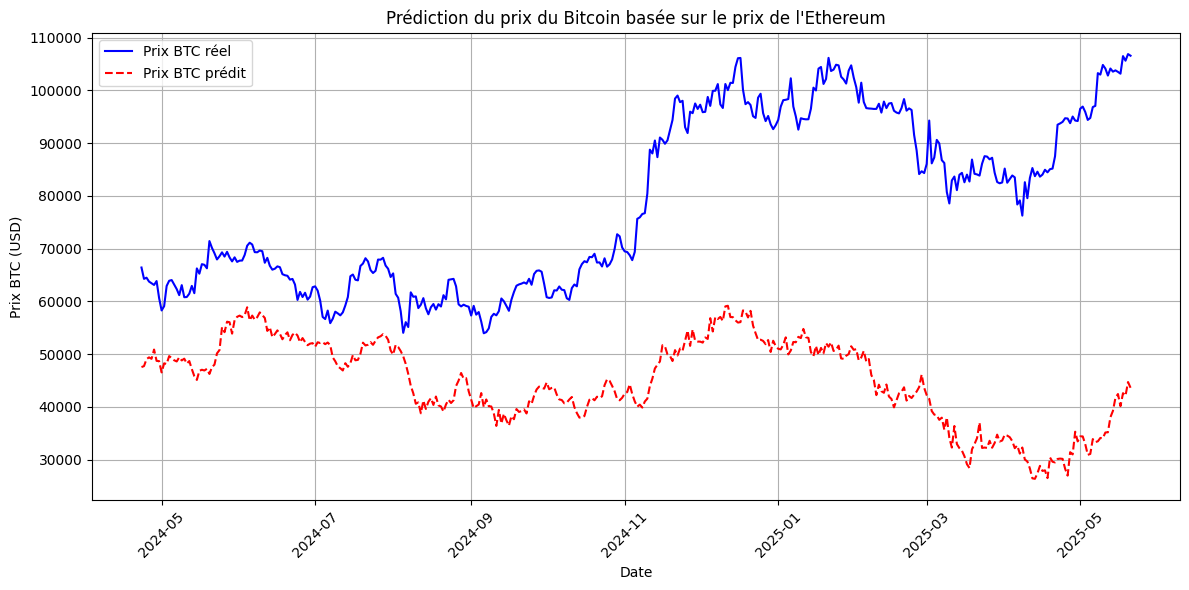

In [44]:
# Fonction pour construire le modèle RNN Simple
def build_rnn_model(seq_length, features=1):
    model = Sequential([
        # Première couche RNN
        SimpleRNN(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        # Deuxième couche RNN
        SimpleRNN(64, return_sequences=False),
        Dropout(0.2),
        # Couches entièrement connectées
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main_rnn(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour RNN (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle RNN
    model = build_rnn_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin basée sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, eth_scaler, btc_scaler

# Appeler la fonction principale avec les données récupérées pour RNN
if btc_data is not None and eth_data is not None:
    model_rnn, eth_scaler_rnn, btc_scaler_rnn = main_rnn(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0297 - mae: 0.1136 - val_loss: 0.0116 - val_mae: 0.0808
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064 - mae: 0.0509 - val_loss: 0.0085 - val_mae: 0.0663
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - mae: 0.0531 - val_loss: 0.0082 - val_mae: 0.0658
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0061 - mae: 0.0537 - val_loss: 0.0074 - val_mae: 0.0636
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0060 - mae: 0.0526 - val_loss: 0.0073 - val_mae: 0.0631
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0057 - mae: 0.0517 - val_loss: 0.0108 - val_mae: 0.0736
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065 - mae: 0.0533 - val_loss: 0.0086 - val_mae: 0.0669
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - mae: 0.0544 - val_loss: 0.0096 - val_mae: 0.0696
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - mae: 

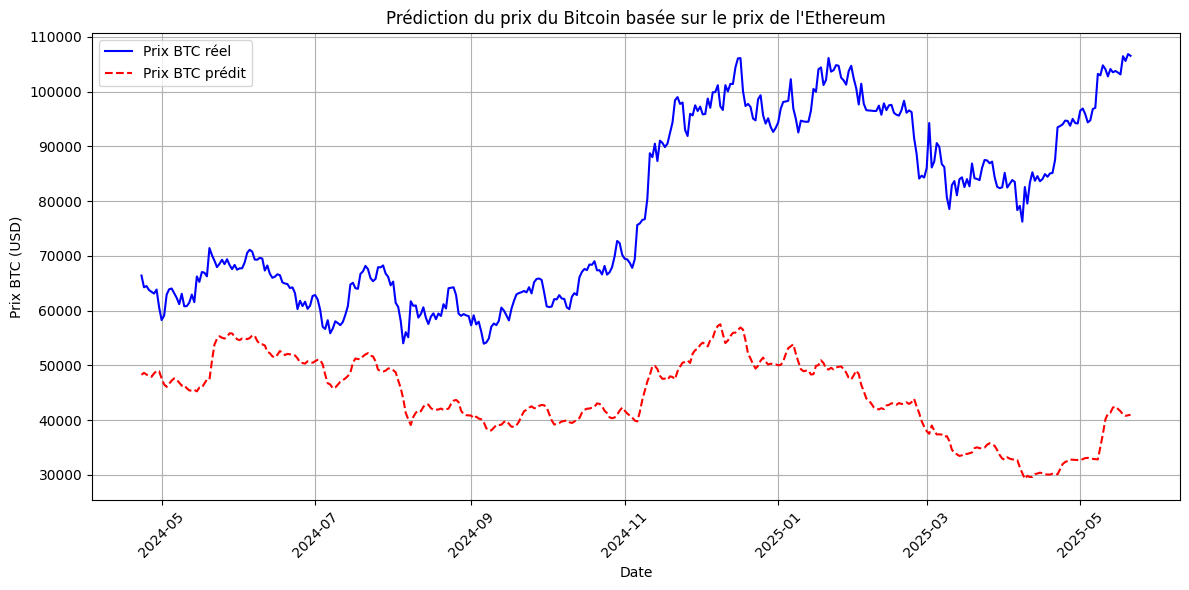

In [45]:

# Fonction pour construire le modèle GRU
def build_gru_model(seq_length, features=1):
    model = Sequential([
        # Première couche GRU
        GRU(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        # Deuxième couche GRU
        GRU(64, return_sequences=False),
        Dropout(0.2),
        # Couches entièrement connectées
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main_gru(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour GRU (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle GRU
    model = build_gru_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin basée sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, eth_scaler, btc_scaler

# Appeler la fonction principale avec les données récupérées pour GRU
if btc_data is not None and eth_data is not None:
    model_gru, eth_scaler_gru, btc_scaler_gru = main_gru(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0190 - mae: 0.0959 - val_loss: 0.0078 - val_mae: 0.0679
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0072 - mae: 0.0599 - val_loss: 0.0080 - val_mae: 0.0676
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0061 - mae: 0.0530 - val_loss: 0.0099 - val_mae: 0.0716
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0060 - mae: 0.0521 - val_loss: 0.0073 - val_mae: 0.0640
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0067 - mae: 0.0590 - val_loss: 0.0113 - val_mae: 0.0745
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0054 - mae: 0.0501 - val_loss: 0.0090 - val_mae: 0.0678
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0061 - mae: 0.0547 - val_loss: 0.0080 - val_mae: 0.0636
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0051 - mae: 0.0485 - val_loss: 0.0080 - val_mae: 0.0632
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0051 -

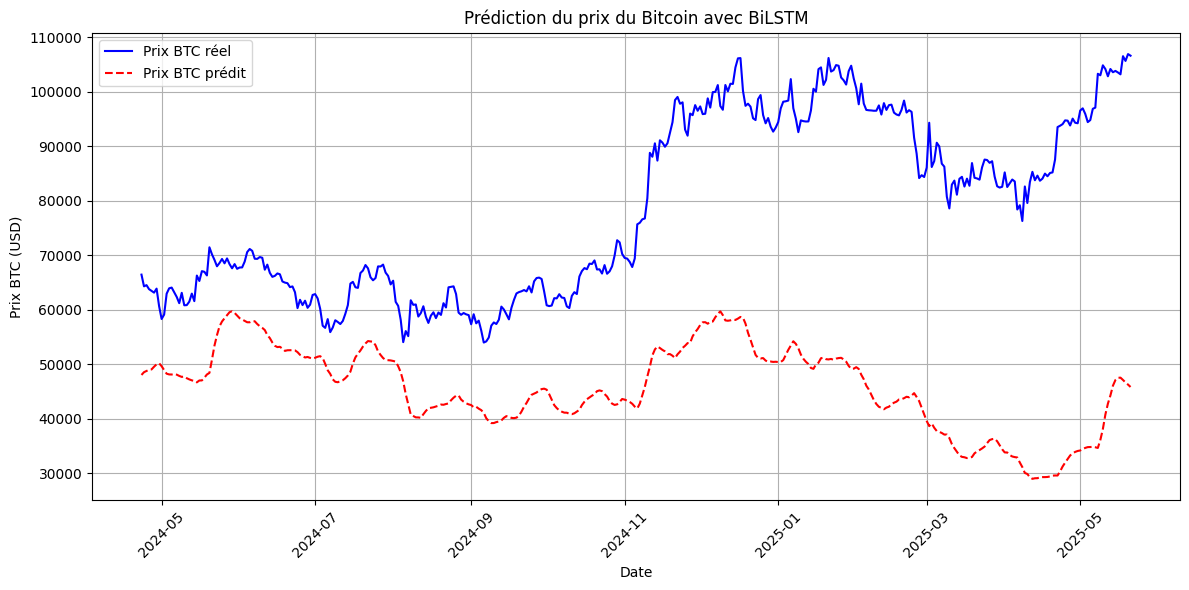

In [46]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# --- Récupération des données depuis CryptoCompare ---
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,
        'tsym': 'USD',
        'limit': 2000,
        'toTs': end_timestamp
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)
        df['time'] = pd.to_datetime(df['time'], unit='s')
        return df
    else:
        print(f"Erreur lors de la récupération des données pour {crypto_symbol}")
        return None

# --- Prétraitement ---
def preprocess_data(btc_df, eth_df):
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))
    df = df.sort_values('time')
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()
    df.dropna(inplace=True)
    return df

# --- Séquences ---
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        X.append(eth_prices[i:i+seq_length])
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# --- Modèle BiLSTM ---
def build_model(seq_length, features=1):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=(seq_length, features)),
        Dropout(0.2),
        Bidirectional(LSTM(64, return_sequences=False)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# --- Fonction principale ---
def main(bitcoin_data, ethereum_data):
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : données manquantes")
        return None

    data = preprocess_data(bitcoin_data, ethereum_data)
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = build_model(seq_length)

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    y_pred = model.predict(X_test)
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    test_dates = data['time'].iloc[-len(y_test):].values
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin avec BiLSTM')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return model, eth_scaler, btc_scaler

# --- Appel des fonctions ---
start_timestamp = int(time.mktime(datetime(2021, 3, 1).timetuple()))
end_timestamp = int(time.time())

btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

if btc_data is not None and eth_data is not None:
    model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Échec de récupération des données.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0641 - mae: 0.1723 - val_loss: 0.0053 - val_mae: 0.0678
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0202 - mae: 0.0988 - val_loss: 0.0057 - val_mae: 0.0707
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0187 - mae: 0.0925 - val_loss: 0.0065 - val_mae: 0.0749
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0166 - mae: 0.0875 - val_loss: 0.0142 - val_mae: 0.1105
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0169 - mae: 0.0896 - val_loss: 0.0103 - val_mae: 0.0932
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0130 - mae: 0.0761 - val_loss: 0.0127 - val_mae: 0.1038
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0163 - mae: 0.0868 - val_loss: 0.0048 - val_mae: 0.0622
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0143 - mae: 0.0778 - val_loss: 0.0032 - val_mae: 0.0474
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0142 -

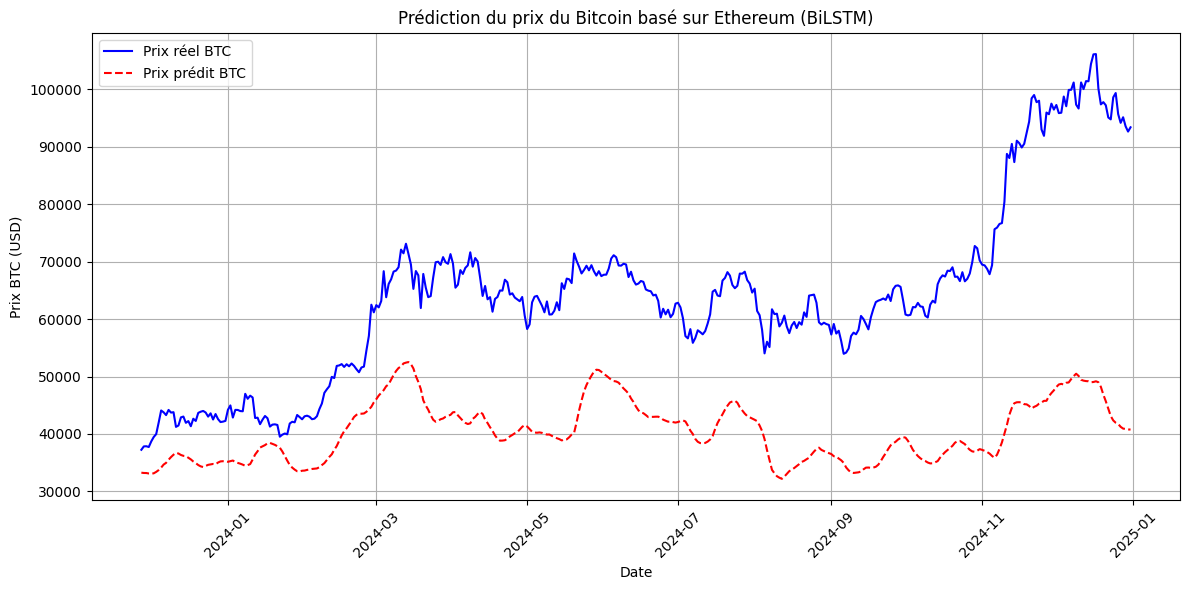

In [47]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fonction de collecte des données (exemple générique)
def collect_data_crypto_compare(symbol, start_timestamp, end_timestamp):
    url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={symbol}&tsym=USD&limit=2000&toTs={end_timestamp}"
    response = requests.get(url)
    data = response.json()
    if data['Response'] == 'Success':
        df = pd.DataFrame(data['Data']['Data'])
        df['time'] = pd.to_datetime(df['time'], unit='s')
        return df
    return None

# Prétraitement des données
def preprocess_data(btc_df, eth_df):
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))
    df = df.sort_values('time')
    df.dropna(inplace=True)
    return df

# Création des séquences
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        X.append(eth_prices[i:i+seq_length])
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Construction du modèle BiLSTM
def build_model(seq_length):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=(seq_length, 1)),
        Dropout(0.2),
        Bidirectional(LSTM(64)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Main
start_timestamp = int(datetime(2019, 1, 1).timestamp())
end_timestamp = int(datetime(2024, 12, 31).timestamp())
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

def main(btc_data, eth_data):
    if btc_data is None or eth_data is None:
        print("Erreur : données manquantes.")
        return

    data = preprocess_data(btc_data, eth_data)

    seq_length = 30

    # Séparer données en train/test AVANT le scaling
    train_size = int(len(data) * 0.8)
    train_data = data.iloc[:train_size]
    test_data = data.iloc[train_size - seq_length:]  # inclure une séquence complète avant test

    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    eth_train_scaled = eth_scaler.fit_transform(train_data[['close_eth']])
    btc_train_scaled = btc_scaler.fit_transform(train_data[['close_btc']])

    eth_test_scaled = eth_scaler.transform(test_data[['close_eth']])
    btc_test_scaled = btc_scaler.transform(test_data[['close_btc']])

    X_train, y_train = create_sequences(eth_train_scaled, btc_train_scaled, seq_length)
    X_test, y_test = create_sequences(eth_test_scaled, btc_test_scaled, seq_length)

    X_train = X_train.reshape((X_train.shape[0], seq_length, 1))
    X_test = X_test.reshape((X_test.shape[0], seq_length, 1))

    model = build_model(seq_length)
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_split=0.2, callbacks=[early_stop], verbose=1)

    y_pred = model.predict(X_test)

    y_test_inv = btc_scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = btc_scaler.inverse_transform(y_pred)

    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.4f}")

    # Affichage
    test_dates = test_data['time'].iloc[seq_length:].values
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, y_test_inv, label='Prix réel BTC', color='blue')
    plt.plot(test_dates, y_pred_inv, label='Prix prédit BTC', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin basé sur Ethereum (BiLSTM)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return model

if btc_data is not None and eth_data is not None:
    model = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0204 - mae: 0.0995 - val_loss: 0.0013 - val_mae: 0.0276
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0024 - mae: 0.0349 - val_loss: 0.0023 - val_mae: 0.0357
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - mae: 0.0250 - val_loss: 8.1073e-04 - val_mae: 0.0200
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - mae: 0.0247 - val_loss: 8.6889e-04 - val_mae: 0.0197
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - mae: 0.0231 - val_loss: 7.8463e-04 - val_mae: 0.0185
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - mae: 0.0247 - val_loss: 0.0033 - val_mae: 0.0465
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - mae: 0.0222 - val_loss: 9.7299e-04 - val_mae: 0.0276
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - mae: 0.0229 - val_loss: 7.3657e-04 - val_mae: 0.0180
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

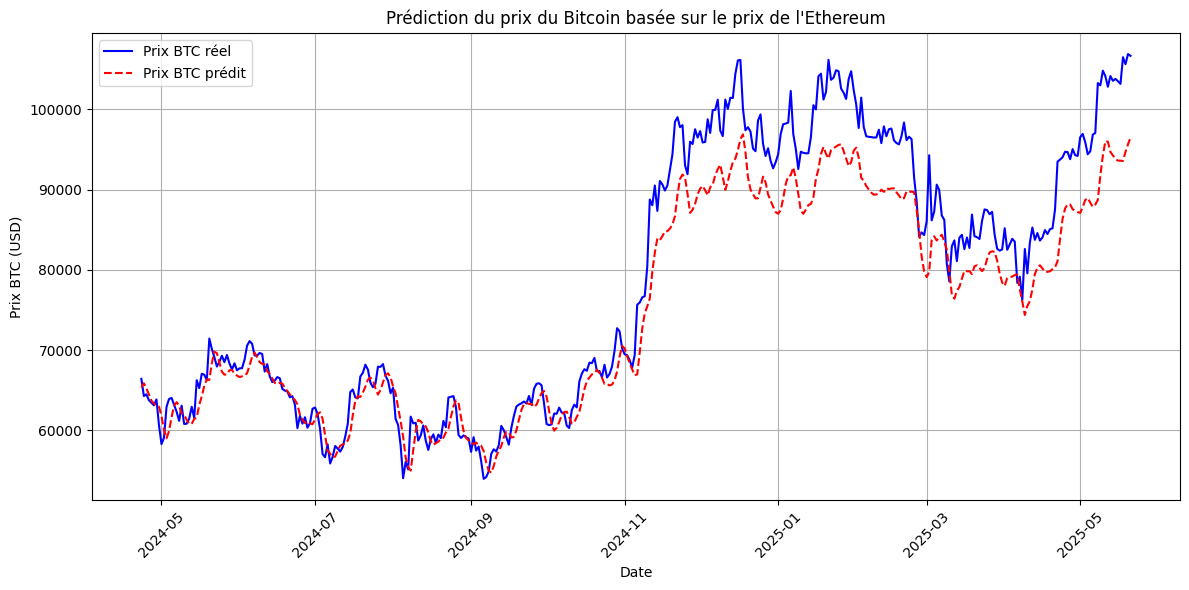

In [48]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fonction pour récupérer les données historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,  # Symbole de la cryptomonnaie (BTC ou ETH)
        'tsym': 'USD',  # Devise de comparaison
        'limit': 2000,  # Limite des jours à récupérer
        'toTs': end_timestamp,  # Timestamp de fin
        'extraParams': 'crypto_prediction'  # Paramètre optionnel pour l'identification de l'application
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)

        # Convertir les timestamps en dates lisibles
        df['time'] = pd.to_datetime(df['time'], unit='s')

        return df
    else:
        print(f"Erreur lors de la récupération des données: {response.status_code}")
        return None

# Fonction pour prétraiter les données
def preprocess_data(btc_df, eth_df):
    # Fusionner les données BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si nécessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les données par ordre chronologique
    df = df.sort_values('time')

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour créer des séquences pour l'entraînement LSTM
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les séquences de prix ETH et BTC comme features
        X.append(np.column_stack((eth_prices[i:i+seq_length], btc_prices[i:i+seq_length])))
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le modèle LSTM
def build_model(seq_length, features=2):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour LSTM (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 2))  # Chaque séquence a 2 caractéristiques (ETH et BTC)

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle
    model = build_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin basée sur le prix de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, eth_scaler, btc_scaler

# Récupérer les données historiques pour Bitcoin et Ethereum
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Exemple : début de l'année 2021

btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0299 - mae: 0.1123 - val_loss: 0.0041 - val_mae: 0.0451
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0027 - mae: 0.0354 - val_loss: 5.0780e-04 - val_mae: 0.0152
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - mae: 0.0268 - val_loss: 8.6046e-04 - val_mae: 0.0218
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - mae: 0.0240 - val_loss: 0.0016 - val_mae: 0.0325
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.6226e-04 - mae: 0.0221 - val_loss: 4.2098e-04 - val_mae: 0.0146
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6758e-04 - mae: 0.0192 - val_loss: 4.1264e-04 - val_mae: 0.0144
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.3603e-04 - mae: 0.0195 - val_loss: 2.8885e-04 - val_mae: 0.0112
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.9420e-04 - mae: 0.0186 - val_loss: 2.8373e-04 - val_mae: 0.0114
Epoch 9/100
40/40 ━━━━━━━━━━━━━━

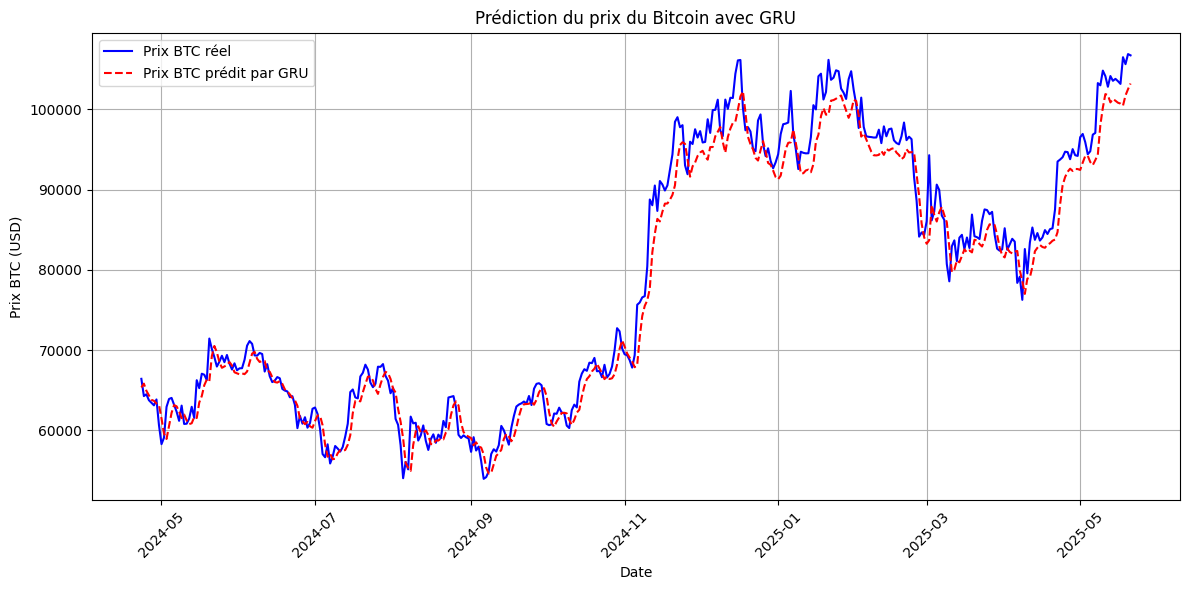

In [49]:
# Fonction pour créer des séquences pour l'entraînement GRU
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les séquences de prix ETH et BTC comme features
        X.append(np.column_stack((eth_prices[i:i+seq_length], btc_prices[i:i+seq_length])))
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le modèle GRU
def build_gru_model(seq_length, features=2):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        GRU(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour GRU (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 2))  # Chaque séquence a 2 caractéristiques (ETH et BTC)

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle GRU
    gru_model = build_gru_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    gru_history = gru_model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions avec le modèle GRU
    gru_pred = gru_model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    gru_pred_btc = btc_scaler.inverse_transform(gru_pred)

    # Évaluation du modèle GRU
    gru_mse = mean_squared_error(y_test_btc, gru_pred_btc)
    gru_rmse = np.sqrt(gru_mse)
    gru_r2 = r2_score(y_test_btc, gru_pred_btc)

    print(f"GRU - MSE: {gru_mse:.2f}")
    print(f"GRU - RMSE: {gru_rmse:.2f}")
    print(f"GRU - R²: {gru_r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, gru_pred_btc, label='Prix BTC prédit par GRU', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin avec GRU')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return gru_model, eth_scaler, btc_scaler

# Récupérer les données historiques pour Bitcoin et Ethereum
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Exemple : début de l'année 2021

btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    gru_model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.0437 - mae: 0.1494 - val_loss: 0.0089 - val_mae: 0.0806
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0078 - mae: 0.0646 - val_loss: 0.0124 - val_mae: 0.1034
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mae: 0.0547 - val_loss: 0.0053 - val_mae: 0.0646
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0040 - mae: 0.0447 - val_loss: 0.0057 - val_mae: 0.0662
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mae: 0.0386 - val_loss: 0.0037 - val_mae: 0.0470
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mae: 0.0408 - val_loss: 0.0054 - val_mae: 0.0636
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - mae: 0.0357 - val_loss: 0.0033 - val_mae: 0.0475
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mae: 0.0332 - val_loss: 0.0022 - val_mae: 0.0322
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019 - mae: 0

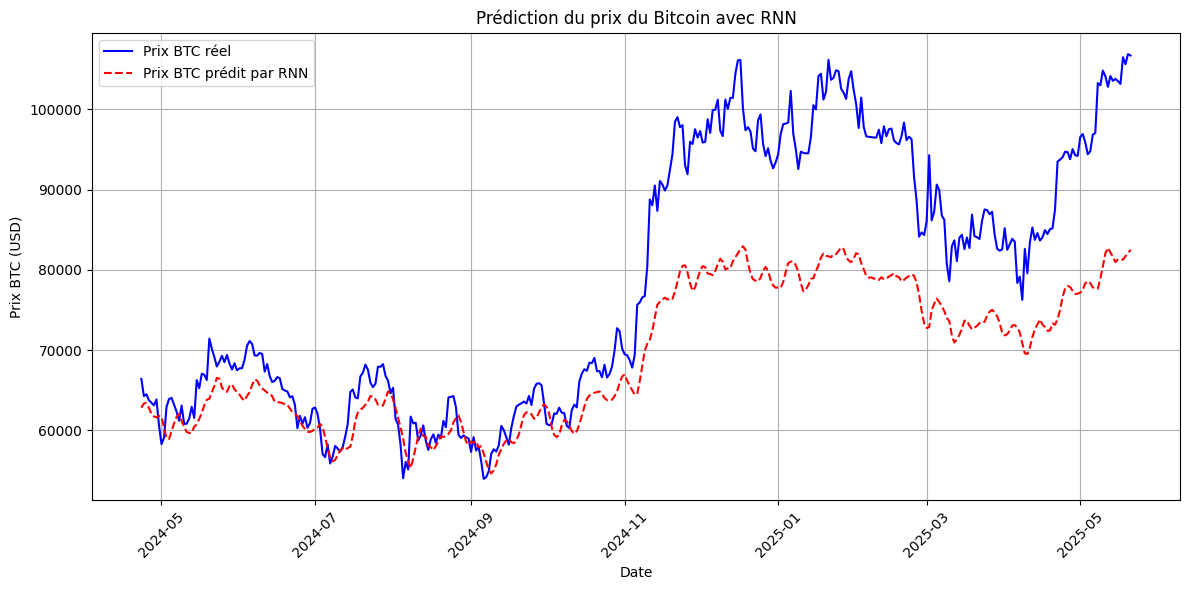

In [50]:
# Fonction pour créer des séquences pour l'entraînement RNN
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        # Utiliser les séquences de prix ETH et BTC comme features
        X.append(np.column_stack((eth_prices[i:i+seq_length], btc_prices[i:i+seq_length])))
        # Utiliser le prix BTC comme cible
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Fonction pour construire le modèle RNN
def build_rnn_model(seq_length, features=2):
    model = Sequential([
        SimpleRNN(64, return_sequences=True, input_shape=(seq_length, features)),
        Dropout(0.2),
        SimpleRNN(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None  # Retourner None si les données sont invalides

    # Prétraitement des données
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Création des scalers pour BTC et ETH séparément pour une meilleure mise à l'échelle
    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Mise à l'échelle des prix
    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    # Reshape pour RNN (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 2))  # Chaque séquence a 2 caractéristiques (ETH et BTC)

    # Division train/test (en respectant la chronologie)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Construction et entraînement du modèle RNN
    rnn_model = build_rnn_model(seq_length)

    # Utilisation d'early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    rnn_history = rnn_model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Prédictions avec le modèle RNN
    rnn_pred = rnn_model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    rnn_pred_btc = btc_scaler.inverse_transform(rnn_pred)

    # Évaluation du modèle RNN
    rnn_mse = mean_squared_error(y_test_btc, rnn_pred_btc)
    rnn_rmse = np.sqrt(rnn_mse)
    rnn_r2 = r2_score(y_test_btc, rnn_pred_btc)

    print(f"RNN - MSE: {rnn_mse:.2f}")
    print(f"RNN - RMSE: {rnn_rmse:.2f}")
    print(f"RNN - R²: {rnn_r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, rnn_pred_btc, label='Prix BTC prédit par RNN', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin avec RNN')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return rnn_model, eth_scaler, btc_scaler

# Récupérer les données historiques pour Bitcoin et Ethereum
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800  # Exemple : début de l'année 2021

btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    rnn_model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mae: 0.0958 - val_loss: 0.0016 - val_mae: 0.0291
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0016 - mae: 0.0277 - val_loss: 0.0017 - val_mae: 0.0295
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012 - mae: 0.0229 - val_loss: 0.0013 - val_mae: 0.0246
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011 - mae: 0.0230 - val_loss: 5.7641e-04 - val_mae: 0.0191
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 9.0677e-04 - mae: 0.0202 - val_loss: 7.5182e-04 - val_mae: 0.0183
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.7708e-04 - mae: 0.0218 - val_loss: 5.9289e-04 - val_mae: 0.0201
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012 - mae: 0.0245 - val_loss: 5.5382e-04 - val_mae: 0.0203
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.3180e-04 - mae: 0.0190 - val_loss: 4.0774e-04 - val_mae: 0.0136
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━

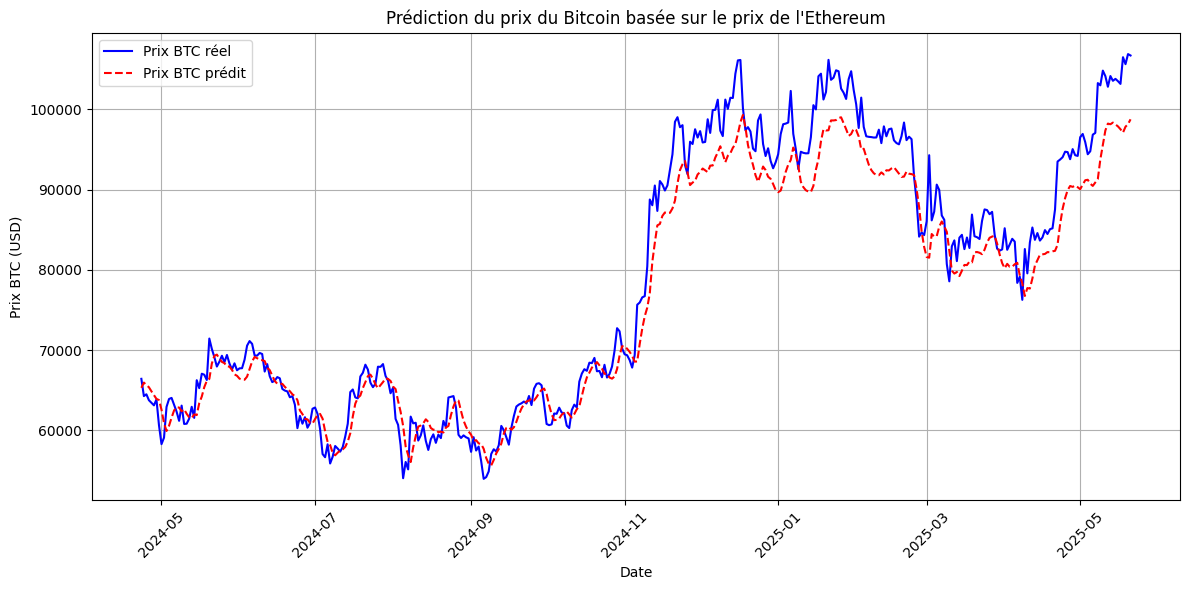

In [51]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Fonction pour récupérer les données historiques de CryptoCompare
def collect_data_crypto_compare(crypto_symbol, start_timestamp, end_timestamp):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': crypto_symbol,
        'tsym': 'USD',
        'limit': 2000,
        'toTs': end_timestamp,
        'extraParams': 'crypto_prediction'
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()['Data']['Data']
        df = pd.DataFrame(data)
        df['time'] = pd.to_datetime(df['time'], unit='s')
        return df
    else:
        print(f"Erreur lors de la récupération des données: {response.status_code}")
        return None

# Fonction de prétraitement
def preprocess_data(btc_df, eth_df):
    df = pd.merge(btc_df[['time', 'close']], eth_df[['time', 'close']], on='time', suffixes=('_btc', '_eth'))
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time')
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()
    df.dropna(inplace=True)
    return df

# Fonction pour créer des séquences
def create_sequences(eth_prices, btc_prices, seq_length=30):
    X, y = [], []
    for i in range(len(eth_prices) - seq_length):
        X.append(np.column_stack((eth_prices[i:i+seq_length], btc_prices[i:i+seq_length])))
        y.append(btc_prices[i+seq_length])
    return np.array(X), np.array(y)

# Modèle BiLSTM
def build_model(seq_length, features=2):
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=(seq_length, features)),
        Dropout(0.2),
        Bidirectional(LSTM(64, return_sequences=False)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None

    data = preprocess_data(bitcoin_data, ethereum_data)

    eth_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    eth_scaled = eth_scaler.fit_transform(data[['close_eth']])
    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])

    seq_length = 30
    X, y = create_sequences(eth_scaled, btc_scaled, seq_length)

    X = X.reshape((X.shape[0], X.shape[1], 2))

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = build_model(seq_length)

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    y_pred = model.predict(X_test)

    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    plt.figure(figsize=(12, 6))
    test_dates = data['time'].iloc[-len(y_test):].values
    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title("Prédiction du prix du Bitcoin basée sur le prix de l'Ethereum")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return model, eth_scaler, btc_scaler

# Exécution
today = datetime.today()
end_timestamp = int(time.mktime(today.timetuple()))
start_timestamp = 1614556800
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

if btc_data is not None and eth_data is not None:
    model, eth_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1333 - mae: 0.1182 - val_loss: 0.1139 - val_mae: 0.1781 - learning_rate: 0.0010
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0761 - mae: 0.0646 - val_loss: 0.0878 - val_mae: 0.1854 - learning_rate: 0.0010
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0504 - mae: 0.0583 - val_loss: 0.0963 - val_mae: 0.2402 - learning_rate: 0.0010
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0365 - mae: 0.0536 - val_loss: 0.0584 - val_mae: 0.1694 - learning_rate: 0.0010
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0296 - mae: 0.0509 - val_loss: 0.0800 - val_mae: 0.2309 - learning_rate: 0.0010
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0256 - mae: 0.0504 - val_loss: 0.0575 - val_mae: 0.1855 - learning_rate: 0.0010
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0223 - mae: 0.0460 - val_loss: 0.0638 - val_mae: 0.2068 - learning_rate: 0.0010
Epoch 8/150
43/43 

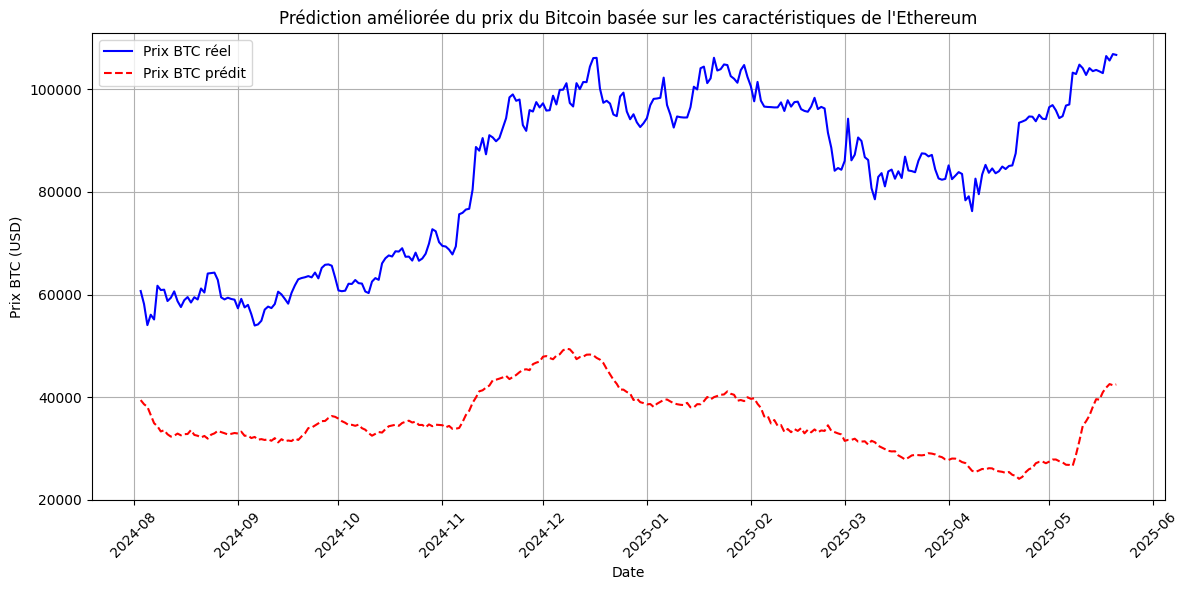

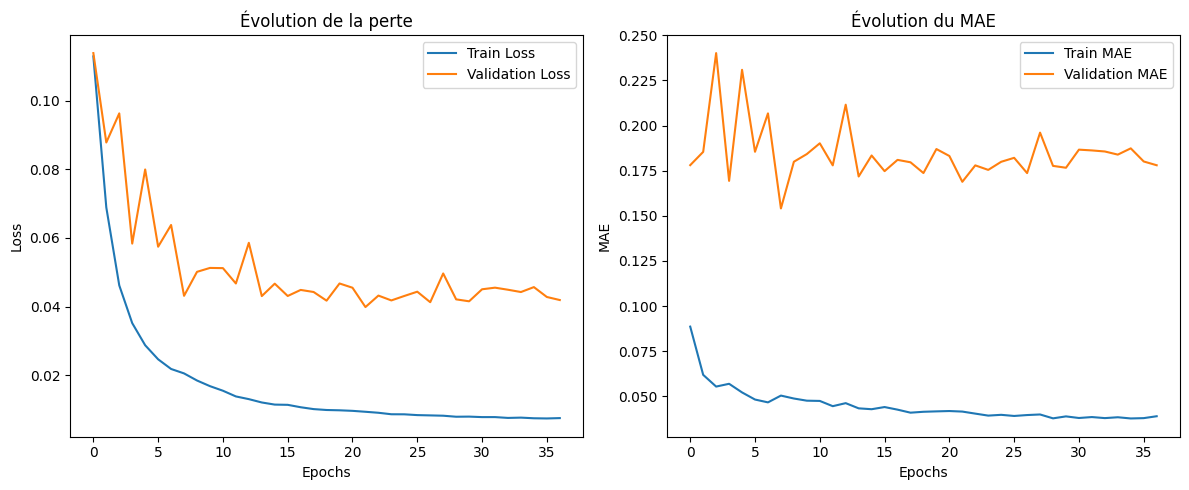

In [52]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2


# Récupérer les données historiques de Bitcoin et Ethereum
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Fonction pour prétraiter les données avec des features supplémentaires
def preprocess_data(btc_df, eth_df):
    # Fusionner les données BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                 eth_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                 on='time',
                 suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si nécessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les données par ordre chronologique
    df = df.sort_values('time')

    # Calcul des features techniques pour Ethereum
    # Moyennes mobiles
    df['eth_ma7'] = df['close_eth'].rolling(window=7).mean()
    df['eth_ma14'] = df['close_eth'].rolling(window=14).mean()
    df['eth_ma30'] = df['close_eth'].rolling(window=30).mean()

    # Volatilité (écart-type sur une fenêtre)
    df['eth_volatility7'] = df['close_eth'].rolling(window=7).std()

    # Range journalier (high-low)
    df['eth_daily_range'] = df['high_eth'] - df['low_eth']

    # Ratio volume/price
    df['eth_volume_price_ratio'] = df['volumeto_eth'] / df['close_eth']

    # Rate of change (variation relative)
    df['eth_roc5'] = df['close_eth'].pct_change(periods=5)
    df['eth_roc10'] = df['close_eth'].pct_change(periods=10)

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Momentum (prix actuel / prix n jours avant)
    df['eth_momentum5'] = df['close_eth'] / df['close_eth'].shift(5)
    df['eth_momentum10'] = df['close_eth'] / df['close_eth'].shift(10)

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour créer des séquences pour l'entraînement avec features multiples
def create_sequences(df, seq_length=30):
    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]

    # Cibles
    target = 'close_btc'

    X, y = [], []
    for i in range(len(df) - seq_length):
        # Extraire toutes les features d'Ethereum
        feature_sequence = df[features_list].iloc[i:i+seq_length].values
        X.append(feature_sequence)
        # Utiliser le prix BTC comme cible
        y.append(df[target].iloc[i+seq_length])

    return np.array(X), np.array(y).reshape(-1, 1)

# Fonction pour construire un modèle CNN-LSTM hybride
def build_hybrid_model(seq_length, features=12):
    model = Sequential([
        # Couche CNN pour extraire des patterns locaux
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(seq_length, features)),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        # Couche CNN secondaire
        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        # LSTM bidirectionnel pour capturer des dépendances à long terme
        Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))),
        Dropout(0.3),

        # LSTM final
        LSTM(64, return_sequences=False, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dropout(0.3),

        # Couches denses finales
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None

    # Prétraitement des données avec features étendues
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Scaler pour toutes les features et la cible
    feature_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Liste des colonnes de features à utiliser
    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]

    # Mise à l'échelle
    scaled_features = feature_scaler.fit_transform(data[features_list])
    data[features_list] = scaled_features

    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])
    data['close_btc'] = btc_scaled

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(data, seq_length)

    # Division train/test/validation (en respectant la chronologie)
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)

    X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

    # Construction du modèle hybride
    model = build_hybrid_model(seq_length, features=len(features_list))

    # Callbacks avancés
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001,
        verbose=1
    )

    # Entraînement avec validation séparée
    history = model.fit(
        X_train, y_train,
        epochs=150,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Évaluation sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction améliorée du prix du Bitcoin basée sur les caractéristiques de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Visualisation de l'historique d'entraînement
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Évolution de la perte')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Évolution du MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, feature_scaler, btc_scaler

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    model, feature_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1167 - mae: 0.1128 - val_loss: 0.1180 - val_mae: 0.2143 - learning_rate: 0.0010
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0661 - mae: 0.0590 - val_loss: 0.0918 - val_mae: 0.2077 - learning_rate: 0.0010
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0457 - mae: 0.0559 - val_loss: 0.1054 - val_mae: 0.2595 - learning_rate: 0.0010
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0353 - mae: 0.0554 - val_loss: 0.0809 - val_mae: 0.2242 - learning_rate: 0.0010
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0295 - mae: 0.0512 - val_loss: 0.0894 - val_mae: 0.2445 - learning_rate: 0.0010
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0265 - mae: 0.0495 - val_loss: 0.0690 - val_mae: 0.2082 - learning_rate: 0.0010
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0240 - mae: 0.0474 - val_loss: 0.0707 - val_mae: 0.2159 - learning_rate: 0.0010
Epoch 8/150
43/43 

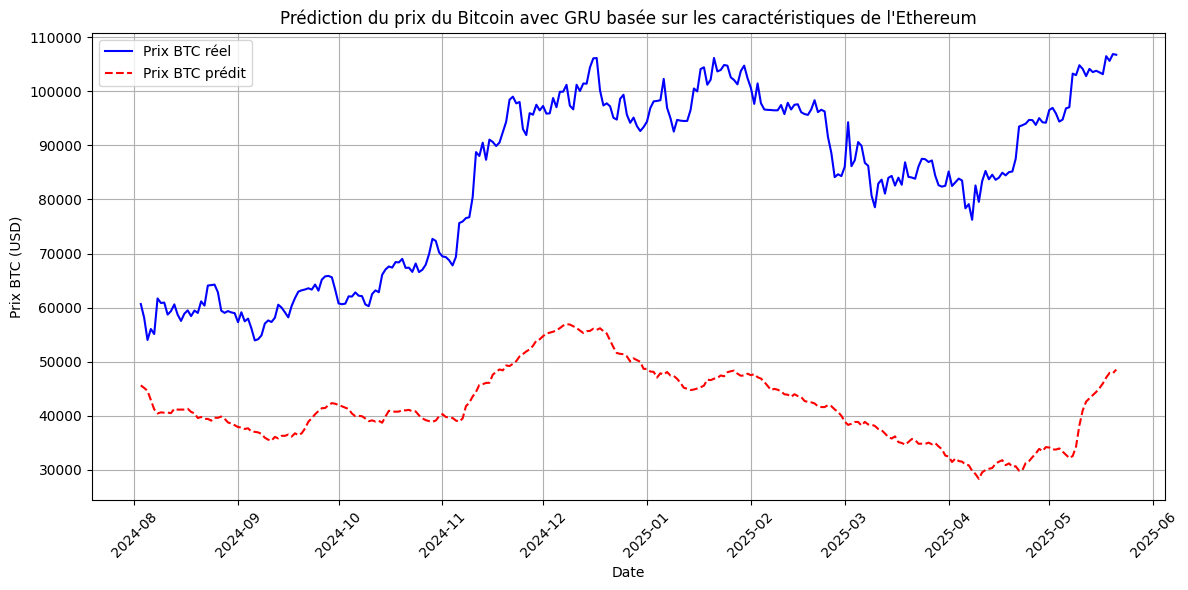

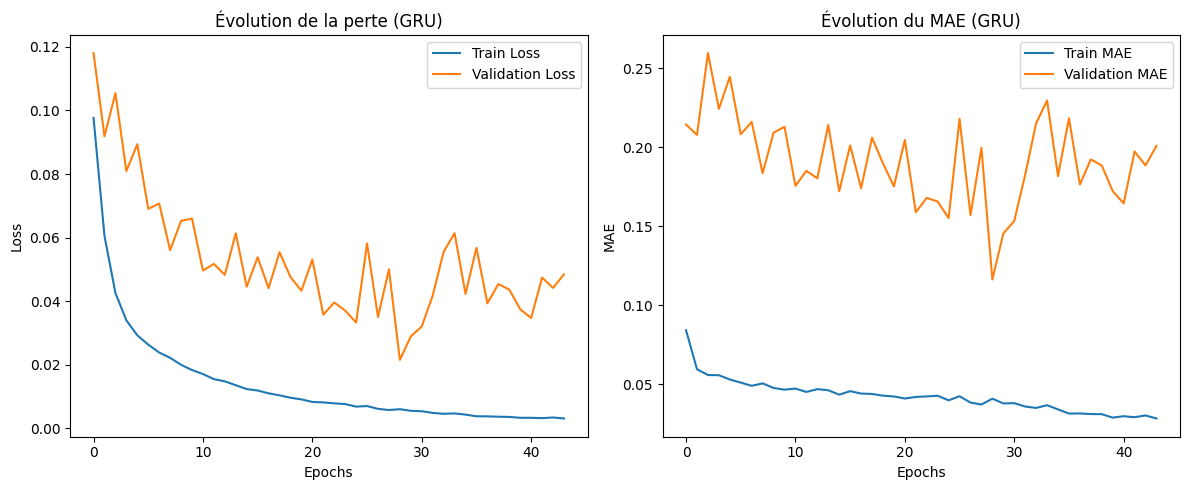

In [53]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2


# Récupérer les données historiques de Bitcoin et Ethereum
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Fonction pour prétraiter les données avec des features supplémentaires
def preprocess_data(btc_df, eth_df):
    # Fusionner les données BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                 eth_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                 on='time',
                 suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si nécessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les données par ordre chronologique
    df = df.sort_values('time')

    # Calcul des features techniques pour Ethereum
    # Moyennes mobiles
    df['eth_ma7'] = df['close_eth'].rolling(window=7).mean()
    df['eth_ma14'] = df['close_eth'].rolling(window=14).mean()
    df['eth_ma30'] = df['close_eth'].rolling(window=30).mean()

    # Volatilité (écart-type sur une fenêtre)
    df['eth_volatility7'] = df['close_eth'].rolling(window=7).std()

    # Range journalier (high-low)
    df['eth_daily_range'] = df['high_eth'] - df['low_eth']

    # Ratio volume/price
    df['eth_volume_price_ratio'] = df['volumeto_eth'] / df['close_eth']

    # Rate of change (variation relative)
    df['eth_roc5'] = df['close_eth'].pct_change(periods=5)
    df['eth_roc10'] = df['close_eth'].pct_change(periods=10)

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Momentum (prix actuel / prix n jours avant)
    df['eth_momentum5'] = df['close_eth'] / df['close_eth'].shift(5)
    df['eth_momentum10'] = df['close_eth'] / df['close_eth'].shift(10)

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour créer des séquences pour l'entraînement avec features multiples
def create_sequences(df, seq_length=30):
    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]

    # Cibles
    target = 'close_btc'

    X, y = [], []
    for i in range(len(df) - seq_length):
        # Extraire toutes les features d'Ethereum
        feature_sequence = df[features_list].iloc[i:i+seq_length].values
        X.append(feature_sequence)
        # Utiliser le prix BTC comme cible
        y.append(df[target].iloc[i+seq_length])

    return np.array(X), np.array(y).reshape(-1, 1)

# Fonction pour construire un modèle CNN-GRU hybride
def build_hybrid_model(seq_length, features=12):
    model = Sequential([
        # Couche CNN pour extraire des patterns locaux
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(seq_length, features)),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        # Couche CNN secondaire
        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        # GRU bidirectionnel pour capturer des dépendances à long terme
        Bidirectional(GRU(64, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))),
        Dropout(0.3),

        # GRU final
        GRU(64, return_sequences=False, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dropout(0.3),

        # Couches denses finales
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None

    # Prétraitement des données avec features étendues
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Scaler pour toutes les features et la cible
    feature_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Liste des colonnes de features à utiliser
    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]

    # Mise à l'échelle
    scaled_features = feature_scaler.fit_transform(data[features_list])
    data[features_list] = scaled_features

    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])
    data['close_btc'] = btc_scaled

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(data, seq_length)

    # Division train/test/validation (en respectant la chronologie)
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)

    X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

    # Construction du modèle hybride
    model = build_hybrid_model(seq_length, features=len(features_list))

    # Callbacks avancés
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001,
        verbose=1
    )

    # Entraînement avec validation séparée
    history = model.fit(
        X_train, y_train,
        epochs=150,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Évaluation sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin avec GRU basée sur les caractéristiques de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Visualisation de l'historique d'entraînement
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Évolution de la perte (GRU)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Évolution du MAE (GRU)')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, feature_scaler, btc_scaler

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    model, feature_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - loss: 0.1808 - mae: 0.2125 - val_loss: 0.1555 - val_mae: 0.2188 - learning_rate: 0.0010
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1147 - mae: 0.0962 - val_loss: 0.1321 - val_mae: 0.1669 - learning_rate: 0.0010
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1068 - mae: 0.0833 - val_loss: 0.1257 - val_mae: 0.1610 - learning_rate: 0.0010
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1017 - mae: 0.0753 - val_loss: 0.1314 - val_mae: 0.1965 - learning_rate: 0.0010
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0964 - mae: 0.0682 - val_loss: 0.1246 - val_mae: 0.1849 - learning_rate: 0.0010
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0918 - mae: 0.0639 - val_loss: 0.1257 - val_mae: 0.1946 - learning_rate: 0.0010
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0882 - mae: 0.0628 - val_loss: 0.1197 - val_mae: 0.1910 - learning_rate: 0.0010
Epoch 8/100
43/43 ━━━━

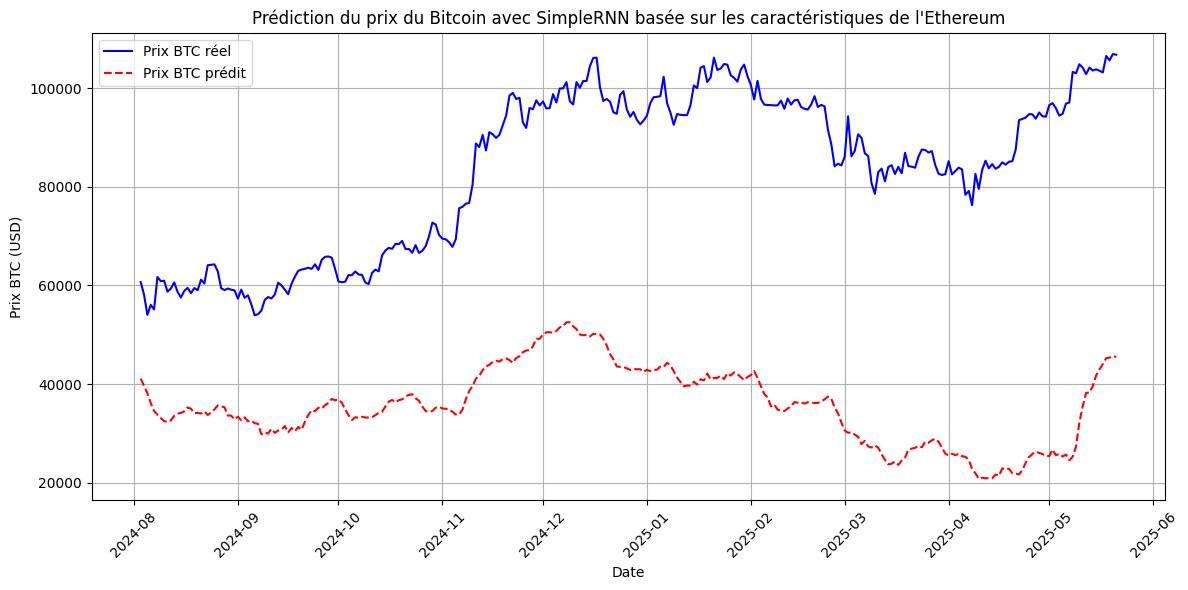

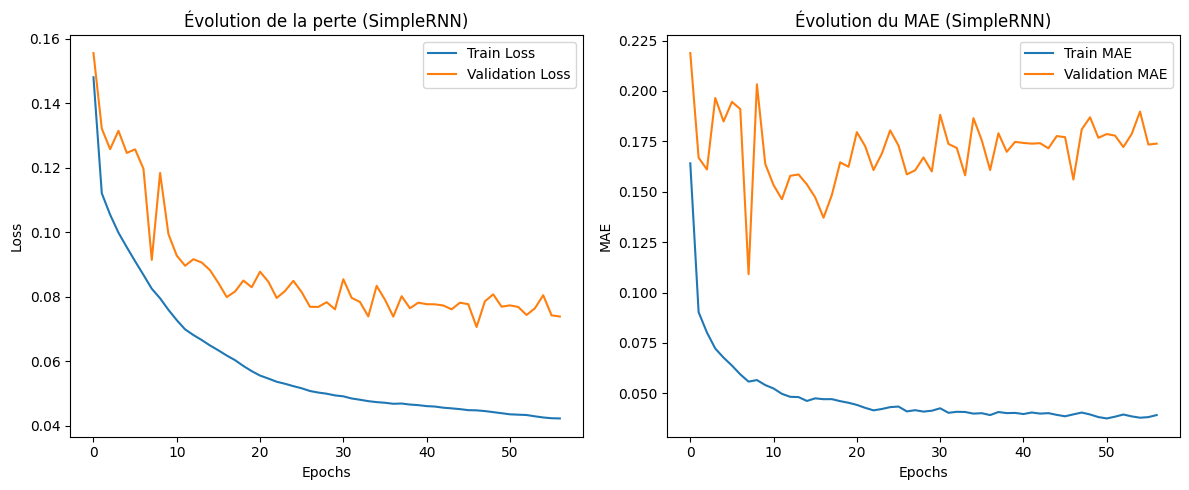

In [54]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, Bidirectional, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2


# Récupérer les données historiques de Bitcoin et Ethereum
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Fonction pour prétraiter les données avec des features supplémentaires
def preprocess_data(btc_df, eth_df):
    # Fusionner les données BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                 eth_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                 on='time',
                 suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si nécessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les données par ordre chronologique
    df = df.sort_values('time')

    # Calcul des features techniques pour Ethereum
    # Moyennes mobiles
    df['eth_ma7'] = df['close_eth'].rolling(window=7).mean()
    df['eth_ma14'] = df['close_eth'].rolling(window=14).mean()
    df['eth_ma30'] = df['close_eth'].rolling(window=30).mean()

    # Volatilité (écart-type sur une fenêtre)
    df['eth_volatility7'] = df['close_eth'].rolling(window=7).std()

    # Range journalier (high-low)
    df['eth_daily_range'] = df['high_eth'] - df['low_eth']

    # Ratio volume/price
    df['eth_volume_price_ratio'] = df['volumeto_eth'] / df['close_eth']

    # Rate of change (variation relative)
    df['eth_roc5'] = df['close_eth'].pct_change(periods=5)
    df['eth_roc10'] = df['close_eth'].pct_change(periods=10)

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Momentum (prix actuel / prix n jours avant)
    df['eth_momentum5'] = df['close_eth'] / df['close_eth'].shift(5)
    df['eth_momentum10'] = df['close_eth'] / df['close_eth'].shift(10)

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour créer des séquences pour l'entraînement avec features multiples
def create_sequences(df, seq_length=30):
    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]

    # Cibles
    target = 'close_btc'

    X, y = [], []
    for i in range(len(df) - seq_length):
        # Extraire toutes les features d'Ethereum
        feature_sequence = df[features_list].iloc[i:i+seq_length].values
        X.append(feature_sequence)
        # Utiliser le prix BTC comme cible
        y.append(df[target].iloc[i+seq_length])

    return np.array(X), np.array(y).reshape(-1, 1)

# Fonction pour construire un modèle CNN-SimpleRNN hybride
def build_simple_rnn_model(seq_length, features=12):
    model = Sequential([
        # Couche CNN pour extraire des patterns locaux
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(seq_length, features)),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        # Couche CNN secondaire
        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        # SimpleRNN bidirectionnel
        Bidirectional(SimpleRNN(128, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))),
        Dropout(0.3),

        # SimpleRNN final avec plus de neurones pour compenser la simplicité
        SimpleRNN(128, return_sequences=False, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dropout(0.3),

        # Couches denses plus larges pour compenser la simplicité du SimpleRNN
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None

    # Prétraitement des données avec features étendues
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Scaler pour toutes les features et la cible
    feature_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Liste des colonnes de features à utiliser
    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]

    # Mise à l'échelle
    scaled_features = feature_scaler.fit_transform(data[features_list])
    data[features_list] = scaled_features

    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])
    data['close_btc'] = btc_scaled

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(data, seq_length)

    # Division train/test/validation (en respectant la chronologie)
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)

    X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

    # Construction du modèle SimpleRNN
    model = build_simple_rnn_model(seq_length, features=len(features_list))

    # Callbacks adaptés - patience réduite pour SimpleRNN
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,  # SimpleRNN converge souvent plus rapidement mais avec moins de précision
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,  # Réduisons la patience pour adaptation plus rapide
        min_lr=0.00005,
        verbose=1
    )

    # Entraînement avec validation séparée
    history = model.fit(
        X_train, y_train,
        epochs=100,  # SimpleRNN converge généralement plus rapidement
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Évaluation sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction du prix du Bitcoin avec SimpleRNN basée sur les caractéristiques de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Visualisation de l'historique d'entraînement
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Évolution de la perte (SimpleRNN)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Évolution du MAE (SimpleRNN)')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, feature_scaler, btc_scaler

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    model, feature_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1447 - mae: 0.1406 - val_loss: 0.1015 - val_mae: 0.1517 - learning_rate: 0.0010
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0729 - mae: 0.0617 - val_loss: 0.0819 - val_mae: 0.1771 - learning_rate: 0.0010
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0466 - mae: 0.0539 - val_loss: 0.0659 - val_mae: 0.1709 - learning_rate: 0.0010
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0345 - mae: 0.0561 - val_loss: 0.0550 - val_mae: 0.1610 - learning_rate: 0.0010
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0281 - mae: 0.0517 - val_loss: 0.0644 - val_mae: 0.1968 - learning_rate: 0.0010
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0243 - mae: 0.0486 - val_loss: 0.0574 - val_mae: 0.1853 - learning_rate: 0.0010
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0221 - mae: 0.0507 - val_loss: 0.0598 - val_mae: 0.1953 - learning_rate: 0.0010
Epoch 8/150
43/43 

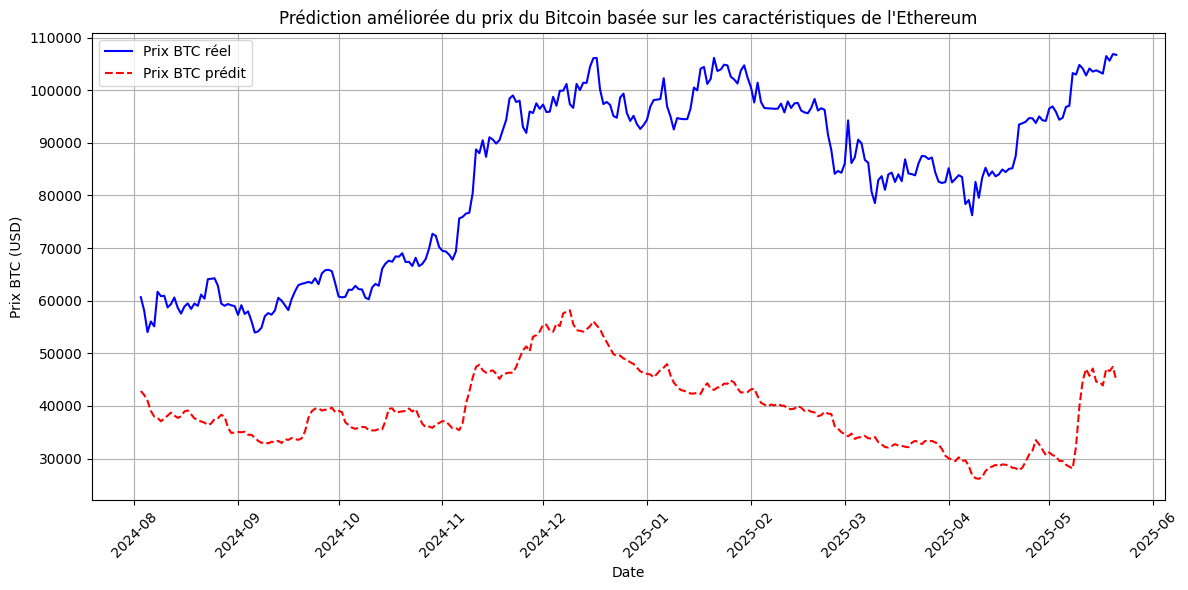

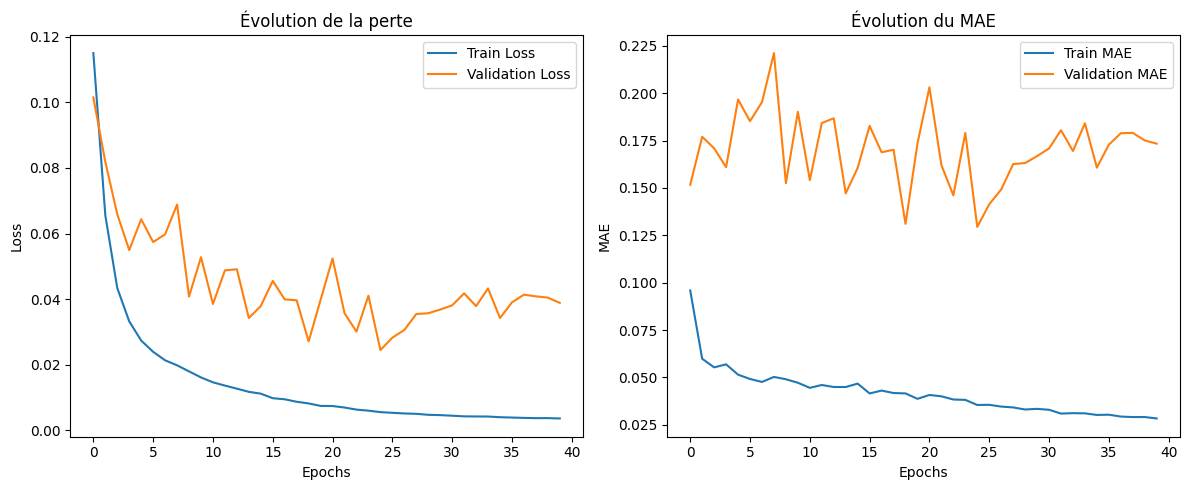

In [55]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2


# Récupérer les données historiques de Bitcoin et Ethereum
btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

# Fonction pour prétraiter les données avec des features supplémentaires
def preprocess_data(btc_df, eth_df):
    # Fusionner les données BTC et ETH sur la colonne 'time'
    df = pd.merge(btc_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                 eth_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                 on='time',
                 suffixes=('_btc', '_eth'))

    # Conversion de la colonne time au format datetime si nécessaire
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])

    # Trier les données par ordre chronologique
    df = df.sort_values('time')

    # Calcul des features techniques pour Ethereum
    # Moyennes mobiles
    df['eth_ma7'] = df['close_eth'].rolling(window=7).mean()
    df['eth_ma14'] = df['close_eth'].rolling(window=14).mean()
    df['eth_ma30'] = df['close_eth'].rolling(window=30).mean()

    # Volatilité (écart-type sur une fenêtre)
    df['eth_volatility7'] = df['close_eth'].rolling(window=7).std()

    # Range journalier (high-low)
    df['eth_daily_range'] = df['high_eth'] - df['low_eth']

    # Ratio volume/price
    df['eth_volume_price_ratio'] = df['volumeto_eth'] / df['close_eth']

    # Rate of change (variation relative)
    df['eth_roc5'] = df['close_eth'].pct_change(periods=5)
    df['eth_roc10'] = df['close_eth'].pct_change(periods=10)

    # Calculer les retours journaliers pour BTC et ETH
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()

    # Momentum (prix actuel / prix n jours avant)
    df['eth_momentum5'] = df['close_eth'] / df['close_eth'].shift(5)
    df['eth_momentum10'] = df['close_eth'] / df['close_eth'].shift(10)

    # Supprimer les lignes avec des valeurs NaN
    df.dropna(inplace=True)

    return df

# Fonction pour créer des séquences pour l'entraînement avec features multiples
def create_sequences(df, seq_length=30):
    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]

    # Cibles
    target = 'close_btc'

    X, y = [], []
    for i in range(len(df) - seq_length):
        # Extraire toutes les features d'Ethereum
        feature_sequence = df[features_list].iloc[i:i+seq_length].values
        X.append(feature_sequence)
        # Utiliser le prix BTC comme cible
        y.append(df[target].iloc[i+seq_length])

    return np.array(X), np.array(y).reshape(-1, 1)

# Fonction pour construire un modèle CNN-LSTM hybride
def build_hybrid_model(seq_length, features=12):
    model = Sequential([
        # Couche CNN pour extraire des patterns locaux
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(seq_length, features)),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        # Couche CNN secondaire
        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),

        # LSTM bidirectionnel pour capturer des dépendances à long terme
        Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))),
        Dropout(0.3),

        # LSTM final
        LSTM(64, return_sequences=False, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dropout(0.3),

        # Couches denses finales
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def main(bitcoin_data, ethereum_data):
    # Vérifier si les données sont valides
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur : Les données n'ont pas pu être récupérées correctement.")
        return None

    # Prétraitement des données avec features étendues
    data = preprocess_data(bitcoin_data, ethereum_data)

    # Scaler pour toutes les features et la cible
    feature_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    # Liste des colonnes de features à utiliser
    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]

    # Mise à l'échelle
    scaled_features = feature_scaler.fit_transform(data[features_list])
    data[features_list] = scaled_features

    btc_scaled = btc_scaler.fit_transform(data[['close_btc']])
    data['close_btc'] = btc_scaled

    # Création des séquences
    seq_length = 30
    X, y = create_sequences(data, seq_length)

    # Division train/test/validation (en respectant la chronologie)
    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)

    X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

    # Construction du modèle hybride
    model = build_hybrid_model(seq_length, features=len(features_list))

    # Callbacks avancés
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001,
        verbose=1
    )

    # Entraînement avec validation séparée
    history = model.fit(
        X_train, y_train,
        epochs=150,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Évaluation sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Inversions pour obtenir les prix réels
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    # Évaluation du modèle
    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    # Visualisation des prédictions
    plt.figure(figsize=(12, 6))

    # Récupérer les dates correspondantes aux données de test
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.plot(test_dates, y_test_btc, label='Prix BTC réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prix BTC prédit', color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Prix BTC (USD)')
    plt.title('Prédiction améliorée du prix du Bitcoin basée sur les caractéristiques de l\'Ethereum')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Visualisation de l'historique d'entraînement
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Évolution de la perte')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Évolution du MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Retourner le modèle et les scalers
    return model, feature_scaler, btc_scaler

# Appeler la fonction principale avec les données récupérées
if btc_data is not None and eth_data is not None:
    model, feature_scaler, btc_scaler = main(btc_data, eth_data)
else:
    print("Les données n'ont pas pu être récupérées.")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 409ms/step - loss: 0.2596 - mae: 0.3106 - val_loss: 0.2759 - val_mae: 0.4087 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1296 - mae: 0.1284 - val_loss: 0.3150 - val_mae: 0.4537 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1225 - mae: 0.1127 - val_loss: 0.3627 - val_mae: 0.5050 - learning_rate: 0.0010
Epoch 4/100
 9/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1166 - mae: 0.0958  
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1160 - mae: 0.0935 - val_loss: 0.2962 - val_mae: 0.4352 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1129 - mae: 0.0856 - val_loss: 0.3053 - val_mae: 0.4456 - learning_rate: 5.0000e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1115 - mae: 0.0842 - val_loss: 0.3043 - val_mae: 0.4451 - learning_rate: 5.0000e-04
Epoc

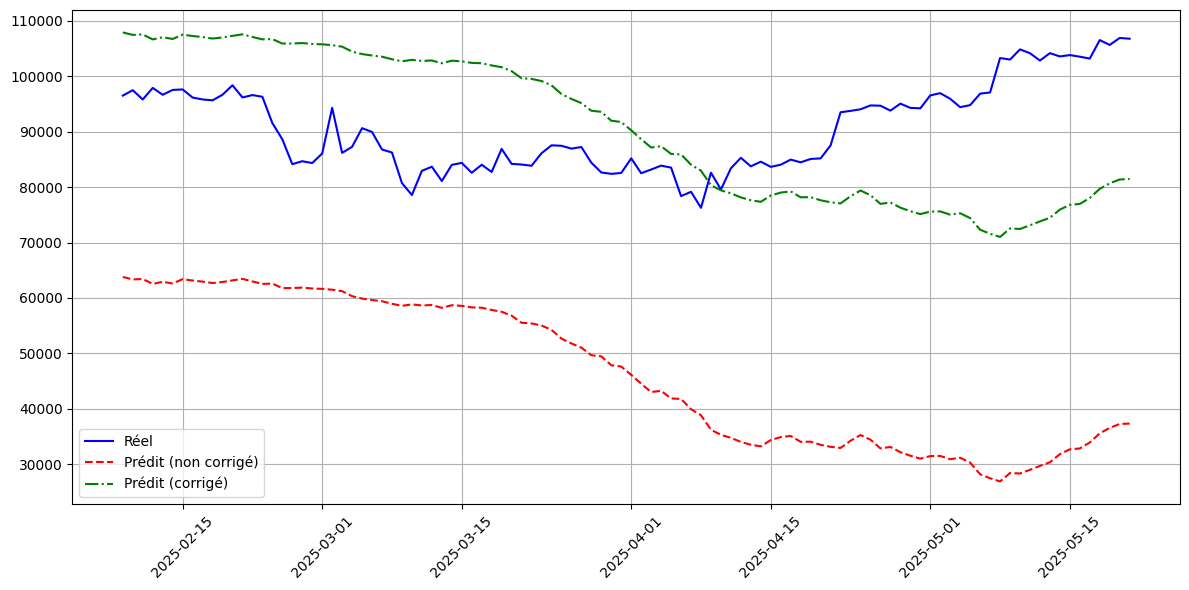

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

In [56]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2

# =========================
# Récupération des données
# =========================

def collect_data_crypto_compare(symbol, start_timestamp, end_timestamp):
    url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    days = (end_timestamp - start_timestamp) // (24 * 3600) + 1
    limit = min(2000, days)

    params = {
        'fsym': symbol,
        'tsym': 'USD',
        'limit': limit,
        'toTs': end_timestamp
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data['Response'] == 'Success':
            df = pd.DataFrame(data['Data']['Data'])
            df['time'] = pd.to_datetime(df['time'], unit='s')
            return df
        else:
            print(f"Erreur API: {data['Message']}")
            return None
    else:
        print(f"Erreur HTTP: {response.status_code}")
        return None

# =========================================
# Prétraitement des données + features ETH
# =========================================

def preprocess_data(btc_df, eth_df):
    df = pd.merge(btc_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                  eth_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                  on='time',
                  suffixes=('_btc', '_eth'))
    df = df.sort_values('time')

    df['eth_ma7'] = df['close_eth'].rolling(window=7).mean()
    df['eth_ma14'] = df['close_eth'].rolling(window=14).mean()
    df['eth_ma30'] = df['close_eth'].rolling(window=30).mean()
    df['eth_volatility7'] = df['close_eth'].rolling(window=7).std()
    df['eth_daily_range'] = df['high_eth'] - df['low_eth']
    df['eth_volume_price_ratio'] = df['volumeto_eth'] / df['close_eth']
    df['eth_roc5'] = df['close_eth'].pct_change(periods=5)
    df['eth_roc10'] = df['close_eth'].pct_change(periods=10)
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()
    df['eth_momentum5'] = df['close_eth'] / df['close_eth'].shift(5)
    df['eth_momentum10'] = df['close_eth'] / df['close_eth'].shift(10)

    df.dropna(inplace=True)
    return df

# =====================
# Séquences X/y
# =====================

def create_sequences(df, seq_length=30):
    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]
    target = 'close_btc'
    X, y = [], []
    for i in range(len(df) - seq_length):
        feature_sequence = df[features_list].iloc[i:i+seq_length].values
        X.append(feature_sequence)
        y.append(df[target].iloc[i+seq_length])
    return np.array(X), np.array(y).reshape(-1, 1)

# ====================
# Modèle SimpleRNN CNN
# ====================

def build_simple_rnn_model(seq_length, features=12):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(seq_length, features)),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Bidirectional(SimpleRNN(128, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))),
        Dropout(0.3),
        SimpleRNN(128, return_sequences=False, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# ========================
# Entraînement + Analyse
# ========================

def main(bitcoin_data, ethereum_data):
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur de récupération des données.")
        return None

    data = preprocess_data(bitcoin_data, ethereum_data)

    feature_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]

    data[features_list] = feature_scaler.fit_transform(data[features_list])
    data['close_btc'] = btc_scaler.fit_transform(data[['close_btc']])

    seq_length = 30
    X, y = create_sequences(data, seq_length)

    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)
    X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

    model = build_simple_rnn_model(seq_length, features=len(features_list))

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00005, verbose=1)

    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    y_pred = model.predict(X_test)
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

    bias = np.mean(y_test_btc - y_pred_btc)
    y_pred_btc_corrected = y_pred_btc + bias

    mse_corrected = mean_squared_error(y_test_btc, y_pred_btc_corrected)
    rmse_corrected = np.sqrt(mse_corrected)
    r2_corrected = r2_score(y_test_btc, y_pred_btc_corrected)

    print(f"Après correction : MSE = {mse_corrected:.2f}, RMSE = {rmse_corrected:.2f}, R² = {r2_corrected:.4f}")

    # Visualisation
    test_dates = data['time'].iloc[-len(y_test):].values

    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, y_test_btc, label='Réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prédit (non corrigé)', color='red', linestyle='--')
    plt.plot(test_dates, y_pred_btc_corrected, label='Prédit (corrigé)', color='green', linestyle='-.')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return model, feature_scaler, btc_scaler, bias, X, data

# =======================
# Prédiction future
# =======================

def predict_future_price(model, feature_scaler, btc_scaler, bias, last_sequence, days_ahead=30):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_ahead):
        pred = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        pred_btc = btc_scaler.inverse_transform(pred)[0][0]
        pred_btc_corrected = pred_btc + bias
        predictions.append(pred_btc_corrected)

    return predictions

# ======================
# Lancement du script
# ======================

if __name__ == "__main__":
    end_timestamp = int(time.time())
    start_timestamp = end_timestamp - (2 * 365 * 24 * 3600)

    btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
    eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

    results = main(btc_data, eth_data)

    if results:
        model, feature_scaler, btc_scaler, bias, X, data = results
        last_sequence = X[-1]
        future_predictions = predict_future_price(model, feature_scaler, btc_scaler, bias, last_sequence, days_ahead=30)

        print("\nPrévisions des 30 prochains jours :")
        for i, price in enumerate(future_predictions, 1):
            print(f"Jour {i}: {price:.2f} USD")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 28, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,241 (102.50 KB)

 Trainable params: 26,241 (102.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.2187 - val_loss: 5.0178
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1430 - val_loss: 1.9992
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4777 - val_loss: 0.4020
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2318 - val_loss: 0.0835
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0471 - val_loss: 0.0528
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0306 - val_loss: 0.0624
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0275 - val_loss: 0.0351
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0264 - val_loss: 0.0388
Epoch 9/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0263 - val_loss: 0.0458
Epoch 10/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0252 - val_loss: 0.0509
Epoch 11/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0251 - val_loss: 0.0564
Epoch 12/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0273 - v

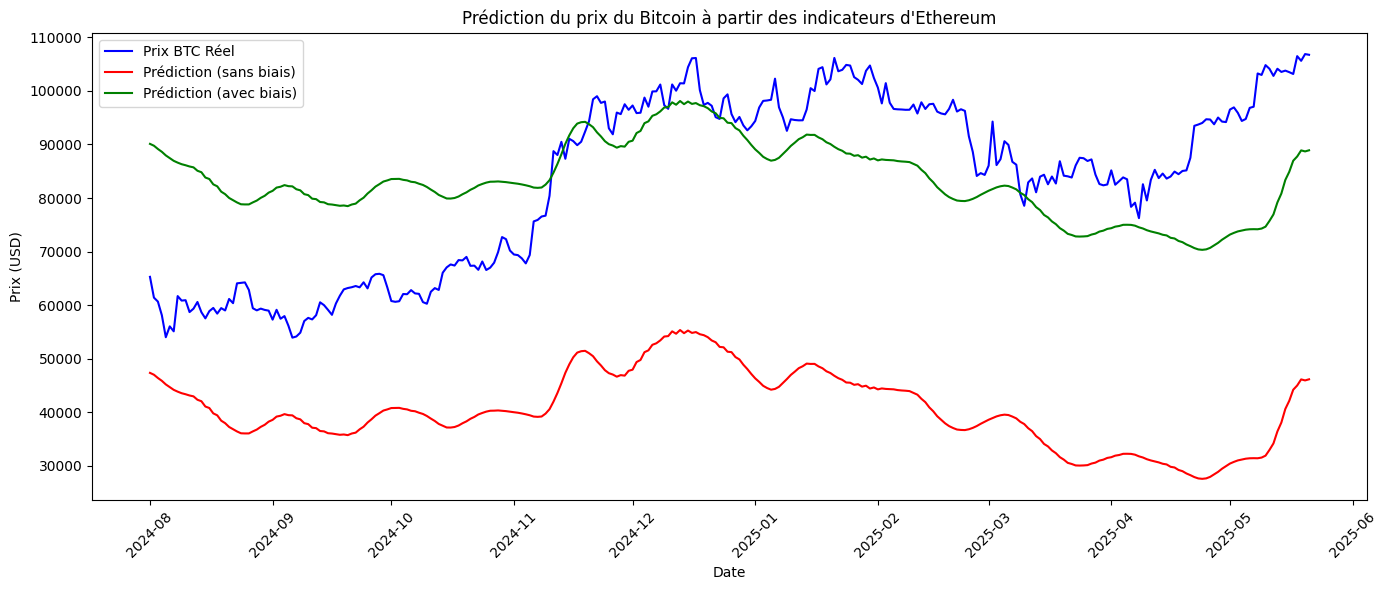

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

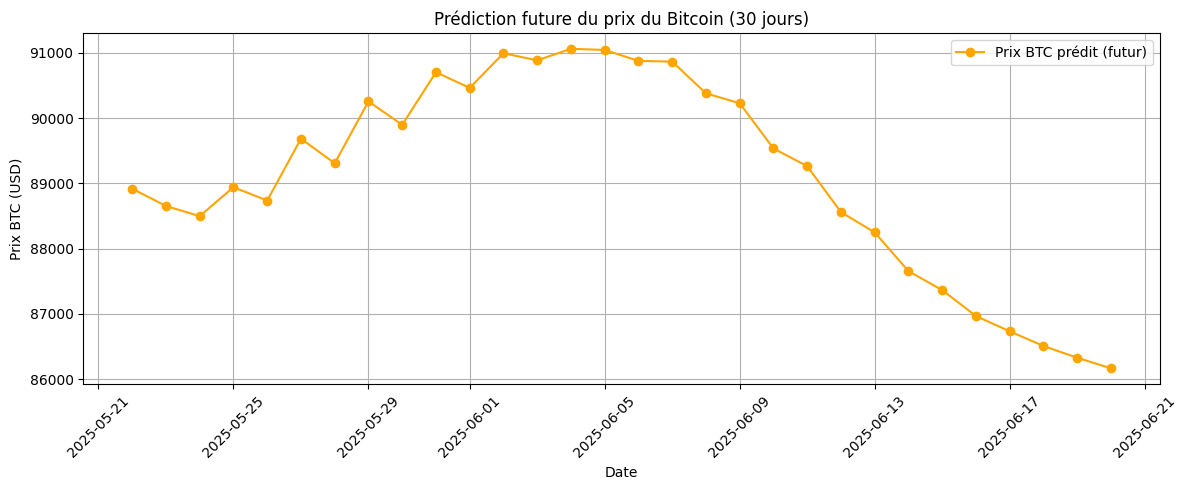

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.regularizers import l1_l2
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import requests
from datetime import datetime

# =======================
# 1. Fonction pour charger les données CryptoCompare
# =======================
def load_crypto_data(symbol, comparison_symbol='USD', limit=2000):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym={symbol}&tsym={comparison_symbol}&limit={limit}'
    response = requests.get(url)
    data = response.json()['Data']['Data']
    df = pd.DataFrame(data)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

# =======================
# 2. Ajout des indicateurs techniques
# =======================
def add_technical_indicators(df):
    df = df.copy()
    df['MA7'] = df['close'].rolling(window=7).mean()
    df['MA21'] = df['close'].rolling(window=21).mean()
    df['EMA'] = df['close'].ewm(span=20, adjust=False).mean()
    df['Momentum'] = df['close'] - df['close'].shift(1)
    df['Volatility'] = df['close'].rolling(window=7).std()
    return df.dropna()

# =======================
# 3. Création des séquences pour le modèle
# =======================
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

# =======================
# 4. Fonction pour prédire les prix futurs
# =======================
def predict_future_price(model, feature_scaler, target_scaler, bias, last_sequence, days_ahead=30):
    future_prices = []
    current_sequence = last_sequence.copy()

    for _ in range(days_ahead):
        input_seq = current_sequence.reshape(1, *current_sequence.shape)
        prediction_scaled = model.predict(input_seq)[0][0] + bias
        prediction = target_scaler.inverse_transform([[prediction_scaled]])[0][0]
        future_prices.append(prediction)

        # Simulation simplifiée : on copie les features précédents en décalant la dernière valeur prédite
        next_features = current_sequence[-1].copy()
        next_features[0] = prediction_scaled  # Met à jour 'close' prédite
        current_sequence = np.append(current_sequence[1:], [next_features], axis=0)

    return future_prices

# =======================
# 5. Chargement et préparation des données
# =======================
btc_data = load_crypto_data('BTC')
eth_data = load_crypto_data('ETH')

eth_data = add_technical_indicators(eth_data)
btc_data = btc_data.loc[eth_data.index]  # synchronise les index

features = eth_data[['close', 'MA7', 'MA21', 'EMA', 'Momentum', 'Volatility']]
target = btc_data['close']

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

window_size = 30
X, y = create_sequences(scaled_features, scaled_target, window_size)

# =======================
# 6. Séparation Train/Validation/Test
# =======================
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

# =======================
# 7. Construction du modèle GRU
# =======================
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(units=64, return_sequences=False, kernel_regularizer=l1_l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

# =======================
# 8. Entraînement
# =======================
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# =======================
# 9. Évaluation
# =======================
y_pred_scaled = model.predict(X_test)
bias = np.mean(y_test - y_pred_scaled)  # correction de biais
y_pred_scaled_bias = y_pred_scaled + bias

y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)
y_pred_bias_inv = target_scaler.inverse_transform(y_pred_scaled_bias)

mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

mae_bias = mean_absolute_error(y_test_inv, y_pred_bias_inv)
rmse_bias = np.sqrt(mean_squared_error(y_test_inv, y_pred_bias_inv))

print(f"MAE (sans biais): {mae:.2f}, RMSE: {rmse:.2f}")
print(f"MAE (avec biais): {mae_bias:.2f}, RMSE: {rmse_bias:.2f}")

# =======================
# 10. Visualisation des résultats
# =======================
dates_test = btc_data.index[-len(y_test):]

plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Prix BTC Réel', color='blue')
plt.plot(dates_test, y_pred_inv, label='Prédiction (sans biais)', color='red')
plt.plot(dates_test, y_pred_bias_inv, label='Prédiction (avec biais)', color='green')
plt.title("Prédiction du prix du Bitcoin à partir des indicateurs d'Ethereum")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# =======================
# 11. Prédiction future
# =======================
last_sequence = X[-1]  # dernière séquence connue
future_prices = predict_future_price(model, feature_scaler, target_scaler, bias, last_sequence, days_ahead=30)

future_dates = pd.date_range(start=btc_data.index[-1] + pd.Timedelta(days=1), periods=30)

plt.figure(figsize=(12, 5))
plt.plot(future_dates, future_prices, marker='o', linestyle='-', color='orange', label='Prix BTC prédit (futur)')
plt.title("Prédiction future du prix du Bitcoin (30 jours)")
plt.xlabel("Date")
plt.ylabel("Prix BTC (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 28, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,537 (37.25 KB)

 Trainable params: 9,537 (37.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 4.1682 - val_loss: 3.0912
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.7683 - val_loss: 1.8928
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6327 - val_loss: 0.9808
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7899 - val_loss: 0.3746
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2697 - val_loss: 0.1181
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0662 - val_loss: 0.0454
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - val_loss: 0.0516
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0199 - val_loss: 0.0338
Epoch 9/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179 - val_loss: 0.0572
Epoch 10/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - val_loss: 0.0455
Epoch 11/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - val_loss: 0.0313
Epoch 12/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - val_l

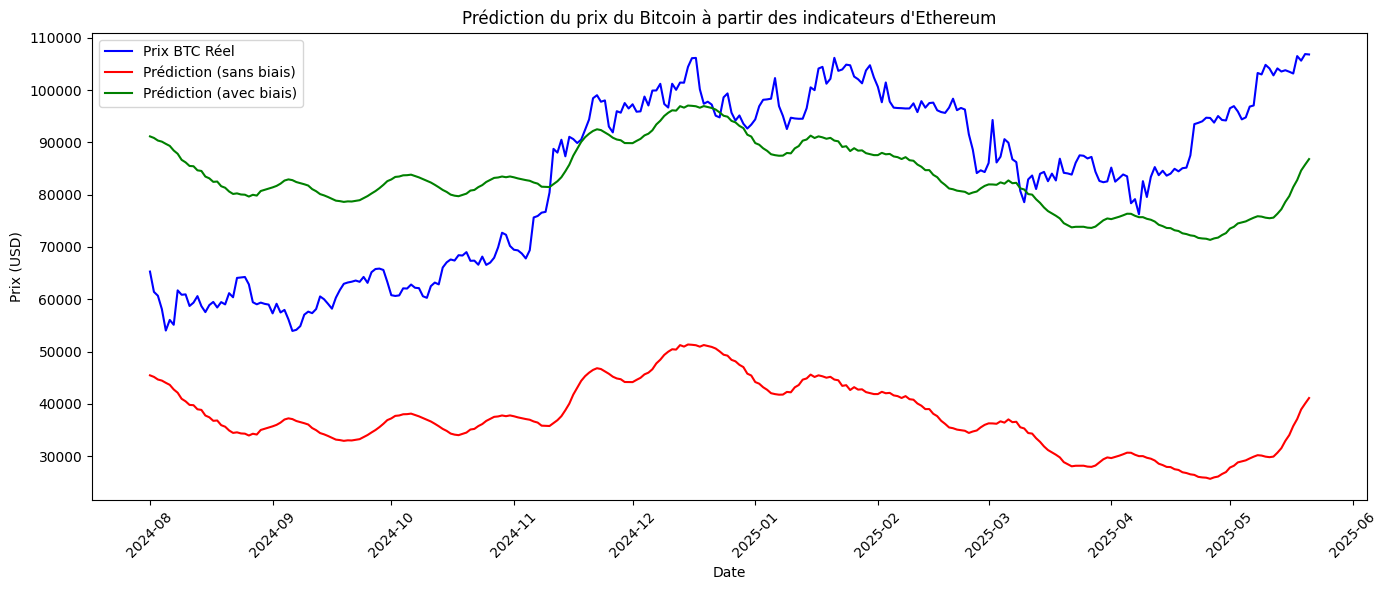

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

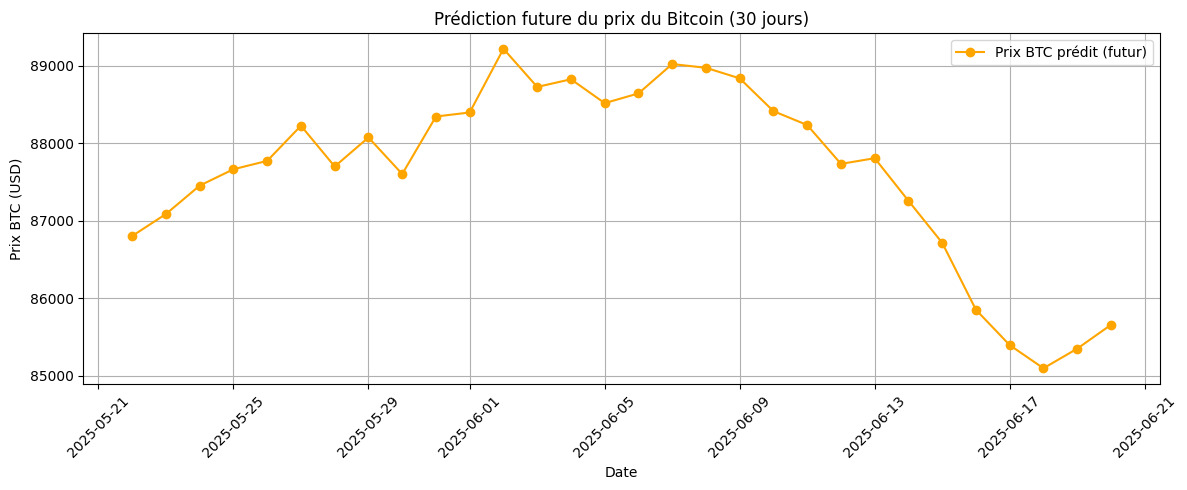

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.regularizers import l1_l2
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import requests
from datetime import datetime

# =======================
# 1. Fonction pour charger les données CryptoCompare
# =======================
def load_crypto_data(symbol, comparison_symbol='USD', limit=2000):
    url = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym={symbol}&tsym={comparison_symbol}&limit={limit}'
    response = requests.get(url)
    data = response.json()['Data']['Data']
    df = pd.DataFrame(data)
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

# =======================
# 2. Ajout des indicateurs techniques
# =======================
def add_technical_indicators(df):
    df = df.copy()
    df['MA7'] = df['close'].rolling(window=7).mean()
    df['MA21'] = df['close'].rolling(window=21).mean()
    df['EMA'] = df['close'].ewm(span=20, adjust=False).mean()
    df['Momentum'] = df['close'] - df['close'].shift(1)
    df['Volatility'] = df['close'].rolling(window=7).std()
    return df.dropna()

# =======================
# 3. Création des séquences pour le modèle
# =======================
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

# =======================
# 4. Fonction pour prédire les prix futurs
# =======================
def predict_future_price(model, feature_scaler, target_scaler, bias, last_sequence, days_ahead=30):
    future_prices = []
    current_sequence = last_sequence.copy()

    for _ in range(days_ahead):
        input_seq = current_sequence.reshape(1, *current_sequence.shape)
        prediction_scaled = model.predict(input_seq)[0][0] + bias
        prediction = target_scaler.inverse_transform([[prediction_scaled]])[0][0]
        future_prices.append(prediction)

        # Simulation simplifiée : on copie les features précédents en décalant la dernière valeur prédite
        next_features = current_sequence[-1].copy()
        next_features[0] = prediction_scaled  # Met à jour 'close' prédite
        current_sequence = np.append(current_sequence[1:], [next_features], axis=0)

    return future_prices

# =======================
# 5. Chargement et préparation des données
# =======================
btc_data = load_crypto_data('BTC')
eth_data = load_crypto_data('ETH')

eth_data = add_technical_indicators(eth_data)
btc_data = btc_data.loc[eth_data.index]  # synchronise les index

features = eth_data[['close', 'MA7', 'MA21', 'EMA', 'Momentum', 'Volatility']]
target = btc_data['close']

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

window_size = 30
X, y = create_sequences(scaled_features, scaled_target, window_size)

# =======================
# 6. Séparation Train/Validation/Test
# =======================
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

# =======================
# 7. Construction du modèle CNN + SimpleRNN
# =======================
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(SimpleRNN(units=64, return_sequences=False, kernel_regularizer=l1_l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

# =======================
# 8. Entraînement
# =======================
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# =======================
# 9. Évaluation
# =======================
y_pred_scaled = model.predict(X_test)
bias = np.mean(y_test - y_pred_scaled)  # correction de biais
y_pred_scaled_bias = y_pred_scaled + bias

y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)
y_pred_bias_inv = target_scaler.inverse_transform(y_pred_scaled_bias)

mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

mae_bias = mean_absolute_error(y_test_inv, y_pred_bias_inv)
rmse_bias = np.sqrt(mean_squared_error(y_test_inv, y_pred_bias_inv))

print(f"MAE (sans biais): {mae:.2f}, RMSE: {rmse:.2f}")
print(f"MAE (avec biais): {mae_bias:.2f}, RMSE: {rmse_bias:.2f}")

# =======================
# 10. Visualisation des résultats
# =======================
dates_test = btc_data.index[-len(y_test):]

plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test_inv, label='Prix BTC Réel', color='blue')
plt.plot(dates_test, y_pred_inv, label='Prédiction (sans biais)', color='red')
plt.plot(dates_test, y_pred_bias_inv, label='Prédiction (avec biais)', color='green')
plt.title("Prédiction du prix du Bitcoin à partir des indicateurs d'Ethereum")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# =======================
# 11. Prédiction future
# =======================
last_sequence = X[-1]  # dernière séquence connue
future_prices = predict_future_price(model, feature_scaler, target_scaler, bias, last_sequence, days_ahead=30)

future_dates = pd.date_range(start=btc_data.index[-1] + pd.Timedelta(days=1), periods=30)

plt.figure(figsize=(12, 5))
plt.plot(future_dates, future_prices, marker='o', linestyle='-', color='orange', label='Prix BTC prédit (futur)')
plt.title("Prédiction future du prix du Bitcoin (30 jours)")
plt.xlabel("Date")
plt.ylabel("Prix BTC (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.2438 - mae: 0.1530 - val_loss: 0.4646 - val_mae: 0.5331 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1759 - mae: 0.0763 - val_loss: 0.3105 - val_mae: 0.4061 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1403 - mae: 0.0676 - val_loss: 0.2900 - val_mae: 0.4154 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1127 - mae: 0.0626 - val_loss: 0.2706 - val_mae: 0.4181 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0910 - mae: 0.0552 - val_loss: 0.2430 - val_mae: 0.4041 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0753 - mae: 0.0522 - val_loss: 0.2199 - val_mae: 0.3900 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0647 - mae: 0.0547 - val_loss: 0.2121 - val_mae: 0.3919 - learning_rate: 0.0010
Epoch 8/100
15/15 

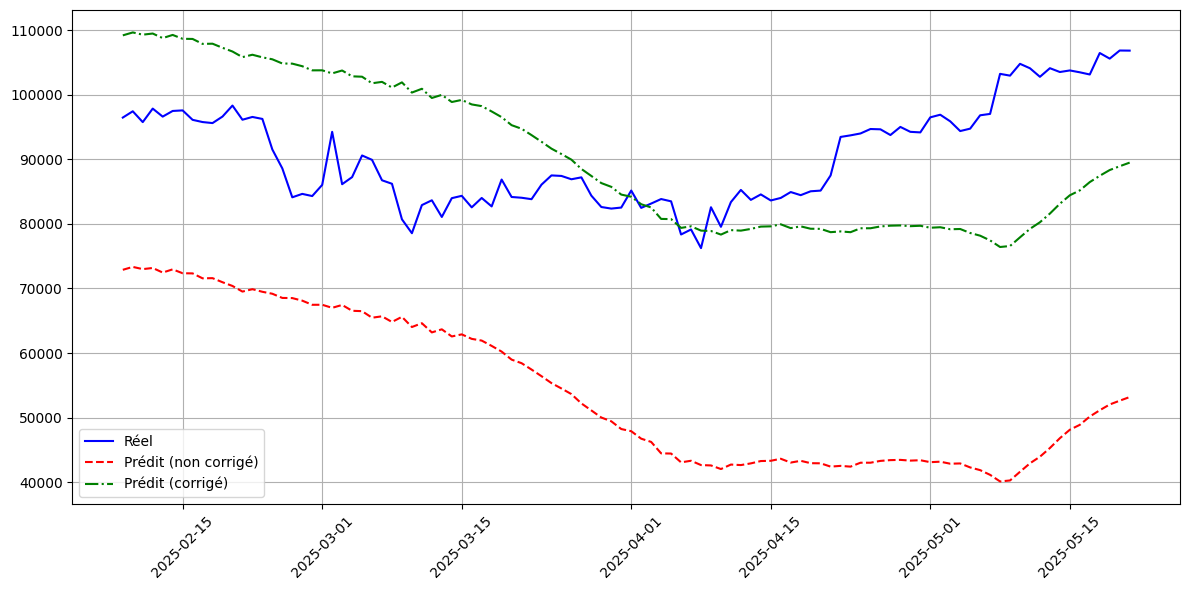

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [59]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2

# =========================
# Récupération des données
# =========================

def collect_data_crypto_compare(symbol, start_timestamp, end_timestamp):
    url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    days = (end_timestamp - start_timestamp) // (24 * 3600) + 1
    limit = min(2000, days)

    params = {
        'fsym': symbol,
        'tsym': 'USD',
        'limit': limit,
        'toTs': end_timestamp
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data['Response'] == 'Success':
            df = pd.DataFrame(data['Data']['Data'])
            df['time'] = pd.to_datetime(df['time'], unit='s')
            return df
        else:
            print(f"Erreur API: {data['Message']}")
            return None
    else:
        print(f"Erreur HTTP: {response.status_code}")
        return None

# =========================================
# Prétraitement des données + features ETH
# =========================================

def preprocess_data(btc_df, eth_df):
    df = pd.merge(btc_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                  eth_df[['time', 'close', 'high', 'low', 'volumefrom', 'volumeto']],
                  on='time',
                  suffixes=('_btc', '_eth'))
    df = df.sort_values('time')

    df['eth_ma7'] = df['close_eth'].rolling(window=7).mean()
    df['eth_ma14'] = df['close_eth'].rolling(window=14).mean()
    df['eth_ma30'] = df['close_eth'].rolling(window=30).mean()
    df['eth_volatility7'] = df['close_eth'].rolling(window=7).std()
    df['eth_daily_range'] = df['high_eth'] - df['low_eth']
    df['eth_volume_price_ratio'] = df['volumeto_eth'] / df['close_eth']
    df['eth_roc5'] = df['close_eth'].pct_change(periods=5)
    df['eth_roc10'] = df['close_eth'].pct_change(periods=10)
    df['btc_return'] = df['close_btc'].pct_change()
    df['eth_return'] = df['close_eth'].pct_change()
    df['eth_momentum5'] = df['close_eth'] / df['close_eth'].shift(5)
    df['eth_momentum10'] = df['close_eth'] / df['close_eth'].shift(10)

    df.dropna(inplace=True)
    return df

# =====================
# Séquences X/y
# =====================

def create_sequences(df, seq_length=30):
    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]
    target = 'close_btc'
    X, y = [], []
    for i in range(len(df) - seq_length):
        feature_sequence = df[features_list].iloc[i:i+seq_length].values
        X.append(feature_sequence)
        y.append(df[target].iloc[i+seq_length])
    return np.array(X), np.array(y).reshape(-1, 1)

# ====================
# Modèle CNN-BiLSTM
# ====================

def build_simple_rnn_model(seq_length, features=12):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(seq_length, features)),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))),
        Dropout(0.3),
        LSTM(128, return_sequences=False, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# ========================
# Entraînement + Analyse
# ========================

def main(bitcoin_data, ethereum_data):
    if bitcoin_data is None or ethereum_data is None:
        print("Erreur de récupération des données.")
        return None

    data = preprocess_data(bitcoin_data, ethereum_data)

    feature_scaler = MinMaxScaler()
    btc_scaler = MinMaxScaler()

    features_list = [
        'close_eth', 'eth_ma7', 'eth_ma14', 'eth_ma30',
        'eth_volatility7', 'eth_daily_range', 'eth_volume_price_ratio',
        'eth_roc5', 'eth_roc10', 'eth_momentum5', 'eth_momentum10', 'eth_return'
    ]

    data[features_list] = feature_scaler.fit_transform(data[features_list])
    data['close_btc'] = btc_scaler.fit_transform(data[['close_btc']])

    seq_length = 30
    X, y = create_sequences(data, seq_length)

    train_size = int(len(X) * 0.7)
    val_size = int(len(X) * 0.15)
    X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
    y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

    model = build_simple_rnn_model(seq_length, features=len(features_list))

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00005, verbose=1)

    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping, reduce_lr], verbose=1)

    y_pred = model.predict(X_test)
    y_test_btc = btc_scaler.inverse_transform(y_test)
    y_pred_btc = btc_scaler.inverse_transform(y_pred)

    mse = mean_squared_error(y_test_btc, y_pred_btc)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_btc, y_pred_btc)

    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

    bias = np.mean(y_test_btc - y_pred_btc)
    y_pred_btc_corrected = y_pred_btc + bias

    mse_corrected = mean_squared_error(y_test_btc, y_pred_btc_corrected)
    rmse_corrected = np.sqrt(mse_corrected)
    r2_corrected = r2_score(y_test_btc, y_pred_btc_corrected)

    print(f"Après correction : MSE = {mse_corrected:.2f}, RMSE = {rmse_corrected:.2f}, R² = {r2_corrected:.4f}")

    test_dates = data['time'].iloc[-len(y_test):].values

    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, y_test_btc, label='Réel', color='blue')
    plt.plot(test_dates, y_pred_btc, label='Prédit (non corrigé)', color='red', linestyle='--')
    plt.plot(test_dates, y_pred_btc_corrected, label='Prédit (corrigé)', color='green', linestyle='-.')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return model, feature_scaler, btc_scaler, bias, X, data

# =======================
# Prédiction future
# =======================

def predict_future_price(model, feature_scaler, btc_scaler, bias, last_sequence, days_ahead=30):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_ahead):
        pred = model.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
        pred_btc = btc_scaler.inverse_transform(pred)[0][0]
        pred_btc_corrected = pred_btc + bias
        predictions.append(pred_btc_corrected)

    return predictions

# ======================
# Lancement du script
# ======================

if __name__ == "__main__":
    end_timestamp = int(time.time())
    start_timestamp = end_timestamp - (2 * 365 * 24 * 3600)

    btc_data = collect_data_crypto_compare('BTC', start_timestamp, end_timestamp)
    eth_data = collect_data_crypto_compare('ETH', start_timestamp, end_timestamp)

    results = main(btc_data, eth_data)

    if results:
        model, feature_scaler, btc_scaler, bias, X, data = results
        last_sequence = X[-1]
        future_predictions = predict_future_price(model, feature_scaler, btc_scaler, bias, last_sequence, days_ahead=30)

        print("\nPrévisions des 30 prochains jours :")
        for i, price in enumerate(future_predictions, 1):
            print(f"Jour {i}: {price:.2f} USD")
